# Fruits 360 Dataset Kaggle Competition

### Step 1: Explore Dataset
### Step 2: Preprocess Dataset
### Step 3: Create a Dataset Pipeline and Tensorflow Model
### Step 4: Training network
### Step 5: Printing the test accuracy and Troubleshooting. Target accuracy on test set should be more than >94%.

## Some important foot notes and Learnings at the end of the notebook

So lets begin!!

#### Step 1: Explore Dataset

(100, 100, 3)


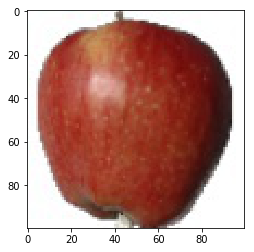

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

# Following will create a numpy array for an image
img = mpimg.imread('./fruits-360/Training/Apple Red 1/101_100.jpg')
print(img.shape)
# Display image using matplotlib from a numpy array
plt.imshow(img)

No. of Training Samples: 41322
No. of Test Samples: 13877


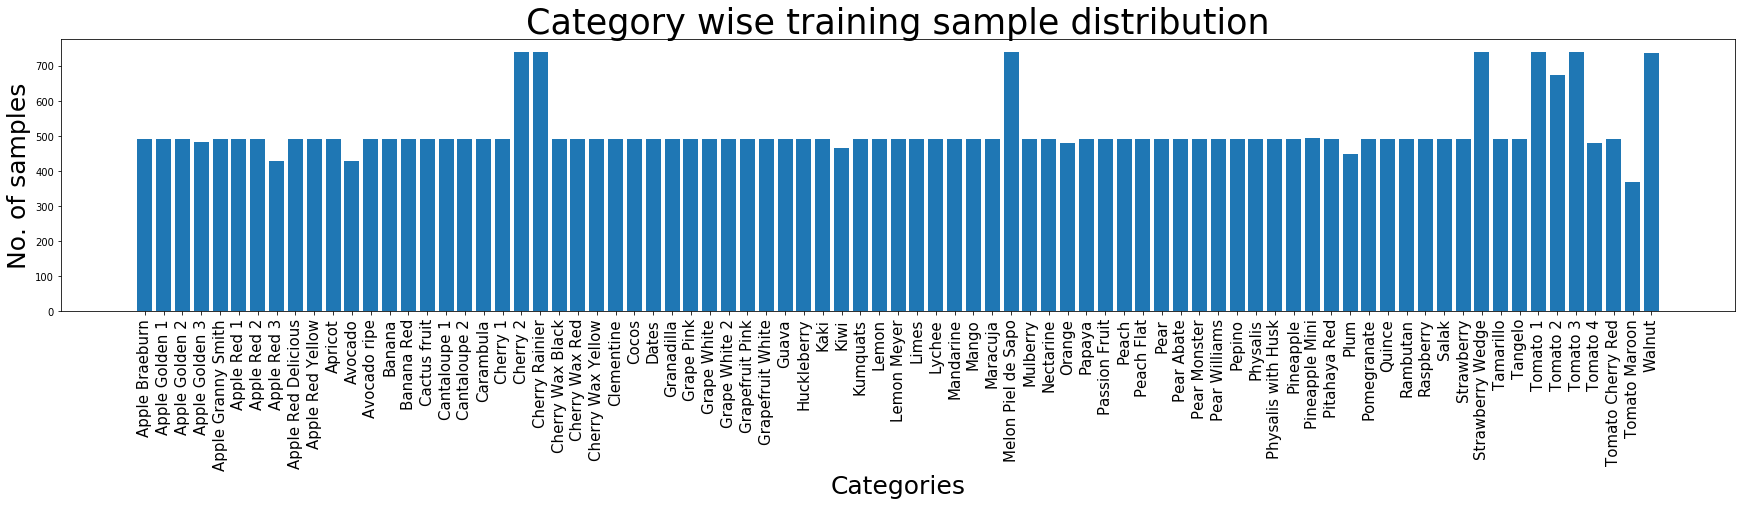

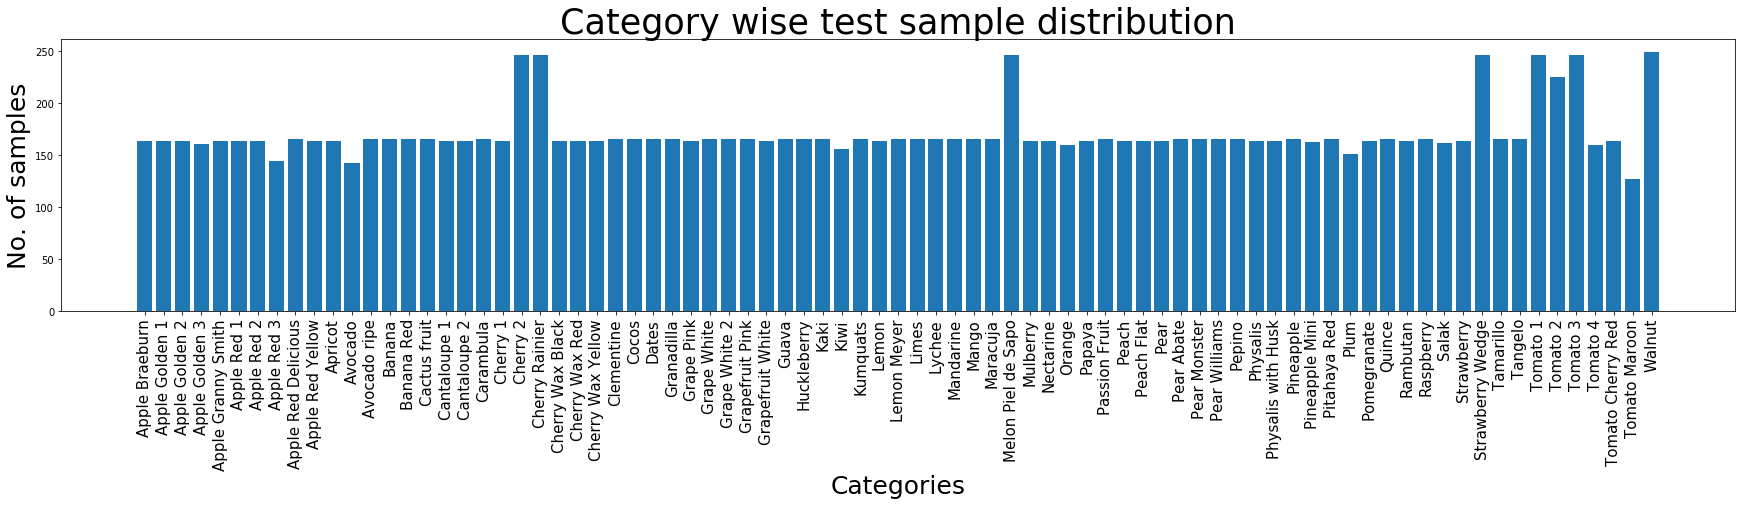

In [2]:
import os, os.path
train_categories = []
train_samples = []
for i in os.listdir("./fruits-360/Training"):
    train_categories.append(i)
    train_samples.append(len(os.listdir("./fruits-360/Training/"+ i)))

test_categories = []
test_samples = []
for i in os.listdir("./fruits-360/Test"):
    test_categories.append(i)
    test_samples.append(len(os.listdir("./fruits-360/Test/"+ i)))

    
print("No. of Training Samples:", sum(train_samples))
print("No. of Test Samples:", sum(test_samples))


fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

index = np.arange(len(train_categories))
plt.bar(index, train_samples)
plt.xlabel('Categories', fontsize=25)
plt.ylabel('No. of samples', fontsize=25)
plt.xticks(index, train_categories, fontsize=15, rotation=90)
plt.title('Category wise training sample distribution', fontsize=35)
plt.show()


index2 = np.arange(len(test_categories))
plt.bar(index2, test_samples)
plt.xlabel('Categories', fontsize=25)
plt.ylabel('No. of samples', fontsize=25)
plt.xticks(index2, test_categories, fontsize=15, rotation=90)
plt.title('Category wise test sample distribution', fontsize=35)
plt.show()

#### Step 2: Preprocess Dataset

In [3]:
# Convert all the training and test set into a numpy array
# X will be the image array 3 dimensional and Y will be the one hot encoded vector 1x81 dimension
train = []
test = []

for i in os.listdir("./fruits-360/Training"):
    one_hot = np.zeros(shape=[len(train_categories)])
    actual_index = train_categories.index(i)
    one_hot[actual_index] = 1
    for files in os.listdir("./fruits-360/Training/"+ i):
        img_array = mpimg.imread("./fruits-360/Training/"+ i + "/" + files)
        train.append([img_array, one_hot])
    print("Train Category Status: {}/{}".format(actual_index+1, len(train_categories)))
    
for i in os.listdir("./fruits-360/Test"):
    one_hot = np.zeros(shape=[len(test_categories)])
    actual_index = test_categories.index(i)
    one_hot[actual_index] = 1
    for files in os.listdir("./fruits-360/Test/"+ i):
        img_array = mpimg.imread("./fruits-360/Test/"+ i + "/" + files)
        test.append([img_array, one_hot])
    print("Test Category Status: {}/{}".format(actual_index+1, len(test_categories)))

Train Category Status: 1/81
Train Category Status: 2/81
Train Category Status: 3/81
Train Category Status: 4/81
Train Category Status: 5/81
Train Category Status: 6/81
Train Category Status: 7/81
Train Category Status: 8/81
Train Category Status: 9/81
Train Category Status: 10/81
Train Category Status: 11/81
Train Category Status: 12/81
Train Category Status: 13/81
Train Category Status: 14/81
Train Category Status: 15/81
Train Category Status: 16/81
Train Category Status: 17/81
Train Category Status: 18/81
Train Category Status: 19/81
Train Category Status: 20/81
Train Category Status: 21/81
Train Category Status: 22/81
Train Category Status: 23/81
Train Category Status: 24/81
Train Category Status: 25/81
Train Category Status: 26/81
Train Category Status: 27/81
Train Category Status: 28/81
Train Category Status: 29/81
Train Category Status: 30/81
Train Category Status: 31/81
Train Category Status: 32/81
Train Category Status: 33/81
Train Category Status: 34/81
Train Category Status: 

In [4]:
# Shuffle the datasets before spliting into x and y.

import random
random.shuffle(train)
random.shuffle(test)

Grapefruit Pink


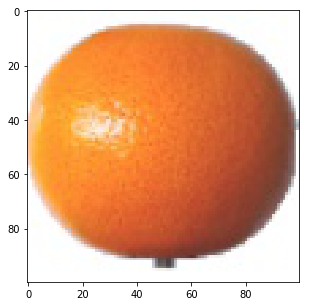

In [5]:
x = train[17000][0]
y = train[17000][1]
plt.imshow(x)
print(train_categories[np.argmax(y)])

Cherry 2


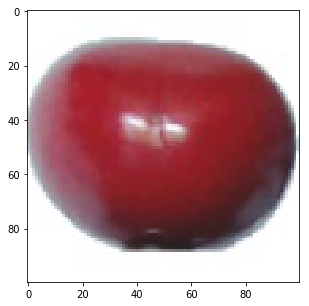

In [6]:
x_ = test[7000][0]
y_ = test[7000][1]
plt.imshow(x_)
print(test_categories[np.argmax(y_)])

In [7]:
train_x = []
train_y = []
for i in range(len(train)):
    train_x.append(train[i][0])
    train_y.append(train[i][1])
    print("Status {}/{}".format(i+1, len(train)))

Status 1/41322
Status 2/41322
Status 3/41322
Status 4/41322
Status 5/41322
Status 6/41322
Status 7/41322
Status 8/41322
Status 9/41322
Status 10/41322
Status 11/41322
Status 12/41322
Status 13/41322
Status 14/41322
Status 15/41322
Status 16/41322
Status 17/41322
Status 18/41322
Status 19/41322
Status 20/41322
Status 21/41322
Status 22/41322
Status 23/41322
Status 24/41322
Status 25/41322
Status 26/41322
Status 27/41322
Status 28/41322
Status 29/41322
Status 30/41322
Status 31/41322
Status 32/41322
Status 33/41322
Status 34/41322
Status 35/41322
Status 36/41322
Status 37/41322
Status 38/41322
Status 39/41322
Status 40/41322
Status 41/41322
Status 42/41322
Status 43/41322
Status 44/41322
Status 45/41322
Status 46/41322
Status 47/41322
Status 48/41322
Status 49/41322
Status 50/41322
Status 51/41322
Status 52/41322
Status 53/41322
Status 54/41322
Status 55/41322
Status 56/41322
Status 57/41322
Status 58/41322
Status 59/41322
Status 60/41322
Status 61/41322
Status 62/41322
Status 63/41322
S

Status 1686/41322
Status 1687/41322
Status 1688/41322
Status 1689/41322
Status 1690/41322
Status 1691/41322
Status 1692/41322
Status 1693/41322
Status 1694/41322
Status 1695/41322
Status 1696/41322
Status 1697/41322
Status 1698/41322
Status 1699/41322
Status 1700/41322
Status 1701/41322
Status 1702/41322
Status 1703/41322
Status 1704/41322
Status 1705/41322
Status 1706/41322
Status 1707/41322
Status 1708/41322
Status 1709/41322
Status 1710/41322
Status 1711/41322
Status 1712/41322
Status 1713/41322
Status 1714/41322
Status 1715/41322
Status 1716/41322
Status 1717/41322
Status 1718/41322
Status 1719/41322
Status 1720/41322
Status 1721/41322
Status 1722/41322
Status 1723/41322
Status 1724/41322
Status 1725/41322
Status 1726/41322
Status 1727/41322
Status 1728/41322
Status 1729/41322
Status 1730/41322
Status 1731/41322
Status 1732/41322
Status 1733/41322
Status 1734/41322
Status 1735/41322
Status 1736/41322
Status 1737/41322
Status 1738/41322
Status 1739/41322
Status 1740/41322
Status 174

Status 2686/41322
Status 2687/41322
Status 2688/41322
Status 2689/41322
Status 2690/41322
Status 2691/41322
Status 2692/41322
Status 2693/41322
Status 2694/41322
Status 2695/41322
Status 2696/41322
Status 2697/41322
Status 2698/41322
Status 2699/41322
Status 2700/41322
Status 2701/41322
Status 2702/41322
Status 2703/41322
Status 2704/41322
Status 2705/41322
Status 2706/41322
Status 2707/41322
Status 2708/41322
Status 2709/41322
Status 2710/41322
Status 2711/41322
Status 2712/41322
Status 2713/41322
Status 2714/41322
Status 2715/41322
Status 2716/41322
Status 2717/41322
Status 2718/41322
Status 2719/41322
Status 2720/41322
Status 2721/41322
Status 2722/41322
Status 2723/41322
Status 2724/41322
Status 2725/41322
Status 2726/41322
Status 2727/41322
Status 2728/41322
Status 2729/41322
Status 2730/41322
Status 2731/41322
Status 2732/41322
Status 2733/41322
Status 2734/41322
Status 2735/41322
Status 2736/41322
Status 2737/41322
Status 2738/41322
Status 2739/41322
Status 2740/41322
Status 274

Status 4185/41322
Status 4186/41322
Status 4187/41322
Status 4188/41322
Status 4189/41322
Status 4190/41322
Status 4191/41322
Status 4192/41322
Status 4193/41322
Status 4194/41322
Status 4195/41322
Status 4196/41322
Status 4197/41322
Status 4198/41322
Status 4199/41322
Status 4200/41322
Status 4201/41322
Status 4202/41322
Status 4203/41322
Status 4204/41322
Status 4205/41322
Status 4206/41322
Status 4207/41322
Status 4208/41322
Status 4209/41322
Status 4210/41322
Status 4211/41322
Status 4212/41322
Status 4213/41322
Status 4214/41322
Status 4215/41322
Status 4216/41322
Status 4217/41322
Status 4218/41322
Status 4219/41322
Status 4220/41322
Status 4221/41322
Status 4222/41322
Status 4223/41322
Status 4224/41322
Status 4225/41322
Status 4226/41322
Status 4227/41322
Status 4228/41322
Status 4229/41322
Status 4230/41322
Status 4231/41322
Status 4232/41322
Status 4233/41322
Status 4234/41322
Status 4235/41322
Status 4236/41322
Status 4237/41322
Status 4238/41322
Status 4239/41322
Status 424

Status 5185/41322
Status 5186/41322
Status 5187/41322
Status 5188/41322
Status 5189/41322
Status 5190/41322
Status 5191/41322
Status 5192/41322
Status 5193/41322
Status 5194/41322
Status 5195/41322
Status 5196/41322
Status 5197/41322
Status 5198/41322
Status 5199/41322
Status 5200/41322
Status 5201/41322
Status 5202/41322
Status 5203/41322
Status 5204/41322
Status 5205/41322
Status 5206/41322
Status 5207/41322
Status 5208/41322
Status 5209/41322
Status 5210/41322
Status 5211/41322
Status 5212/41322
Status 5213/41322
Status 5214/41322
Status 5215/41322
Status 5216/41322
Status 5217/41322
Status 5218/41322
Status 5219/41322
Status 5220/41322
Status 5221/41322
Status 5222/41322
Status 5223/41322
Status 5224/41322
Status 5225/41322
Status 5226/41322
Status 5227/41322
Status 5228/41322
Status 5229/41322
Status 5230/41322
Status 5231/41322
Status 5232/41322
Status 5233/41322
Status 5234/41322
Status 5235/41322
Status 5236/41322
Status 5237/41322
Status 5238/41322
Status 5239/41322
Status 524

Status 6301/41322
Status 6302/41322
Status 6303/41322
Status 6304/41322
Status 6305/41322
Status 6306/41322
Status 6307/41322
Status 6308/41322
Status 6309/41322
Status 6310/41322
Status 6311/41322
Status 6312/41322
Status 6313/41322
Status 6314/41322
Status 6315/41322
Status 6316/41322
Status 6317/41322
Status 6318/41322
Status 6319/41322
Status 6320/41322
Status 6321/41322
Status 6322/41322
Status 6323/41322
Status 6324/41322
Status 6325/41322
Status 6326/41322
Status 6327/41322
Status 6328/41322
Status 6329/41322
Status 6330/41322
Status 6331/41322
Status 6332/41322
Status 6333/41322
Status 6334/41322
Status 6335/41322
Status 6336/41322
Status 6337/41322
Status 6338/41322
Status 6339/41322
Status 6340/41322
Status 6341/41322
Status 6342/41322
Status 6343/41322
Status 6344/41322
Status 6345/41322
Status 6346/41322
Status 6347/41322
Status 6348/41322
Status 6349/41322
Status 6350/41322
Status 6351/41322
Status 6352/41322
Status 6353/41322
Status 6354/41322
Status 6355/41322
Status 635

Status 7184/41322
Status 7185/41322
Status 7186/41322
Status 7187/41322
Status 7188/41322
Status 7189/41322
Status 7190/41322
Status 7191/41322
Status 7192/41322
Status 7193/41322
Status 7194/41322
Status 7195/41322
Status 7196/41322
Status 7197/41322
Status 7198/41322
Status 7199/41322
Status 7200/41322
Status 7201/41322
Status 7202/41322
Status 7203/41322
Status 7204/41322
Status 7205/41322
Status 7206/41322
Status 7207/41322
Status 7208/41322
Status 7209/41322
Status 7210/41322
Status 7211/41322
Status 7212/41322
Status 7213/41322
Status 7214/41322
Status 7215/41322
Status 7216/41322
Status 7217/41322
Status 7218/41322
Status 7219/41322
Status 7220/41322
Status 7221/41322
Status 7222/41322
Status 7223/41322
Status 7224/41322
Status 7225/41322
Status 7226/41322
Status 7227/41322
Status 7228/41322
Status 7229/41322
Status 7230/41322
Status 7231/41322
Status 7232/41322
Status 7233/41322
Status 7234/41322
Status 7235/41322
Status 7236/41322
Status 7237/41322
Status 7238/41322
Status 723

Status 8683/41322
Status 8684/41322
Status 8685/41322
Status 8686/41322
Status 8687/41322
Status 8688/41322
Status 8689/41322
Status 8690/41322
Status 8691/41322
Status 8692/41322
Status 8693/41322
Status 8694/41322
Status 8695/41322
Status 8696/41322
Status 8697/41322
Status 8698/41322
Status 8699/41322
Status 8700/41322
Status 8701/41322
Status 8702/41322
Status 8703/41322
Status 8704/41322
Status 8705/41322
Status 8706/41322
Status 8707/41322
Status 8708/41322
Status 8709/41322
Status 8710/41322
Status 8711/41322
Status 8712/41322
Status 8713/41322
Status 8714/41322
Status 8715/41322
Status 8716/41322
Status 8717/41322
Status 8718/41322
Status 8719/41322
Status 8720/41322
Status 8721/41322
Status 8722/41322
Status 8723/41322
Status 8724/41322
Status 8725/41322
Status 8726/41322
Status 8727/41322
Status 8728/41322
Status 8729/41322
Status 8730/41322
Status 8731/41322
Status 8732/41322
Status 8733/41322
Status 8734/41322
Status 8735/41322
Status 8736/41322
Status 8737/41322
Status 873

Status 9683/41322
Status 9684/41322
Status 9685/41322
Status 9686/41322
Status 9687/41322
Status 9688/41322
Status 9689/41322
Status 9690/41322
Status 9691/41322
Status 9692/41322
Status 9693/41322
Status 9694/41322
Status 9695/41322
Status 9696/41322
Status 9697/41322
Status 9698/41322
Status 9699/41322
Status 9700/41322
Status 9701/41322
Status 9702/41322
Status 9703/41322
Status 9704/41322
Status 9705/41322
Status 9706/41322
Status 9707/41322
Status 9708/41322
Status 9709/41322
Status 9710/41322
Status 9711/41322
Status 9712/41322
Status 9713/41322
Status 9714/41322
Status 9715/41322
Status 9716/41322
Status 9717/41322
Status 9718/41322
Status 9719/41322
Status 9720/41322
Status 9721/41322
Status 9722/41322
Status 9723/41322
Status 9724/41322
Status 9725/41322
Status 9726/41322
Status 9727/41322
Status 9728/41322
Status 9729/41322
Status 9730/41322
Status 9731/41322
Status 9732/41322
Status 9733/41322
Status 9734/41322
Status 9735/41322
Status 9736/41322
Status 9737/41322
Status 973

Status 11182/41322
Status 11183/41322
Status 11184/41322
Status 11185/41322
Status 11186/41322
Status 11187/41322
Status 11188/41322
Status 11189/41322
Status 11190/41322
Status 11191/41322
Status 11192/41322
Status 11193/41322
Status 11194/41322
Status 11195/41322
Status 11196/41322
Status 11197/41322
Status 11198/41322
Status 11199/41322
Status 11200/41322
Status 11201/41322
Status 11202/41322
Status 11203/41322
Status 11204/41322
Status 11205/41322
Status 11206/41322
Status 11207/41322
Status 11208/41322
Status 11209/41322
Status 11210/41322
Status 11211/41322
Status 11212/41322
Status 11213/41322
Status 11214/41322
Status 11215/41322
Status 11216/41322
Status 11217/41322
Status 11218/41322
Status 11219/41322
Status 11220/41322
Status 11221/41322
Status 11222/41322
Status 11223/41322
Status 11224/41322
Status 11225/41322
Status 11226/41322
Status 11227/41322
Status 11228/41322
Status 11229/41322
Status 11230/41322
Status 11231/41322
Status 11232/41322
Status 11233/41322
Status 11234

Status 12182/41322
Status 12183/41322
Status 12184/41322
Status 12185/41322
Status 12186/41322
Status 12187/41322
Status 12188/41322
Status 12189/41322
Status 12190/41322
Status 12191/41322
Status 12192/41322
Status 12193/41322
Status 12194/41322
Status 12195/41322
Status 12196/41322
Status 12197/41322
Status 12198/41322
Status 12199/41322
Status 12200/41322
Status 12201/41322
Status 12202/41322
Status 12203/41322
Status 12204/41322
Status 12205/41322
Status 12206/41322
Status 12207/41322
Status 12208/41322
Status 12209/41322
Status 12210/41322
Status 12211/41322
Status 12212/41322
Status 12213/41322
Status 12214/41322
Status 12215/41322
Status 12216/41322
Status 12217/41322
Status 12218/41322
Status 12219/41322
Status 12220/41322
Status 12221/41322
Status 12222/41322
Status 12223/41322
Status 12224/41322
Status 12225/41322
Status 12226/41322
Status 12227/41322
Status 12228/41322
Status 12229/41322
Status 12230/41322
Status 12231/41322
Status 12232/41322
Status 12233/41322
Status 12234

Status 13681/41322
Status 13682/41322
Status 13683/41322
Status 13684/41322
Status 13685/41322
Status 13686/41322
Status 13687/41322
Status 13688/41322
Status 13689/41322
Status 13690/41322
Status 13691/41322
Status 13692/41322
Status 13693/41322
Status 13694/41322
Status 13695/41322
Status 13696/41322
Status 13697/41322
Status 13698/41322
Status 13699/41322
Status 13700/41322
Status 13701/41322
Status 13702/41322
Status 13703/41322
Status 13704/41322
Status 13705/41322
Status 13706/41322
Status 13707/41322
Status 13708/41322
Status 13709/41322
Status 13710/41322
Status 13711/41322
Status 13712/41322
Status 13713/41322
Status 13714/41322
Status 13715/41322
Status 13716/41322
Status 13717/41322
Status 13718/41322
Status 13719/41322
Status 13720/41322
Status 13721/41322
Status 13722/41322
Status 13723/41322
Status 13724/41322
Status 13725/41322
Status 13726/41322
Status 13727/41322
Status 13728/41322
Status 13729/41322
Status 13730/41322
Status 13731/41322
Status 13732/41322
Status 13733

Status 14681/41322
Status 14682/41322
Status 14683/41322
Status 14684/41322
Status 14685/41322
Status 14686/41322
Status 14687/41322
Status 14688/41322
Status 14689/41322
Status 14690/41322
Status 14691/41322
Status 14692/41322
Status 14693/41322
Status 14694/41322
Status 14695/41322
Status 14696/41322
Status 14697/41322
Status 14698/41322
Status 14699/41322
Status 14700/41322
Status 14701/41322
Status 14702/41322
Status 14703/41322
Status 14704/41322
Status 14705/41322
Status 14706/41322
Status 14707/41322
Status 14708/41322
Status 14709/41322
Status 14710/41322
Status 14711/41322
Status 14712/41322
Status 14713/41322
Status 14714/41322
Status 14715/41322
Status 14716/41322
Status 14717/41322
Status 14718/41322
Status 14719/41322
Status 14720/41322
Status 14721/41322
Status 14722/41322
Status 14723/41322
Status 14724/41322
Status 14725/41322
Status 14726/41322
Status 14727/41322
Status 14728/41322
Status 14729/41322
Status 14730/41322
Status 14731/41322
Status 14732/41322
Status 14733

Status 16180/41322
Status 16181/41322
Status 16182/41322
Status 16183/41322
Status 16184/41322
Status 16185/41322
Status 16186/41322
Status 16187/41322
Status 16188/41322
Status 16189/41322
Status 16190/41322
Status 16191/41322
Status 16192/41322
Status 16193/41322
Status 16194/41322
Status 16195/41322
Status 16196/41322
Status 16197/41322
Status 16198/41322
Status 16199/41322
Status 16200/41322
Status 16201/41322
Status 16202/41322
Status 16203/41322
Status 16204/41322
Status 16205/41322
Status 16206/41322
Status 16207/41322
Status 16208/41322
Status 16209/41322
Status 16210/41322
Status 16211/41322
Status 16212/41322
Status 16213/41322
Status 16214/41322
Status 16215/41322
Status 16216/41322
Status 16217/41322
Status 16218/41322
Status 16219/41322
Status 16220/41322
Status 16221/41322
Status 16222/41322
Status 16223/41322
Status 16224/41322
Status 16225/41322
Status 16226/41322
Status 16227/41322
Status 16228/41322
Status 16229/41322
Status 16230/41322
Status 16231/41322
Status 16232

Status 17180/41322
Status 17181/41322
Status 17182/41322
Status 17183/41322
Status 17184/41322
Status 17185/41322
Status 17186/41322
Status 17187/41322
Status 17188/41322
Status 17189/41322
Status 17190/41322
Status 17191/41322
Status 17192/41322
Status 17193/41322
Status 17194/41322
Status 17195/41322
Status 17196/41322
Status 17197/41322
Status 17198/41322
Status 17199/41322
Status 17200/41322
Status 17201/41322
Status 17202/41322
Status 17203/41322
Status 17204/41322
Status 17205/41322
Status 17206/41322
Status 17207/41322
Status 17208/41322
Status 17209/41322
Status 17210/41322
Status 17211/41322
Status 17212/41322
Status 17213/41322
Status 17214/41322
Status 17215/41322
Status 17216/41322
Status 17217/41322
Status 17218/41322
Status 17219/41322
Status 17220/41322
Status 17221/41322
Status 17222/41322
Status 17223/41322
Status 17224/41322
Status 17225/41322
Status 17226/41322
Status 17227/41322
Status 17228/41322
Status 17229/41322
Status 17230/41322
Status 17231/41322
Status 17232

Status 18679/41322
Status 18680/41322
Status 18681/41322
Status 18682/41322
Status 18683/41322
Status 18684/41322
Status 18685/41322
Status 18686/41322
Status 18687/41322
Status 18688/41322
Status 18689/41322
Status 18690/41322
Status 18691/41322
Status 18692/41322
Status 18693/41322
Status 18694/41322
Status 18695/41322
Status 18696/41322
Status 18697/41322
Status 18698/41322
Status 18699/41322
Status 18700/41322
Status 18701/41322
Status 18702/41322
Status 18703/41322
Status 18704/41322
Status 18705/41322
Status 18706/41322
Status 18707/41322
Status 18708/41322
Status 18709/41322
Status 18710/41322
Status 18711/41322
Status 18712/41322
Status 18713/41322
Status 18714/41322
Status 18715/41322
Status 18716/41322
Status 18717/41322
Status 18718/41322
Status 18719/41322
Status 18720/41322
Status 18721/41322
Status 18722/41322
Status 18723/41322
Status 18724/41322
Status 18725/41322
Status 18726/41322
Status 18727/41322
Status 18728/41322
Status 18729/41322
Status 18730/41322
Status 18731

Status 19679/41322
Status 19680/41322
Status 19681/41322
Status 19682/41322
Status 19683/41322
Status 19684/41322
Status 19685/41322
Status 19686/41322
Status 19687/41322
Status 19688/41322
Status 19689/41322
Status 19690/41322
Status 19691/41322
Status 19692/41322
Status 19693/41322
Status 19694/41322
Status 19695/41322
Status 19696/41322
Status 19697/41322
Status 19698/41322
Status 19699/41322
Status 19700/41322
Status 19701/41322
Status 19702/41322
Status 19703/41322
Status 19704/41322
Status 19705/41322
Status 19706/41322
Status 19707/41322
Status 19708/41322
Status 19709/41322
Status 19710/41322
Status 19711/41322
Status 19712/41322
Status 19713/41322
Status 19714/41322
Status 19715/41322
Status 19716/41322
Status 19717/41322
Status 19718/41322
Status 19719/41322
Status 19720/41322
Status 19721/41322
Status 19722/41322
Status 19723/41322
Status 19724/41322
Status 19725/41322
Status 19726/41322
Status 19727/41322
Status 19728/41322
Status 19729/41322
Status 19730/41322
Status 19731

Status 21178/41322
Status 21179/41322
Status 21180/41322
Status 21181/41322
Status 21182/41322
Status 21183/41322
Status 21184/41322
Status 21185/41322
Status 21186/41322
Status 21187/41322
Status 21188/41322
Status 21189/41322
Status 21190/41322
Status 21191/41322
Status 21192/41322
Status 21193/41322
Status 21194/41322
Status 21195/41322
Status 21196/41322
Status 21197/41322
Status 21198/41322
Status 21199/41322
Status 21200/41322
Status 21201/41322
Status 21202/41322
Status 21203/41322
Status 21204/41322
Status 21205/41322
Status 21206/41322
Status 21207/41322
Status 21208/41322
Status 21209/41322
Status 21210/41322
Status 21211/41322
Status 21212/41322
Status 21213/41322
Status 21214/41322
Status 21215/41322
Status 21216/41322
Status 21217/41322
Status 21218/41322
Status 21219/41322
Status 21220/41322
Status 21221/41322
Status 21222/41322
Status 21223/41322
Status 21224/41322
Status 21225/41322
Status 21226/41322
Status 21227/41322
Status 21228/41322
Status 21229/41322
Status 21230

Status 22178/41322
Status 22179/41322
Status 22180/41322
Status 22181/41322
Status 22182/41322
Status 22183/41322
Status 22184/41322
Status 22185/41322
Status 22186/41322
Status 22187/41322
Status 22188/41322
Status 22189/41322
Status 22190/41322
Status 22191/41322
Status 22192/41322
Status 22193/41322
Status 22194/41322
Status 22195/41322
Status 22196/41322
Status 22197/41322
Status 22198/41322
Status 22199/41322
Status 22200/41322
Status 22201/41322
Status 22202/41322
Status 22203/41322
Status 22204/41322
Status 22205/41322
Status 22206/41322
Status 22207/41322
Status 22208/41322
Status 22209/41322
Status 22210/41322
Status 22211/41322
Status 22212/41322
Status 22213/41322
Status 22214/41322
Status 22215/41322
Status 22216/41322
Status 22217/41322
Status 22218/41322
Status 22219/41322
Status 22220/41322
Status 22221/41322
Status 22222/41322
Status 22223/41322
Status 22224/41322
Status 22225/41322
Status 22226/41322
Status 22227/41322
Status 22228/41322
Status 22229/41322
Status 22230

Status 23640/41322
Status 23641/41322
Status 23642/41322
Status 23643/41322
Status 23644/41322
Status 23645/41322
Status 23646/41322
Status 23647/41322
Status 23648/41322
Status 23649/41322
Status 23650/41322
Status 23651/41322
Status 23652/41322
Status 23653/41322
Status 23654/41322
Status 23655/41322
Status 23656/41322
Status 23657/41322
Status 23658/41322
Status 23659/41322
Status 23660/41322
Status 23661/41322
Status 23662/41322
Status 23663/41322
Status 23664/41322
Status 23665/41322
Status 23666/41322
Status 23667/41322
Status 23668/41322
Status 23669/41322
Status 23670/41322
Status 23671/41322
Status 23672/41322
Status 23673/41322
Status 23674/41322
Status 23675/41322
Status 23676/41322
Status 23677/41322
Status 23678/41322
Status 23679/41322
Status 23680/41322
Status 23681/41322
Status 23682/41322
Status 23683/41322
Status 23684/41322
Status 23685/41322
Status 23686/41322
Status 23687/41322
Status 23688/41322
Status 23689/41322
Status 23690/41322
Status 23691/41322
Status 23692

Status 24677/41322
Status 24678/41322
Status 24679/41322
Status 24680/41322
Status 24681/41322
Status 24682/41322
Status 24683/41322
Status 24684/41322
Status 24685/41322
Status 24686/41322
Status 24687/41322
Status 24688/41322
Status 24689/41322
Status 24690/41322
Status 24691/41322
Status 24692/41322
Status 24693/41322
Status 24694/41322
Status 24695/41322
Status 24696/41322
Status 24697/41322
Status 24698/41322
Status 24699/41322
Status 24700/41322
Status 24701/41322
Status 24702/41322
Status 24703/41322
Status 24704/41322
Status 24705/41322
Status 24706/41322
Status 24707/41322
Status 24708/41322
Status 24709/41322
Status 24710/41322
Status 24711/41322
Status 24712/41322
Status 24713/41322
Status 24714/41322
Status 24715/41322
Status 24716/41322
Status 24717/41322
Status 24718/41322
Status 24719/41322
Status 24720/41322
Status 24721/41322
Status 24722/41322
Status 24723/41322
Status 24724/41322
Status 24725/41322
Status 24726/41322
Status 24727/41322
Status 24728/41322
Status 24729

Status 25676/41322
Status 25677/41322
Status 25678/41322
Status 25679/41322
Status 25680/41322
Status 25681/41322
Status 25682/41322
Status 25683/41322
Status 25684/41322
Status 25685/41322
Status 25686/41322
Status 25687/41322
Status 25688/41322
Status 25689/41322
Status 25690/41322
Status 25691/41322
Status 25692/41322
Status 25693/41322
Status 25694/41322
Status 25695/41322
Status 25696/41322
Status 25697/41322
Status 25698/41322
Status 25699/41322
Status 25700/41322
Status 25701/41322
Status 25702/41322
Status 25703/41322
Status 25704/41322
Status 25705/41322
Status 25706/41322
Status 25707/41322
Status 25708/41322
Status 25709/41322
Status 25710/41322
Status 25711/41322
Status 25712/41322
Status 25713/41322
Status 25714/41322
Status 25715/41322
Status 25716/41322
Status 25717/41322
Status 25718/41322
Status 25719/41322
Status 25720/41322
Status 25721/41322
Status 25722/41322
Status 25723/41322
Status 25724/41322
Status 25725/41322
Status 25726/41322
Status 25727/41322
Status 25728

Status 27176/41322
Status 27177/41322
Status 27178/41322
Status 27179/41322
Status 27180/41322
Status 27181/41322
Status 27182/41322
Status 27183/41322
Status 27184/41322
Status 27185/41322
Status 27186/41322
Status 27187/41322
Status 27188/41322
Status 27189/41322
Status 27190/41322
Status 27191/41322
Status 27192/41322
Status 27193/41322
Status 27194/41322
Status 27195/41322
Status 27196/41322
Status 27197/41322
Status 27198/41322
Status 27199/41322
Status 27200/41322
Status 27201/41322
Status 27202/41322
Status 27203/41322
Status 27204/41322
Status 27205/41322
Status 27206/41322
Status 27207/41322
Status 27208/41322
Status 27209/41322
Status 27210/41322
Status 27211/41322
Status 27212/41322
Status 27213/41322
Status 27214/41322
Status 27215/41322
Status 27216/41322
Status 27217/41322
Status 27218/41322
Status 27219/41322
Status 27220/41322
Status 27221/41322
Status 27222/41322
Status 27223/41322
Status 27224/41322
Status 27225/41322
Status 27226/41322
Status 27227/41322
Status 27228

Status 28175/41322
Status 28176/41322
Status 28177/41322
Status 28178/41322
Status 28179/41322
Status 28180/41322
Status 28181/41322
Status 28182/41322
Status 28183/41322
Status 28184/41322
Status 28185/41322
Status 28186/41322
Status 28187/41322
Status 28188/41322
Status 28189/41322
Status 28190/41322
Status 28191/41322
Status 28192/41322
Status 28193/41322
Status 28194/41322
Status 28195/41322
Status 28196/41322
Status 28197/41322
Status 28198/41322
Status 28199/41322
Status 28200/41322
Status 28201/41322
Status 28202/41322
Status 28203/41322
Status 28204/41322
Status 28205/41322
Status 28206/41322
Status 28207/41322
Status 28208/41322
Status 28209/41322
Status 28210/41322
Status 28211/41322
Status 28212/41322
Status 28213/41322
Status 28214/41322
Status 28215/41322
Status 28216/41322
Status 28217/41322
Status 28218/41322
Status 28219/41322
Status 28220/41322
Status 28221/41322
Status 28222/41322
Status 28223/41322
Status 28224/41322
Status 28225/41322
Status 28226/41322
Status 28227

Status 29675/41322
Status 29676/41322
Status 29677/41322
Status 29678/41322
Status 29679/41322
Status 29680/41322
Status 29681/41322
Status 29682/41322
Status 29683/41322
Status 29684/41322
Status 29685/41322
Status 29686/41322
Status 29687/41322
Status 29688/41322
Status 29689/41322
Status 29690/41322
Status 29691/41322
Status 29692/41322
Status 29693/41322
Status 29694/41322
Status 29695/41322
Status 29696/41322
Status 29697/41322
Status 29698/41322
Status 29699/41322
Status 29700/41322
Status 29701/41322
Status 29702/41322
Status 29703/41322
Status 29704/41322
Status 29705/41322
Status 29706/41322
Status 29707/41322
Status 29708/41322
Status 29709/41322
Status 29710/41322
Status 29711/41322
Status 29712/41322
Status 29713/41322
Status 29714/41322
Status 29715/41322
Status 29716/41322
Status 29717/41322
Status 29718/41322
Status 29719/41322
Status 29720/41322
Status 29721/41322
Status 29722/41322
Status 29723/41322
Status 29724/41322
Status 29725/41322
Status 29726/41322
Status 29727

Status 30674/41322
Status 30675/41322
Status 30676/41322
Status 30677/41322
Status 30678/41322
Status 30679/41322
Status 30680/41322
Status 30681/41322
Status 30682/41322
Status 30683/41322
Status 30684/41322
Status 30685/41322
Status 30686/41322
Status 30687/41322
Status 30688/41322
Status 30689/41322
Status 30690/41322
Status 30691/41322
Status 30692/41322
Status 30693/41322
Status 30694/41322
Status 30695/41322
Status 30696/41322
Status 30697/41322
Status 30698/41322
Status 30699/41322
Status 30700/41322
Status 30701/41322
Status 30702/41322
Status 30703/41322
Status 30704/41322
Status 30705/41322
Status 30706/41322
Status 30707/41322
Status 30708/41322
Status 30709/41322
Status 30710/41322
Status 30711/41322
Status 30712/41322
Status 30713/41322
Status 30714/41322
Status 30715/41322
Status 30716/41322
Status 30717/41322
Status 30718/41322
Status 30719/41322
Status 30720/41322
Status 30721/41322
Status 30722/41322
Status 30723/41322
Status 30724/41322
Status 30725/41322
Status 30726

Status 32174/41322
Status 32175/41322
Status 32176/41322
Status 32177/41322
Status 32178/41322
Status 32179/41322
Status 32180/41322
Status 32181/41322
Status 32182/41322
Status 32183/41322
Status 32184/41322
Status 32185/41322
Status 32186/41322
Status 32187/41322
Status 32188/41322
Status 32189/41322
Status 32190/41322
Status 32191/41322
Status 32192/41322
Status 32193/41322
Status 32194/41322
Status 32195/41322
Status 32196/41322
Status 32197/41322
Status 32198/41322
Status 32199/41322
Status 32200/41322
Status 32201/41322
Status 32202/41322
Status 32203/41322
Status 32204/41322
Status 32205/41322
Status 32206/41322
Status 32207/41322
Status 32208/41322
Status 32209/41322
Status 32210/41322
Status 32211/41322
Status 32212/41322
Status 32213/41322
Status 32214/41322
Status 32215/41322
Status 32216/41322
Status 32217/41322
Status 32218/41322
Status 32219/41322
Status 32220/41322
Status 32221/41322
Status 32222/41322
Status 32223/41322
Status 32224/41322
Status 32225/41322
Status 32226

Status 33173/41322
Status 33174/41322
Status 33175/41322
Status 33176/41322
Status 33177/41322
Status 33178/41322
Status 33179/41322
Status 33180/41322
Status 33181/41322
Status 33182/41322
Status 33183/41322
Status 33184/41322
Status 33185/41322
Status 33186/41322
Status 33187/41322
Status 33188/41322
Status 33189/41322
Status 33190/41322
Status 33191/41322
Status 33192/41322
Status 33193/41322
Status 33194/41322
Status 33195/41322
Status 33196/41322
Status 33197/41322
Status 33198/41322
Status 33199/41322
Status 33200/41322
Status 33201/41322
Status 33202/41322
Status 33203/41322
Status 33204/41322
Status 33205/41322
Status 33206/41322
Status 33207/41322
Status 33208/41322
Status 33209/41322
Status 33210/41322
Status 33211/41322
Status 33212/41322
Status 33213/41322
Status 33214/41322
Status 33215/41322
Status 33216/41322
Status 33217/41322
Status 33218/41322
Status 33219/41322
Status 33220/41322
Status 33221/41322
Status 33222/41322
Status 33223/41322
Status 33224/41322
Status 33225

Status 34673/41322
Status 34674/41322
Status 34675/41322
Status 34676/41322
Status 34677/41322
Status 34678/41322
Status 34679/41322
Status 34680/41322
Status 34681/41322
Status 34682/41322
Status 34683/41322
Status 34684/41322
Status 34685/41322
Status 34686/41322
Status 34687/41322
Status 34688/41322
Status 34689/41322
Status 34690/41322
Status 34691/41322
Status 34692/41322
Status 34693/41322
Status 34694/41322
Status 34695/41322
Status 34696/41322
Status 34697/41322
Status 34698/41322
Status 34699/41322
Status 34700/41322
Status 34701/41322
Status 34702/41322
Status 34703/41322
Status 34704/41322
Status 34705/41322
Status 34706/41322
Status 34707/41322
Status 34708/41322
Status 34709/41322
Status 34710/41322
Status 34711/41322
Status 34712/41322
Status 34713/41322
Status 34714/41322
Status 34715/41322
Status 34716/41322
Status 34717/41322
Status 34718/41322
Status 34719/41322
Status 34720/41322
Status 34721/41322
Status 34722/41322
Status 34723/41322
Status 34724/41322
Status 34725

Status 35672/41322
Status 35673/41322
Status 35674/41322
Status 35675/41322
Status 35676/41322
Status 35677/41322
Status 35678/41322
Status 35679/41322
Status 35680/41322
Status 35681/41322
Status 35682/41322
Status 35683/41322
Status 35684/41322
Status 35685/41322
Status 35686/41322
Status 35687/41322
Status 35688/41322
Status 35689/41322
Status 35690/41322
Status 35691/41322
Status 35692/41322
Status 35693/41322
Status 35694/41322
Status 35695/41322
Status 35696/41322
Status 35697/41322
Status 35698/41322
Status 35699/41322
Status 35700/41322
Status 35701/41322
Status 35702/41322
Status 35703/41322
Status 35704/41322
Status 35705/41322
Status 35706/41322
Status 35707/41322
Status 35708/41322
Status 35709/41322
Status 35710/41322
Status 35711/41322
Status 35712/41322
Status 35713/41322
Status 35714/41322
Status 35715/41322
Status 35716/41322
Status 35717/41322
Status 35718/41322
Status 35719/41322
Status 35720/41322
Status 35721/41322
Status 35722/41322
Status 35723/41322
Status 35724

Status 37172/41322
Status 37173/41322
Status 37174/41322
Status 37175/41322
Status 37176/41322
Status 37177/41322
Status 37178/41322
Status 37179/41322
Status 37180/41322
Status 37181/41322
Status 37182/41322
Status 37183/41322
Status 37184/41322
Status 37185/41322
Status 37186/41322
Status 37187/41322
Status 37188/41322
Status 37189/41322
Status 37190/41322
Status 37191/41322
Status 37192/41322
Status 37193/41322
Status 37194/41322
Status 37195/41322
Status 37196/41322
Status 37197/41322
Status 37198/41322
Status 37199/41322
Status 37200/41322
Status 37201/41322
Status 37202/41322
Status 37203/41322
Status 37204/41322
Status 37205/41322
Status 37206/41322
Status 37207/41322
Status 37208/41322
Status 37209/41322
Status 37210/41322
Status 37211/41322
Status 37212/41322
Status 37213/41322
Status 37214/41322
Status 37215/41322
Status 37216/41322
Status 37217/41322
Status 37218/41322
Status 37219/41322
Status 37220/41322
Status 37221/41322
Status 37222/41322
Status 37223/41322
Status 37224

Status 38171/41322
Status 38172/41322
Status 38173/41322
Status 38174/41322
Status 38175/41322
Status 38176/41322
Status 38177/41322
Status 38178/41322
Status 38179/41322
Status 38180/41322
Status 38181/41322
Status 38182/41322
Status 38183/41322
Status 38184/41322
Status 38185/41322
Status 38186/41322
Status 38187/41322
Status 38188/41322
Status 38189/41322
Status 38190/41322
Status 38191/41322
Status 38192/41322
Status 38193/41322
Status 38194/41322
Status 38195/41322
Status 38196/41322
Status 38197/41322
Status 38198/41322
Status 38199/41322
Status 38200/41322
Status 38201/41322
Status 38202/41322
Status 38203/41322
Status 38204/41322
Status 38205/41322
Status 38206/41322
Status 38207/41322
Status 38208/41322
Status 38209/41322
Status 38210/41322
Status 38211/41322
Status 38212/41322
Status 38213/41322
Status 38214/41322
Status 38215/41322
Status 38216/41322
Status 38217/41322
Status 38218/41322
Status 38219/41322
Status 38220/41322
Status 38221/41322
Status 38222/41322
Status 38223

Status 39671/41322
Status 39672/41322
Status 39673/41322
Status 39674/41322
Status 39675/41322
Status 39676/41322
Status 39677/41322
Status 39678/41322
Status 39679/41322
Status 39680/41322
Status 39681/41322
Status 39682/41322
Status 39683/41322
Status 39684/41322
Status 39685/41322
Status 39686/41322
Status 39687/41322
Status 39688/41322
Status 39689/41322
Status 39690/41322
Status 39691/41322
Status 39692/41322
Status 39693/41322
Status 39694/41322
Status 39695/41322
Status 39696/41322
Status 39697/41322
Status 39698/41322
Status 39699/41322
Status 39700/41322
Status 39701/41322
Status 39702/41322
Status 39703/41322
Status 39704/41322
Status 39705/41322
Status 39706/41322
Status 39707/41322
Status 39708/41322
Status 39709/41322
Status 39710/41322
Status 39711/41322
Status 39712/41322
Status 39713/41322
Status 39714/41322
Status 39715/41322
Status 39716/41322
Status 39717/41322
Status 39718/41322
Status 39719/41322
Status 39720/41322
Status 39721/41322
Status 39722/41322
Status 39723

Status 40670/41322
Status 40671/41322
Status 40672/41322
Status 40673/41322
Status 40674/41322
Status 40675/41322
Status 40676/41322
Status 40677/41322
Status 40678/41322
Status 40679/41322
Status 40680/41322
Status 40681/41322
Status 40682/41322
Status 40683/41322
Status 40684/41322
Status 40685/41322
Status 40686/41322
Status 40687/41322
Status 40688/41322
Status 40689/41322
Status 40690/41322
Status 40691/41322
Status 40692/41322
Status 40693/41322
Status 40694/41322
Status 40695/41322
Status 40696/41322
Status 40697/41322
Status 40698/41322
Status 40699/41322
Status 40700/41322
Status 40701/41322
Status 40702/41322
Status 40703/41322
Status 40704/41322
Status 40705/41322
Status 40706/41322
Status 40707/41322
Status 40708/41322
Status 40709/41322
Status 40710/41322
Status 40711/41322
Status 40712/41322
Status 40713/41322
Status 40714/41322
Status 40715/41322
Status 40716/41322
Status 40717/41322
Status 40718/41322
Status 40719/41322
Status 40720/41322
Status 40721/41322
Status 40722

In [8]:
test_x = []
test_y = []
for i in range(len(test)):
    test_x.append(test[i][0])
    test_y.append(test[i][1])
    print("Status {}/{}".format(i+1, len(test)))

Status 1/13877
Status 2/13877
Status 3/13877
Status 4/13877
Status 5/13877
Status 6/13877
Status 7/13877
Status 8/13877
Status 9/13877
Status 10/13877
Status 11/13877
Status 12/13877
Status 13/13877
Status 14/13877
Status 15/13877
Status 16/13877
Status 17/13877
Status 18/13877
Status 19/13877
Status 20/13877
Status 21/13877
Status 22/13877
Status 23/13877
Status 24/13877
Status 25/13877
Status 26/13877
Status 27/13877
Status 28/13877
Status 29/13877
Status 30/13877
Status 31/13877
Status 32/13877
Status 33/13877
Status 34/13877
Status 35/13877
Status 36/13877
Status 37/13877
Status 38/13877
Status 39/13877
Status 40/13877
Status 41/13877
Status 42/13877
Status 43/13877
Status 44/13877
Status 45/13877
Status 46/13877
Status 47/13877
Status 48/13877
Status 49/13877
Status 50/13877
Status 51/13877
Status 52/13877
Status 53/13877
Status 54/13877
Status 55/13877
Status 56/13877
Status 57/13877
Status 58/13877
Status 59/13877
Status 60/13877
Status 61/13877
Status 62/13877
Status 63/13877
S

Status 496/13877
Status 497/13877
Status 498/13877
Status 499/13877
Status 500/13877
Status 501/13877
Status 502/13877
Status 503/13877
Status 504/13877
Status 505/13877
Status 506/13877
Status 507/13877
Status 508/13877
Status 509/13877
Status 510/13877
Status 511/13877
Status 512/13877
Status 513/13877
Status 514/13877
Status 515/13877
Status 516/13877
Status 517/13877
Status 518/13877
Status 519/13877
Status 520/13877
Status 521/13877
Status 522/13877
Status 523/13877
Status 524/13877
Status 525/13877
Status 526/13877
Status 527/13877
Status 528/13877
Status 529/13877
Status 530/13877
Status 531/13877
Status 532/13877
Status 533/13877
Status 534/13877
Status 535/13877
Status 536/13877
Status 537/13877
Status 538/13877
Status 539/13877
Status 540/13877
Status 541/13877
Status 542/13877
Status 543/13877
Status 544/13877
Status 545/13877
Status 546/13877
Status 547/13877
Status 548/13877
Status 549/13877
Status 550/13877
Status 551/13877
Status 552/13877
Status 553/13877
Status 554/138

Status 1435/13877
Status 1436/13877
Status 1437/13877
Status 1438/13877
Status 1439/13877
Status 1440/13877
Status 1441/13877
Status 1442/13877
Status 1443/13877
Status 1444/13877
Status 1445/13877
Status 1446/13877
Status 1447/13877
Status 1448/13877
Status 1449/13877
Status 1450/13877
Status 1451/13877
Status 1452/13877
Status 1453/13877
Status 1454/13877
Status 1455/13877
Status 1456/13877
Status 1457/13877
Status 1458/13877
Status 1459/13877
Status 1460/13877
Status 1461/13877
Status 1462/13877
Status 1463/13877
Status 1464/13877
Status 1465/13877
Status 1466/13877
Status 1467/13877
Status 1468/13877
Status 1469/13877
Status 1470/13877
Status 1471/13877
Status 1472/13877
Status 1473/13877
Status 1474/13877
Status 1475/13877
Status 1476/13877
Status 1477/13877
Status 1478/13877
Status 1479/13877
Status 1480/13877
Status 1481/13877
Status 1482/13877
Status 1483/13877
Status 1484/13877
Status 1485/13877
Status 1486/13877
Status 1487/13877
Status 1488/13877
Status 1489/13877
Status 149

Status 2341/13877
Status 2342/13877
Status 2343/13877
Status 2344/13877
Status 2345/13877
Status 2346/13877
Status 2347/13877
Status 2348/13877
Status 2349/13877
Status 2350/13877
Status 2351/13877
Status 2352/13877
Status 2353/13877
Status 2354/13877
Status 2355/13877
Status 2356/13877
Status 2357/13877
Status 2358/13877
Status 2359/13877
Status 2360/13877
Status 2361/13877
Status 2362/13877
Status 2363/13877
Status 2364/13877
Status 2365/13877
Status 2366/13877
Status 2367/13877
Status 2368/13877
Status 2369/13877
Status 2370/13877
Status 2371/13877
Status 2372/13877
Status 2373/13877
Status 2374/13877
Status 2375/13877
Status 2376/13877
Status 2377/13877
Status 2378/13877
Status 2379/13877
Status 2380/13877
Status 2381/13877
Status 2382/13877
Status 2383/13877
Status 2384/13877
Status 2385/13877
Status 2386/13877
Status 2387/13877
Status 2388/13877
Status 2389/13877
Status 2390/13877
Status 2391/13877
Status 2392/13877
Status 2393/13877
Status 2394/13877
Status 2395/13877
Status 239

Status 2840/13877
Status 2841/13877
Status 2842/13877
Status 2843/13877
Status 2844/13877
Status 2845/13877
Status 2846/13877
Status 2847/13877
Status 2848/13877
Status 2849/13877
Status 2850/13877
Status 2851/13877
Status 2852/13877
Status 2853/13877
Status 2854/13877
Status 2855/13877
Status 2856/13877
Status 2857/13877
Status 2858/13877
Status 2859/13877
Status 2860/13877
Status 2861/13877
Status 2862/13877
Status 2863/13877
Status 2864/13877
Status 2865/13877
Status 2866/13877
Status 2867/13877
Status 2868/13877
Status 2869/13877
Status 2870/13877
Status 2871/13877
Status 2872/13877
Status 2873/13877
Status 2874/13877
Status 2875/13877
Status 2876/13877
Status 2877/13877
Status 2878/13877
Status 2879/13877
Status 2880/13877
Status 2881/13877
Status 2882/13877
Status 2883/13877
Status 2884/13877
Status 2885/13877
Status 2886/13877
Status 2887/13877
Status 2888/13877
Status 2889/13877
Status 2890/13877
Status 2891/13877
Status 2892/13877
Status 2893/13877
Status 2894/13877
Status 289

Status 3840/13877
Status 3841/13877
Status 3842/13877
Status 3843/13877
Status 3844/13877
Status 3845/13877
Status 3846/13877
Status 3847/13877
Status 3848/13877
Status 3849/13877
Status 3850/13877
Status 3851/13877
Status 3852/13877
Status 3853/13877
Status 3854/13877
Status 3855/13877
Status 3856/13877
Status 3857/13877
Status 3858/13877
Status 3859/13877
Status 3860/13877
Status 3861/13877
Status 3862/13877
Status 3863/13877
Status 3864/13877
Status 3865/13877
Status 3866/13877
Status 3867/13877
Status 3868/13877
Status 3869/13877
Status 3870/13877
Status 3871/13877
Status 3872/13877
Status 3873/13877
Status 3874/13877
Status 3875/13877
Status 3876/13877
Status 3877/13877
Status 3878/13877
Status 3879/13877
Status 3880/13877
Status 3881/13877
Status 3882/13877
Status 3883/13877
Status 3884/13877
Status 3885/13877
Status 3886/13877
Status 3887/13877
Status 3888/13877
Status 3889/13877
Status 3890/13877
Status 3891/13877
Status 3892/13877
Status 3893/13877
Status 3894/13877
Status 389

Status 4839/13877
Status 4840/13877
Status 4841/13877
Status 4842/13877
Status 4843/13877
Status 4844/13877
Status 4845/13877
Status 4846/13877
Status 4847/13877
Status 4848/13877
Status 4849/13877
Status 4850/13877
Status 4851/13877
Status 4852/13877
Status 4853/13877
Status 4854/13877
Status 4855/13877
Status 4856/13877
Status 4857/13877
Status 4858/13877
Status 4859/13877
Status 4860/13877
Status 4861/13877
Status 4862/13877
Status 4863/13877
Status 4864/13877
Status 4865/13877
Status 4866/13877
Status 4867/13877
Status 4868/13877
Status 4869/13877
Status 4870/13877
Status 4871/13877
Status 4872/13877
Status 4873/13877
Status 4874/13877
Status 4875/13877
Status 4876/13877
Status 4877/13877
Status 4878/13877
Status 4879/13877
Status 4880/13877
Status 4881/13877
Status 4882/13877
Status 4883/13877
Status 4884/13877
Status 4885/13877
Status 4886/13877
Status 4887/13877
Status 4888/13877
Status 4889/13877
Status 4890/13877
Status 4891/13877
Status 4892/13877
Status 4893/13877
Status 489

Status 5339/13877
Status 5340/13877
Status 5341/13877
Status 5342/13877
Status 5343/13877
Status 5344/13877
Status 5345/13877
Status 5346/13877
Status 5347/13877
Status 5348/13877
Status 5349/13877
Status 5350/13877
Status 5351/13877
Status 5352/13877
Status 5353/13877
Status 5354/13877
Status 5355/13877
Status 5356/13877
Status 5357/13877
Status 5358/13877
Status 5359/13877
Status 5360/13877
Status 5361/13877
Status 5362/13877
Status 5363/13877
Status 5364/13877
Status 5365/13877
Status 5366/13877
Status 5367/13877
Status 5368/13877
Status 5369/13877
Status 5370/13877
Status 5371/13877
Status 5372/13877
Status 5373/13877
Status 5374/13877
Status 5375/13877
Status 5376/13877
Status 5377/13877
Status 5378/13877
Status 5379/13877
Status 5380/13877
Status 5381/13877
Status 5382/13877
Status 5383/13877
Status 5384/13877
Status 5385/13877
Status 5386/13877
Status 5387/13877
Status 5388/13877
Status 5389/13877
Status 5390/13877
Status 5391/13877
Status 5392/13877
Status 5393/13877
Status 539

Status 6338/13877
Status 6339/13877
Status 6340/13877
Status 6341/13877
Status 6342/13877
Status 6343/13877
Status 6344/13877
Status 6345/13877
Status 6346/13877
Status 6347/13877
Status 6348/13877
Status 6349/13877
Status 6350/13877
Status 6351/13877
Status 6352/13877
Status 6353/13877
Status 6354/13877
Status 6355/13877
Status 6356/13877
Status 6357/13877
Status 6358/13877
Status 6359/13877
Status 6360/13877
Status 6361/13877
Status 6362/13877
Status 6363/13877
Status 6364/13877
Status 6365/13877
Status 6366/13877
Status 6367/13877
Status 6368/13877
Status 6369/13877
Status 6370/13877
Status 6371/13877
Status 6372/13877
Status 6373/13877
Status 6374/13877
Status 6375/13877
Status 6376/13877
Status 6377/13877
Status 6378/13877
Status 6379/13877
Status 6380/13877
Status 6381/13877
Status 6382/13877
Status 6383/13877
Status 6384/13877
Status 6385/13877
Status 6386/13877
Status 6387/13877
Status 6388/13877
Status 6389/13877
Status 6390/13877
Status 6391/13877
Status 6392/13877
Status 639

Status 7338/13877
Status 7339/13877
Status 7340/13877
Status 7341/13877
Status 7342/13877
Status 7343/13877
Status 7344/13877
Status 7345/13877
Status 7346/13877
Status 7347/13877
Status 7348/13877
Status 7349/13877
Status 7350/13877
Status 7351/13877
Status 7352/13877
Status 7353/13877
Status 7354/13877
Status 7355/13877
Status 7356/13877
Status 7357/13877
Status 7358/13877
Status 7359/13877
Status 7360/13877
Status 7361/13877
Status 7362/13877
Status 7363/13877
Status 7364/13877
Status 7365/13877
Status 7366/13877
Status 7367/13877
Status 7368/13877
Status 7369/13877
Status 7370/13877
Status 7371/13877
Status 7372/13877
Status 7373/13877
Status 7374/13877
Status 7375/13877
Status 7376/13877
Status 7377/13877
Status 7378/13877
Status 7379/13877
Status 7380/13877
Status 7381/13877
Status 7382/13877
Status 7383/13877
Status 7384/13877
Status 7385/13877
Status 7386/13877
Status 7387/13877
Status 7388/13877
Status 7389/13877
Status 7390/13877
Status 7391/13877
Status 7392/13877
Status 739

Status 7837/13877
Status 7838/13877
Status 7839/13877
Status 7840/13877
Status 7841/13877
Status 7842/13877
Status 7843/13877
Status 7844/13877
Status 7845/13877
Status 7846/13877
Status 7847/13877
Status 7848/13877
Status 7849/13877
Status 7850/13877
Status 7851/13877
Status 7852/13877
Status 7853/13877
Status 7854/13877
Status 7855/13877
Status 7856/13877
Status 7857/13877
Status 7858/13877
Status 7859/13877
Status 7860/13877
Status 7861/13877
Status 7862/13877
Status 7863/13877
Status 7864/13877
Status 7865/13877
Status 7866/13877
Status 7867/13877
Status 7868/13877
Status 7869/13877
Status 7870/13877
Status 7871/13877
Status 7872/13877
Status 7873/13877
Status 7874/13877
Status 7875/13877
Status 7876/13877
Status 7877/13877
Status 7878/13877
Status 7879/13877
Status 7880/13877
Status 7881/13877
Status 7882/13877
Status 7883/13877
Status 7884/13877
Status 7885/13877
Status 7886/13877
Status 7887/13877
Status 7888/13877
Status 7889/13877
Status 7890/13877
Status 7891/13877
Status 789

Status 8837/13877
Status 8838/13877
Status 8839/13877
Status 8840/13877
Status 8841/13877
Status 8842/13877
Status 8843/13877
Status 8844/13877
Status 8845/13877
Status 8846/13877
Status 8847/13877
Status 8848/13877
Status 8849/13877
Status 8850/13877
Status 8851/13877
Status 8852/13877
Status 8853/13877
Status 8854/13877
Status 8855/13877
Status 8856/13877
Status 8857/13877
Status 8858/13877
Status 8859/13877
Status 8860/13877
Status 8861/13877
Status 8862/13877
Status 8863/13877
Status 8864/13877
Status 8865/13877
Status 8866/13877
Status 8867/13877
Status 8868/13877
Status 8869/13877
Status 8870/13877
Status 8871/13877
Status 8872/13877
Status 8873/13877
Status 8874/13877
Status 8875/13877
Status 8876/13877
Status 8877/13877
Status 8878/13877
Status 8879/13877
Status 8880/13877
Status 8881/13877
Status 8882/13877
Status 8883/13877
Status 8884/13877
Status 8885/13877
Status 8886/13877
Status 8887/13877
Status 8888/13877
Status 8889/13877
Status 8890/13877
Status 8891/13877
Status 889

Status 9738/13877
Status 9739/13877
Status 9740/13877
Status 9741/13877
Status 9742/13877
Status 9743/13877
Status 9744/13877
Status 9745/13877
Status 9746/13877
Status 9747/13877
Status 9748/13877
Status 9749/13877
Status 9750/13877
Status 9751/13877
Status 9752/13877
Status 9753/13877
Status 9754/13877
Status 9755/13877
Status 9756/13877
Status 9757/13877
Status 9758/13877
Status 9759/13877
Status 9760/13877
Status 9761/13877
Status 9762/13877
Status 9763/13877
Status 9764/13877
Status 9765/13877
Status 9766/13877
Status 9767/13877
Status 9768/13877
Status 9769/13877
Status 9770/13877
Status 9771/13877
Status 9772/13877
Status 9773/13877
Status 9774/13877
Status 9775/13877
Status 9776/13877
Status 9777/13877
Status 9778/13877
Status 9779/13877
Status 9780/13877
Status 9781/13877
Status 9782/13877
Status 9783/13877
Status 9784/13877
Status 9785/13877
Status 9786/13877
Status 9787/13877
Status 9788/13877
Status 9789/13877
Status 9790/13877
Status 9791/13877
Status 9792/13877
Status 979

Status 10336/13877
Status 10337/13877
Status 10338/13877
Status 10339/13877
Status 10340/13877
Status 10341/13877
Status 10342/13877
Status 10343/13877
Status 10344/13877
Status 10345/13877
Status 10346/13877
Status 10347/13877
Status 10348/13877
Status 10349/13877
Status 10350/13877
Status 10351/13877
Status 10352/13877
Status 10353/13877
Status 10354/13877
Status 10355/13877
Status 10356/13877
Status 10357/13877
Status 10358/13877
Status 10359/13877
Status 10360/13877
Status 10361/13877
Status 10362/13877
Status 10363/13877
Status 10364/13877
Status 10365/13877
Status 10366/13877
Status 10367/13877
Status 10368/13877
Status 10369/13877
Status 10370/13877
Status 10371/13877
Status 10372/13877
Status 10373/13877
Status 10374/13877
Status 10375/13877
Status 10376/13877
Status 10377/13877
Status 10378/13877
Status 10379/13877
Status 10380/13877
Status 10381/13877
Status 10382/13877
Status 10383/13877
Status 10384/13877
Status 10385/13877
Status 10386/13877
Status 10387/13877
Status 10388

Status 11121/13877
Status 11122/13877
Status 11123/13877
Status 11124/13877
Status 11125/13877
Status 11126/13877
Status 11127/13877
Status 11128/13877
Status 11129/13877
Status 11130/13877
Status 11131/13877
Status 11132/13877
Status 11133/13877
Status 11134/13877
Status 11135/13877
Status 11136/13877
Status 11137/13877
Status 11138/13877
Status 11139/13877
Status 11140/13877
Status 11141/13877
Status 11142/13877
Status 11143/13877
Status 11144/13877
Status 11145/13877
Status 11146/13877
Status 11147/13877
Status 11148/13877
Status 11149/13877
Status 11150/13877
Status 11151/13877
Status 11152/13877
Status 11153/13877
Status 11154/13877
Status 11155/13877
Status 11156/13877
Status 11157/13877
Status 11158/13877
Status 11159/13877
Status 11160/13877
Status 11161/13877
Status 11162/13877
Status 11163/13877
Status 11164/13877
Status 11165/13877
Status 11166/13877
Status 11167/13877
Status 11168/13877
Status 11169/13877
Status 11170/13877
Status 11171/13877
Status 11172/13877
Status 11173

Status 11835/13877
Status 11836/13877
Status 11837/13877
Status 11838/13877
Status 11839/13877
Status 11840/13877
Status 11841/13877
Status 11842/13877
Status 11843/13877
Status 11844/13877
Status 11845/13877
Status 11846/13877
Status 11847/13877
Status 11848/13877
Status 11849/13877
Status 11850/13877
Status 11851/13877
Status 11852/13877
Status 11853/13877
Status 11854/13877
Status 11855/13877
Status 11856/13877
Status 11857/13877
Status 11858/13877
Status 11859/13877
Status 11860/13877
Status 11861/13877
Status 11862/13877
Status 11863/13877
Status 11864/13877
Status 11865/13877
Status 11866/13877
Status 11867/13877
Status 11868/13877
Status 11869/13877
Status 11870/13877
Status 11871/13877
Status 11872/13877
Status 11873/13877
Status 11874/13877
Status 11875/13877
Status 11876/13877
Status 11877/13877
Status 11878/13877
Status 11879/13877
Status 11880/13877
Status 11881/13877
Status 11882/13877
Status 11883/13877
Status 11884/13877
Status 11885/13877
Status 11886/13877
Status 11887

Status 12834/13877
Status 12835/13877
Status 12836/13877
Status 12837/13877
Status 12838/13877
Status 12839/13877
Status 12840/13877
Status 12841/13877
Status 12842/13877
Status 12843/13877
Status 12844/13877
Status 12845/13877
Status 12846/13877
Status 12847/13877
Status 12848/13877
Status 12849/13877
Status 12850/13877
Status 12851/13877
Status 12852/13877
Status 12853/13877
Status 12854/13877
Status 12855/13877
Status 12856/13877
Status 12857/13877
Status 12858/13877
Status 12859/13877
Status 12860/13877
Status 12861/13877
Status 12862/13877
Status 12863/13877
Status 12864/13877
Status 12865/13877
Status 12866/13877
Status 12867/13877
Status 12868/13877
Status 12869/13877
Status 12870/13877
Status 12871/13877
Status 12872/13877
Status 12873/13877
Status 12874/13877
Status 12875/13877
Status 12876/13877
Status 12877/13877
Status 12878/13877
Status 12879/13877
Status 12880/13877
Status 12881/13877
Status 12882/13877
Status 12883/13877
Status 12884/13877
Status 12885/13877
Status 12886

Status 13334/13877
Status 13335/13877
Status 13336/13877
Status 13337/13877
Status 13338/13877
Status 13339/13877
Status 13340/13877
Status 13341/13877
Status 13342/13877
Status 13343/13877
Status 13344/13877
Status 13345/13877
Status 13346/13877
Status 13347/13877
Status 13348/13877
Status 13349/13877
Status 13350/13877
Status 13351/13877
Status 13352/13877
Status 13353/13877
Status 13354/13877
Status 13355/13877
Status 13356/13877
Status 13357/13877
Status 13358/13877
Status 13359/13877
Status 13360/13877
Status 13361/13877
Status 13362/13877
Status 13363/13877
Status 13364/13877
Status 13365/13877
Status 13366/13877
Status 13367/13877
Status 13368/13877
Status 13369/13877
Status 13370/13877
Status 13371/13877
Status 13372/13877
Status 13373/13877
Status 13374/13877
Status 13375/13877
Status 13376/13877
Status 13377/13877
Status 13378/13877
Status 13379/13877
Status 13380/13877
Status 13381/13877
Status 13382/13877
Status 13383/13877
Status 13384/13877
Status 13385/13877
Status 13386

In [9]:
idx = np.random.choice(len(test), size=1000)
validation_from_test_x = []
validation_from_test_y = []

for i in range(len(idx)):
    validation_from_test_x.append(test[i][0])
    validation_from_test_y.append(test[i][1])
    print("Status {}/{}".format(i+1, len(idx)))

Status 1/1000
Status 2/1000
Status 3/1000
Status 4/1000
Status 5/1000
Status 6/1000
Status 7/1000
Status 8/1000
Status 9/1000
Status 10/1000
Status 11/1000
Status 12/1000
Status 13/1000
Status 14/1000
Status 15/1000
Status 16/1000
Status 17/1000
Status 18/1000
Status 19/1000
Status 20/1000
Status 21/1000
Status 22/1000
Status 23/1000
Status 24/1000
Status 25/1000
Status 26/1000
Status 27/1000
Status 28/1000
Status 29/1000
Status 30/1000
Status 31/1000
Status 32/1000
Status 33/1000
Status 34/1000
Status 35/1000
Status 36/1000
Status 37/1000
Status 38/1000
Status 39/1000
Status 40/1000
Status 41/1000
Status 42/1000
Status 43/1000
Status 44/1000
Status 45/1000
Status 46/1000
Status 47/1000
Status 48/1000
Status 49/1000
Status 50/1000
Status 51/1000
Status 52/1000
Status 53/1000
Status 54/1000
Status 55/1000
Status 56/1000
Status 57/1000
Status 58/1000
Status 59/1000
Status 60/1000
Status 61/1000
Status 62/1000
Status 63/1000
Status 64/1000
Status 65/1000
Status 66/1000
Status 67/1000
Stat

Status 950/1000
Status 951/1000
Status 952/1000
Status 953/1000
Status 954/1000
Status 955/1000
Status 956/1000
Status 957/1000
Status 958/1000
Status 959/1000
Status 960/1000
Status 961/1000
Status 962/1000
Status 963/1000
Status 964/1000
Status 965/1000
Status 966/1000
Status 967/1000
Status 968/1000
Status 969/1000
Status 970/1000
Status 971/1000
Status 972/1000
Status 973/1000
Status 974/1000
Status 975/1000
Status 976/1000
Status 977/1000
Status 978/1000
Status 979/1000
Status 980/1000
Status 981/1000
Status 982/1000
Status 983/1000
Status 984/1000
Status 985/1000
Status 986/1000
Status 987/1000
Status 988/1000
Status 989/1000
Status 990/1000
Status 991/1000
Status 992/1000
Status 993/1000
Status 994/1000
Status 995/1000
Status 996/1000
Status 997/1000
Status 998/1000
Status 999/1000
Status 1000/1000


In [10]:
training_x = np.asarray(train_x, dtype=np.float32)

In [11]:
training_y = np.asarray(train_y, dtype=np.float32)

In [12]:
testing_x = np.asarray(test_x, dtype=np.float32)

In [13]:
testing_y = np.asarray(test_y, dtype=np.float32)

In [14]:
validation_x = np.asarray(validation_from_test_x, dtype=np.float32)

In [15]:
validation_y = np.asarray(validation_from_test_y, dtype=np.float32)

[[[246 255 255]
  [250 255 255]
  [254 254 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[250 255 254]
  [251 255 254]
  [254 254 254]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[254 254 254]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
Pomegranate


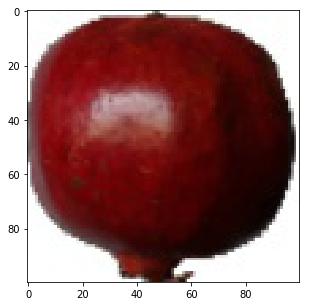

In [16]:
a = training_x[12000]
b = training_y[12000]
c = np.array(a, dtype=np.uint8)
print(c)
plt.imshow(c)
print(train_categories[np.argmax(b)])

In [17]:
# Normalize the input data
for i in range(len(training_x)):
    training_x[i] = training_x[i]/255
    print("Training Set Standardization Status: {}/{}".format(i+1, len(training_x)))

Training Set Standardization Status: 1/41322
Training Set Standardization Status: 2/41322
Training Set Standardization Status: 3/41322
Training Set Standardization Status: 4/41322
Training Set Standardization Status: 5/41322
Training Set Standardization Status: 6/41322
Training Set Standardization Status: 7/41322
Training Set Standardization Status: 8/41322
Training Set Standardization Status: 9/41322
Training Set Standardization Status: 10/41322
Training Set Standardization Status: 11/41322
Training Set Standardization Status: 12/41322
Training Set Standardization Status: 13/41322
Training Set Standardization Status: 14/41322
Training Set Standardization Status: 15/41322
Training Set Standardization Status: 16/41322
Training Set Standardization Status: 17/41322
Training Set Standardization Status: 18/41322
Training Set Standardization Status: 19/41322
Training Set Standardization Status: 20/41322
Training Set Standardization Status: 21/41322
Training Set Standardization Status: 22/413

Training Set Standardization Status: 198/41322
Training Set Standardization Status: 199/41322
Training Set Standardization Status: 200/41322
Training Set Standardization Status: 201/41322
Training Set Standardization Status: 202/41322
Training Set Standardization Status: 203/41322
Training Set Standardization Status: 204/41322
Training Set Standardization Status: 205/41322
Training Set Standardization Status: 206/41322
Training Set Standardization Status: 207/41322
Training Set Standardization Status: 208/41322
Training Set Standardization Status: 209/41322
Training Set Standardization Status: 210/41322
Training Set Standardization Status: 211/41322
Training Set Standardization Status: 212/41322
Training Set Standardization Status: 213/41322
Training Set Standardization Status: 214/41322
Training Set Standardization Status: 215/41322
Training Set Standardization Status: 216/41322
Training Set Standardization Status: 217/41322
Training Set Standardization Status: 218/41322
Training Set 

Training Set Standardization Status: 410/41322
Training Set Standardization Status: 411/41322
Training Set Standardization Status: 412/41322
Training Set Standardization Status: 413/41322
Training Set Standardization Status: 414/41322
Training Set Standardization Status: 415/41322
Training Set Standardization Status: 416/41322
Training Set Standardization Status: 417/41322
Training Set Standardization Status: 418/41322
Training Set Standardization Status: 419/41322
Training Set Standardization Status: 420/41322
Training Set Standardization Status: 421/41322
Training Set Standardization Status: 422/41322
Training Set Standardization Status: 423/41322
Training Set Standardization Status: 424/41322
Training Set Standardization Status: 425/41322
Training Set Standardization Status: 426/41322
Training Set Standardization Status: 427/41322
Training Set Standardization Status: 428/41322
Training Set Standardization Status: 429/41322
Training Set Standardization Status: 430/41322
Training Set 

Training Set Standardization Status: 622/41322
Training Set Standardization Status: 623/41322
Training Set Standardization Status: 624/41322
Training Set Standardization Status: 625/41322
Training Set Standardization Status: 626/41322
Training Set Standardization Status: 627/41322
Training Set Standardization Status: 628/41322
Training Set Standardization Status: 629/41322
Training Set Standardization Status: 630/41322
Training Set Standardization Status: 631/41322
Training Set Standardization Status: 632/41322
Training Set Standardization Status: 633/41322
Training Set Standardization Status: 634/41322
Training Set Standardization Status: 635/41322
Training Set Standardization Status: 636/41322
Training Set Standardization Status: 637/41322
Training Set Standardization Status: 638/41322
Training Set Standardization Status: 639/41322
Training Set Standardization Status: 640/41322
Training Set Standardization Status: 641/41322
Training Set Standardization Status: 642/41322
Training Set 

Training Set Standardization Status: 845/41322
Training Set Standardization Status: 846/41322
Training Set Standardization Status: 847/41322
Training Set Standardization Status: 848/41322
Training Set Standardization Status: 849/41322
Training Set Standardization Status: 850/41322
Training Set Standardization Status: 851/41322
Training Set Standardization Status: 852/41322
Training Set Standardization Status: 853/41322
Training Set Standardization Status: 854/41322
Training Set Standardization Status: 855/41322
Training Set Standardization Status: 856/41322
Training Set Standardization Status: 857/41322
Training Set Standardization Status: 858/41322
Training Set Standardization Status: 859/41322
Training Set Standardization Status: 860/41322
Training Set Standardization Status: 861/41322
Training Set Standardization Status: 862/41322
Training Set Standardization Status: 863/41322
Training Set Standardization Status: 864/41322
Training Set Standardization Status: 865/41322
Training Set 

Training Set Standardization Status: 1050/41322
Training Set Standardization Status: 1051/41322
Training Set Standardization Status: 1052/41322
Training Set Standardization Status: 1053/41322
Training Set Standardization Status: 1054/41322
Training Set Standardization Status: 1055/41322
Training Set Standardization Status: 1056/41322
Training Set Standardization Status: 1057/41322
Training Set Standardization Status: 1058/41322
Training Set Standardization Status: 1059/41322
Training Set Standardization Status: 1060/41322
Training Set Standardization Status: 1061/41322
Training Set Standardization Status: 1062/41322
Training Set Standardization Status: 1063/41322
Training Set Standardization Status: 1064/41322
Training Set Standardization Status: 1065/41322
Training Set Standardization Status: 1066/41322
Training Set Standardization Status: 1067/41322
Training Set Standardization Status: 1068/41322
Training Set Standardization Status: 1069/41322
Training Set Standardization Status: 107

Training Set Standardization Status: 1225/41322
Training Set Standardization Status: 1226/41322
Training Set Standardization Status: 1227/41322
Training Set Standardization Status: 1228/41322
Training Set Standardization Status: 1229/41322
Training Set Standardization Status: 1230/41322
Training Set Standardization Status: 1231/41322
Training Set Standardization Status: 1232/41322
Training Set Standardization Status: 1233/41322
Training Set Standardization Status: 1234/41322
Training Set Standardization Status: 1235/41322
Training Set Standardization Status: 1236/41322
Training Set Standardization Status: 1237/41322
Training Set Standardization Status: 1238/41322
Training Set Standardization Status: 1239/41322
Training Set Standardization Status: 1240/41322
Training Set Standardization Status: 1241/41322
Training Set Standardization Status: 1242/41322
Training Set Standardization Status: 1243/41322
Training Set Standardization Status: 1244/41322
Training Set Standardization Status: 124

Training Set Standardization Status: 1406/41322
Training Set Standardization Status: 1407/41322
Training Set Standardization Status: 1408/41322
Training Set Standardization Status: 1409/41322
Training Set Standardization Status: 1410/41322
Training Set Standardization Status: 1411/41322
Training Set Standardization Status: 1412/41322
Training Set Standardization Status: 1413/41322
Training Set Standardization Status: 1414/41322
Training Set Standardization Status: 1415/41322
Training Set Standardization Status: 1416/41322
Training Set Standardization Status: 1417/41322
Training Set Standardization Status: 1418/41322
Training Set Standardization Status: 1419/41322
Training Set Standardization Status: 1420/41322
Training Set Standardization Status: 1421/41322
Training Set Standardization Status: 1422/41322
Training Set Standardization Status: 1423/41322
Training Set Standardization Status: 1424/41322
Training Set Standardization Status: 1425/41322
Training Set Standardization Status: 142

Training Set Standardization Status: 1593/41322
Training Set Standardization Status: 1594/41322
Training Set Standardization Status: 1595/41322
Training Set Standardization Status: 1596/41322
Training Set Standardization Status: 1597/41322
Training Set Standardization Status: 1598/41322
Training Set Standardization Status: 1599/41322
Training Set Standardization Status: 1600/41322
Training Set Standardization Status: 1601/41322
Training Set Standardization Status: 1602/41322
Training Set Standardization Status: 1603/41322
Training Set Standardization Status: 1604/41322
Training Set Standardization Status: 1605/41322
Training Set Standardization Status: 1606/41322
Training Set Standardization Status: 1607/41322
Training Set Standardization Status: 1608/41322
Training Set Standardization Status: 1609/41322
Training Set Standardization Status: 1610/41322
Training Set Standardization Status: 1611/41322
Training Set Standardization Status: 1612/41322
Training Set Standardization Status: 161

Training Set Standardization Status: 1843/41322
Training Set Standardization Status: 1844/41322
Training Set Standardization Status: 1845/41322
Training Set Standardization Status: 1846/41322
Training Set Standardization Status: 1847/41322
Training Set Standardization Status: 1848/41322
Training Set Standardization Status: 1849/41322
Training Set Standardization Status: 1850/41322
Training Set Standardization Status: 1851/41322
Training Set Standardization Status: 1852/41322
Training Set Standardization Status: 1853/41322
Training Set Standardization Status: 1854/41322
Training Set Standardization Status: 1855/41322
Training Set Standardization Status: 1856/41322
Training Set Standardization Status: 1857/41322
Training Set Standardization Status: 1858/41322
Training Set Standardization Status: 1859/41322
Training Set Standardization Status: 1860/41322
Training Set Standardization Status: 1861/41322
Training Set Standardization Status: 1862/41322
Training Set Standardization Status: 186

Training Set Standardization Status: 2035/41322
Training Set Standardization Status: 2036/41322
Training Set Standardization Status: 2037/41322
Training Set Standardization Status: 2038/41322
Training Set Standardization Status: 2039/41322
Training Set Standardization Status: 2040/41322
Training Set Standardization Status: 2041/41322
Training Set Standardization Status: 2042/41322
Training Set Standardization Status: 2043/41322
Training Set Standardization Status: 2044/41322
Training Set Standardization Status: 2045/41322
Training Set Standardization Status: 2046/41322
Training Set Standardization Status: 2047/41322
Training Set Standardization Status: 2048/41322
Training Set Standardization Status: 2049/41322
Training Set Standardization Status: 2050/41322
Training Set Standardization Status: 2051/41322
Training Set Standardization Status: 2052/41322
Training Set Standardization Status: 2053/41322
Training Set Standardization Status: 2054/41322
Training Set Standardization Status: 205

Training Set Standardization Status: 2268/41322
Training Set Standardization Status: 2269/41322
Training Set Standardization Status: 2270/41322
Training Set Standardization Status: 2271/41322
Training Set Standardization Status: 2272/41322
Training Set Standardization Status: 2273/41322
Training Set Standardization Status: 2274/41322
Training Set Standardization Status: 2275/41322
Training Set Standardization Status: 2276/41322
Training Set Standardization Status: 2277/41322
Training Set Standardization Status: 2278/41322
Training Set Standardization Status: 2279/41322
Training Set Standardization Status: 2280/41322
Training Set Standardization Status: 2281/41322
Training Set Standardization Status: 2282/41322
Training Set Standardization Status: 2283/41322
Training Set Standardization Status: 2284/41322
Training Set Standardization Status: 2285/41322
Training Set Standardization Status: 2286/41322
Training Set Standardization Status: 2287/41322
Training Set Standardization Status: 228

Training Set Standardization Status: 2581/41322
Training Set Standardization Status: 2582/41322
Training Set Standardization Status: 2583/41322
Training Set Standardization Status: 2584/41322
Training Set Standardization Status: 2585/41322
Training Set Standardization Status: 2586/41322
Training Set Standardization Status: 2587/41322
Training Set Standardization Status: 2588/41322
Training Set Standardization Status: 2589/41322
Training Set Standardization Status: 2590/41322
Training Set Standardization Status: 2591/41322
Training Set Standardization Status: 2592/41322
Training Set Standardization Status: 2593/41322
Training Set Standardization Status: 2594/41322
Training Set Standardization Status: 2595/41322
Training Set Standardization Status: 2596/41322
Training Set Standardization Status: 2597/41322
Training Set Standardization Status: 2598/41322
Training Set Standardization Status: 2599/41322
Training Set Standardization Status: 2600/41322
Training Set Standardization Status: 260

Training Set Standardization Status: 2915/41322
Training Set Standardization Status: 2916/41322
Training Set Standardization Status: 2917/41322
Training Set Standardization Status: 2918/41322
Training Set Standardization Status: 2919/41322
Training Set Standardization Status: 2920/41322
Training Set Standardization Status: 2921/41322
Training Set Standardization Status: 2922/41322
Training Set Standardization Status: 2923/41322
Training Set Standardization Status: 2924/41322
Training Set Standardization Status: 2925/41322
Training Set Standardization Status: 2926/41322
Training Set Standardization Status: 2927/41322
Training Set Standardization Status: 2928/41322
Training Set Standardization Status: 2929/41322
Training Set Standardization Status: 2930/41322
Training Set Standardization Status: 2931/41322
Training Set Standardization Status: 2932/41322
Training Set Standardization Status: 2933/41322
Training Set Standardization Status: 2934/41322
Training Set Standardization Status: 293

Training Set Standardization Status: 3496/41322
Training Set Standardization Status: 3497/41322
Training Set Standardization Status: 3498/41322
Training Set Standardization Status: 3499/41322
Training Set Standardization Status: 3500/41322
Training Set Standardization Status: 3501/41322
Training Set Standardization Status: 3502/41322
Training Set Standardization Status: 3503/41322
Training Set Standardization Status: 3504/41322
Training Set Standardization Status: 3505/41322
Training Set Standardization Status: 3506/41322
Training Set Standardization Status: 3507/41322
Training Set Standardization Status: 3508/41322
Training Set Standardization Status: 3509/41322
Training Set Standardization Status: 3510/41322
Training Set Standardization Status: 3511/41322
Training Set Standardization Status: 3512/41322
Training Set Standardization Status: 3513/41322
Training Set Standardization Status: 3514/41322
Training Set Standardization Status: 3515/41322
Training Set Standardization Status: 351

Training Set Standardization Status: 4183/41322
Training Set Standardization Status: 4184/41322
Training Set Standardization Status: 4185/41322
Training Set Standardization Status: 4186/41322
Training Set Standardization Status: 4187/41322
Training Set Standardization Status: 4188/41322
Training Set Standardization Status: 4189/41322
Training Set Standardization Status: 4190/41322
Training Set Standardization Status: 4191/41322
Training Set Standardization Status: 4192/41322
Training Set Standardization Status: 4193/41322
Training Set Standardization Status: 4194/41322
Training Set Standardization Status: 4195/41322
Training Set Standardization Status: 4196/41322
Training Set Standardization Status: 4197/41322
Training Set Standardization Status: 4198/41322
Training Set Standardization Status: 4199/41322
Training Set Standardization Status: 4200/41322
Training Set Standardization Status: 4201/41322
Training Set Standardization Status: 4202/41322
Training Set Standardization Status: 420

Training Set Standardization Status: 4902/41322
Training Set Standardization Status: 4903/41322
Training Set Standardization Status: 4904/41322
Training Set Standardization Status: 4905/41322
Training Set Standardization Status: 4906/41322
Training Set Standardization Status: 4907/41322
Training Set Standardization Status: 4908/41322
Training Set Standardization Status: 4909/41322
Training Set Standardization Status: 4910/41322
Training Set Standardization Status: 4911/41322
Training Set Standardization Status: 4912/41322
Training Set Standardization Status: 4913/41322
Training Set Standardization Status: 4914/41322
Training Set Standardization Status: 4915/41322
Training Set Standardization Status: 4916/41322
Training Set Standardization Status: 4917/41322
Training Set Standardization Status: 4918/41322
Training Set Standardization Status: 4919/41322
Training Set Standardization Status: 4920/41322
Training Set Standardization Status: 4921/41322
Training Set Standardization Status: 492

Training Set Standardization Status: 5165/41322
Training Set Standardization Status: 5166/41322
Training Set Standardization Status: 5167/41322
Training Set Standardization Status: 5168/41322
Training Set Standardization Status: 5169/41322
Training Set Standardization Status: 5170/41322
Training Set Standardization Status: 5171/41322
Training Set Standardization Status: 5172/41322
Training Set Standardization Status: 5173/41322
Training Set Standardization Status: 5174/41322
Training Set Standardization Status: 5175/41322
Training Set Standardization Status: 5176/41322
Training Set Standardization Status: 5177/41322
Training Set Standardization Status: 5178/41322
Training Set Standardization Status: 5179/41322
Training Set Standardization Status: 5180/41322
Training Set Standardization Status: 5181/41322
Training Set Standardization Status: 5182/41322
Training Set Standardization Status: 5183/41322
Training Set Standardization Status: 5184/41322
Training Set Standardization Status: 518

Training Set Standardization Status: 5476/41322
Training Set Standardization Status: 5477/41322
Training Set Standardization Status: 5478/41322
Training Set Standardization Status: 5479/41322
Training Set Standardization Status: 5480/41322
Training Set Standardization Status: 5481/41322
Training Set Standardization Status: 5482/41322
Training Set Standardization Status: 5483/41322
Training Set Standardization Status: 5484/41322
Training Set Standardization Status: 5485/41322
Training Set Standardization Status: 5486/41322
Training Set Standardization Status: 5487/41322
Training Set Standardization Status: 5488/41322
Training Set Standardization Status: 5489/41322
Training Set Standardization Status: 5490/41322
Training Set Standardization Status: 5491/41322
Training Set Standardization Status: 5492/41322
Training Set Standardization Status: 5493/41322
Training Set Standardization Status: 5494/41322
Training Set Standardization Status: 5495/41322
Training Set Standardization Status: 549

Training Set Standardization Status: 5719/41322
Training Set Standardization Status: 5720/41322
Training Set Standardization Status: 5721/41322
Training Set Standardization Status: 5722/41322
Training Set Standardization Status: 5723/41322
Training Set Standardization Status: 5724/41322
Training Set Standardization Status: 5725/41322
Training Set Standardization Status: 5726/41322
Training Set Standardization Status: 5727/41322
Training Set Standardization Status: 5728/41322
Training Set Standardization Status: 5729/41322
Training Set Standardization Status: 5730/41322
Training Set Standardization Status: 5731/41322
Training Set Standardization Status: 5732/41322
Training Set Standardization Status: 5733/41322
Training Set Standardization Status: 5734/41322
Training Set Standardization Status: 5735/41322
Training Set Standardization Status: 5736/41322
Training Set Standardization Status: 5737/41322
Training Set Standardization Status: 5738/41322
Training Set Standardization Status: 573

Training Set Standardization Status: 5995/41322
Training Set Standardization Status: 5996/41322
Training Set Standardization Status: 5997/41322
Training Set Standardization Status: 5998/41322
Training Set Standardization Status: 5999/41322
Training Set Standardization Status: 6000/41322
Training Set Standardization Status: 6001/41322
Training Set Standardization Status: 6002/41322
Training Set Standardization Status: 6003/41322
Training Set Standardization Status: 6004/41322
Training Set Standardization Status: 6005/41322
Training Set Standardization Status: 6006/41322
Training Set Standardization Status: 6007/41322
Training Set Standardization Status: 6008/41322
Training Set Standardization Status: 6009/41322
Training Set Standardization Status: 6010/41322
Training Set Standardization Status: 6011/41322
Training Set Standardization Status: 6012/41322
Training Set Standardization Status: 6013/41322
Training Set Standardization Status: 6014/41322
Training Set Standardization Status: 601

Training Set Standardization Status: 6172/41322
Training Set Standardization Status: 6173/41322
Training Set Standardization Status: 6174/41322
Training Set Standardization Status: 6175/41322
Training Set Standardization Status: 6176/41322
Training Set Standardization Status: 6177/41322
Training Set Standardization Status: 6178/41322
Training Set Standardization Status: 6179/41322
Training Set Standardization Status: 6180/41322
Training Set Standardization Status: 6181/41322
Training Set Standardization Status: 6182/41322
Training Set Standardization Status: 6183/41322
Training Set Standardization Status: 6184/41322
Training Set Standardization Status: 6185/41322
Training Set Standardization Status: 6186/41322
Training Set Standardization Status: 6187/41322
Training Set Standardization Status: 6188/41322
Training Set Standardization Status: 6189/41322
Training Set Standardization Status: 6190/41322
Training Set Standardization Status: 6191/41322
Training Set Standardization Status: 619

Training Set Standardization Status: 6463/41322
Training Set Standardization Status: 6464/41322
Training Set Standardization Status: 6465/41322
Training Set Standardization Status: 6466/41322
Training Set Standardization Status: 6467/41322
Training Set Standardization Status: 6468/41322
Training Set Standardization Status: 6469/41322
Training Set Standardization Status: 6470/41322
Training Set Standardization Status: 6471/41322
Training Set Standardization Status: 6472/41322
Training Set Standardization Status: 6473/41322
Training Set Standardization Status: 6474/41322
Training Set Standardization Status: 6475/41322
Training Set Standardization Status: 6476/41322
Training Set Standardization Status: 6477/41322
Training Set Standardization Status: 6478/41322
Training Set Standardization Status: 6479/41322
Training Set Standardization Status: 6480/41322
Training Set Standardization Status: 6481/41322
Training Set Standardization Status: 6482/41322
Training Set Standardization Status: 648

Training Set Standardization Status: 6656/41322
Training Set Standardization Status: 6657/41322
Training Set Standardization Status: 6658/41322
Training Set Standardization Status: 6659/41322
Training Set Standardization Status: 6660/41322
Training Set Standardization Status: 6661/41322
Training Set Standardization Status: 6662/41322
Training Set Standardization Status: 6663/41322
Training Set Standardization Status: 6664/41322
Training Set Standardization Status: 6665/41322
Training Set Standardization Status: 6666/41322
Training Set Standardization Status: 6667/41322
Training Set Standardization Status: 6668/41322
Training Set Standardization Status: 6669/41322
Training Set Standardization Status: 6670/41322
Training Set Standardization Status: 6671/41322
Training Set Standardization Status: 6672/41322
Training Set Standardization Status: 6673/41322
Training Set Standardization Status: 6674/41322
Training Set Standardization Status: 6675/41322
Training Set Standardization Status: 667

Training Set Standardization Status: 6911/41322
Training Set Standardization Status: 6912/41322
Training Set Standardization Status: 6913/41322
Training Set Standardization Status: 6914/41322
Training Set Standardization Status: 6915/41322
Training Set Standardization Status: 6916/41322
Training Set Standardization Status: 6917/41322
Training Set Standardization Status: 6918/41322
Training Set Standardization Status: 6919/41322
Training Set Standardization Status: 6920/41322
Training Set Standardization Status: 6921/41322
Training Set Standardization Status: 6922/41322
Training Set Standardization Status: 6923/41322
Training Set Standardization Status: 6924/41322
Training Set Standardization Status: 6925/41322
Training Set Standardization Status: 6926/41322
Training Set Standardization Status: 6927/41322
Training Set Standardization Status: 6928/41322
Training Set Standardization Status: 6929/41322
Training Set Standardization Status: 6930/41322
Training Set Standardization Status: 693

Training Set Standardization Status: 7210/41322
Training Set Standardization Status: 7211/41322
Training Set Standardization Status: 7212/41322
Training Set Standardization Status: 7213/41322
Training Set Standardization Status: 7214/41322
Training Set Standardization Status: 7215/41322
Training Set Standardization Status: 7216/41322
Training Set Standardization Status: 7217/41322
Training Set Standardization Status: 7218/41322
Training Set Standardization Status: 7219/41322
Training Set Standardization Status: 7220/41322
Training Set Standardization Status: 7221/41322
Training Set Standardization Status: 7222/41322
Training Set Standardization Status: 7223/41322
Training Set Standardization Status: 7224/41322
Training Set Standardization Status: 7225/41322
Training Set Standardization Status: 7226/41322
Training Set Standardization Status: 7227/41322
Training Set Standardization Status: 7228/41322
Training Set Standardization Status: 7229/41322
Training Set Standardization Status: 723

Training Set Standardization Status: 7455/41322
Training Set Standardization Status: 7456/41322
Training Set Standardization Status: 7457/41322
Training Set Standardization Status: 7458/41322
Training Set Standardization Status: 7459/41322
Training Set Standardization Status: 7460/41322
Training Set Standardization Status: 7461/41322
Training Set Standardization Status: 7462/41322
Training Set Standardization Status: 7463/41322
Training Set Standardization Status: 7464/41322
Training Set Standardization Status: 7465/41322
Training Set Standardization Status: 7466/41322
Training Set Standardization Status: 7467/41322
Training Set Standardization Status: 7468/41322
Training Set Standardization Status: 7469/41322
Training Set Standardization Status: 7470/41322
Training Set Standardization Status: 7471/41322
Training Set Standardization Status: 7472/41322
Training Set Standardization Status: 7473/41322
Training Set Standardization Status: 7474/41322
Training Set Standardization Status: 747

Training Set Standardization Status: 7717/41322
Training Set Standardization Status: 7718/41322
Training Set Standardization Status: 7719/41322
Training Set Standardization Status: 7720/41322
Training Set Standardization Status: 7721/41322
Training Set Standardization Status: 7722/41322
Training Set Standardization Status: 7723/41322
Training Set Standardization Status: 7724/41322
Training Set Standardization Status: 7725/41322
Training Set Standardization Status: 7726/41322
Training Set Standardization Status: 7727/41322
Training Set Standardization Status: 7728/41322
Training Set Standardization Status: 7729/41322
Training Set Standardization Status: 7730/41322
Training Set Standardization Status: 7731/41322
Training Set Standardization Status: 7732/41322
Training Set Standardization Status: 7733/41322
Training Set Standardization Status: 7734/41322
Training Set Standardization Status: 7735/41322
Training Set Standardization Status: 7736/41322
Training Set Standardization Status: 773

Training Set Standardization Status: 7939/41322
Training Set Standardization Status: 7940/41322
Training Set Standardization Status: 7941/41322
Training Set Standardization Status: 7942/41322
Training Set Standardization Status: 7943/41322
Training Set Standardization Status: 7944/41322
Training Set Standardization Status: 7945/41322
Training Set Standardization Status: 7946/41322
Training Set Standardization Status: 7947/41322
Training Set Standardization Status: 7948/41322
Training Set Standardization Status: 7949/41322
Training Set Standardization Status: 7950/41322
Training Set Standardization Status: 7951/41322
Training Set Standardization Status: 7952/41322
Training Set Standardization Status: 7953/41322
Training Set Standardization Status: 7954/41322
Training Set Standardization Status: 7955/41322
Training Set Standardization Status: 7956/41322
Training Set Standardization Status: 7957/41322
Training Set Standardization Status: 7958/41322
Training Set Standardization Status: 795

Training Set Standardization Status: 8244/41322
Training Set Standardization Status: 8245/41322
Training Set Standardization Status: 8246/41322
Training Set Standardization Status: 8247/41322
Training Set Standardization Status: 8248/41322
Training Set Standardization Status: 8249/41322
Training Set Standardization Status: 8250/41322
Training Set Standardization Status: 8251/41322
Training Set Standardization Status: 8252/41322
Training Set Standardization Status: 8253/41322
Training Set Standardization Status: 8254/41322
Training Set Standardization Status: 8255/41322
Training Set Standardization Status: 8256/41322
Training Set Standardization Status: 8257/41322
Training Set Standardization Status: 8258/41322
Training Set Standardization Status: 8259/41322
Training Set Standardization Status: 8260/41322
Training Set Standardization Status: 8261/41322
Training Set Standardization Status: 8262/41322
Training Set Standardization Status: 8263/41322
Training Set Standardization Status: 826

Training Set Standardization Status: 8481/41322
Training Set Standardization Status: 8482/41322
Training Set Standardization Status: 8483/41322
Training Set Standardization Status: 8484/41322
Training Set Standardization Status: 8485/41322
Training Set Standardization Status: 8486/41322
Training Set Standardization Status: 8487/41322
Training Set Standardization Status: 8488/41322
Training Set Standardization Status: 8489/41322
Training Set Standardization Status: 8490/41322
Training Set Standardization Status: 8491/41322
Training Set Standardization Status: 8492/41322
Training Set Standardization Status: 8493/41322
Training Set Standardization Status: 8494/41322
Training Set Standardization Status: 8495/41322
Training Set Standardization Status: 8496/41322
Training Set Standardization Status: 8497/41322
Training Set Standardization Status: 8498/41322
Training Set Standardization Status: 8499/41322
Training Set Standardization Status: 8500/41322
Training Set Standardization Status: 850

Training Set Standardization Status: 8889/41322
Training Set Standardization Status: 8890/41322
Training Set Standardization Status: 8891/41322
Training Set Standardization Status: 8892/41322
Training Set Standardization Status: 8893/41322
Training Set Standardization Status: 8894/41322
Training Set Standardization Status: 8895/41322
Training Set Standardization Status: 8896/41322
Training Set Standardization Status: 8897/41322
Training Set Standardization Status: 8898/41322
Training Set Standardization Status: 8899/41322
Training Set Standardization Status: 8900/41322
Training Set Standardization Status: 8901/41322
Training Set Standardization Status: 8902/41322
Training Set Standardization Status: 8903/41322
Training Set Standardization Status: 8904/41322
Training Set Standardization Status: 8905/41322
Training Set Standardization Status: 8906/41322
Training Set Standardization Status: 8907/41322
Training Set Standardization Status: 8908/41322
Training Set Standardization Status: 890

Training Set Standardization Status: 9096/41322
Training Set Standardization Status: 9097/41322
Training Set Standardization Status: 9098/41322
Training Set Standardization Status: 9099/41322
Training Set Standardization Status: 9100/41322
Training Set Standardization Status: 9101/41322
Training Set Standardization Status: 9102/41322
Training Set Standardization Status: 9103/41322
Training Set Standardization Status: 9104/41322
Training Set Standardization Status: 9105/41322
Training Set Standardization Status: 9106/41322
Training Set Standardization Status: 9107/41322
Training Set Standardization Status: 9108/41322
Training Set Standardization Status: 9109/41322
Training Set Standardization Status: 9110/41322
Training Set Standardization Status: 9111/41322
Training Set Standardization Status: 9112/41322
Training Set Standardization Status: 9113/41322
Training Set Standardization Status: 9114/41322
Training Set Standardization Status: 9115/41322
Training Set Standardization Status: 911

Training Set Standardization Status: 9320/41322
Training Set Standardization Status: 9321/41322
Training Set Standardization Status: 9322/41322
Training Set Standardization Status: 9323/41322
Training Set Standardization Status: 9324/41322
Training Set Standardization Status: 9325/41322
Training Set Standardization Status: 9326/41322
Training Set Standardization Status: 9327/41322
Training Set Standardization Status: 9328/41322
Training Set Standardization Status: 9329/41322
Training Set Standardization Status: 9330/41322
Training Set Standardization Status: 9331/41322
Training Set Standardization Status: 9332/41322
Training Set Standardization Status: 9333/41322
Training Set Standardization Status: 9334/41322
Training Set Standardization Status: 9335/41322
Training Set Standardization Status: 9336/41322
Training Set Standardization Status: 9337/41322
Training Set Standardization Status: 9338/41322
Training Set Standardization Status: 9339/41322
Training Set Standardization Status: 934

Training Set Standardization Status: 9659/41322
Training Set Standardization Status: 9660/41322
Training Set Standardization Status: 9661/41322
Training Set Standardization Status: 9662/41322
Training Set Standardization Status: 9663/41322
Training Set Standardization Status: 9664/41322
Training Set Standardization Status: 9665/41322
Training Set Standardization Status: 9666/41322
Training Set Standardization Status: 9667/41322
Training Set Standardization Status: 9668/41322
Training Set Standardization Status: 9669/41322
Training Set Standardization Status: 9670/41322
Training Set Standardization Status: 9671/41322
Training Set Standardization Status: 9672/41322
Training Set Standardization Status: 9673/41322
Training Set Standardization Status: 9674/41322
Training Set Standardization Status: 9675/41322
Training Set Standardization Status: 9676/41322
Training Set Standardization Status: 9677/41322
Training Set Standardization Status: 9678/41322
Training Set Standardization Status: 967

Training Set Standardization Status: 10020/41322
Training Set Standardization Status: 10021/41322
Training Set Standardization Status: 10022/41322
Training Set Standardization Status: 10023/41322
Training Set Standardization Status: 10024/41322
Training Set Standardization Status: 10025/41322
Training Set Standardization Status: 10026/41322
Training Set Standardization Status: 10027/41322
Training Set Standardization Status: 10028/41322
Training Set Standardization Status: 10029/41322
Training Set Standardization Status: 10030/41322
Training Set Standardization Status: 10031/41322
Training Set Standardization Status: 10032/41322
Training Set Standardization Status: 10033/41322
Training Set Standardization Status: 10034/41322
Training Set Standardization Status: 10035/41322
Training Set Standardization Status: 10036/41322
Training Set Standardization Status: 10037/41322
Training Set Standardization Status: 10038/41322
Training Set Standardization Status: 10039/41322
Training Set Standar

Training Set Standardization Status: 10308/41322
Training Set Standardization Status: 10309/41322
Training Set Standardization Status: 10310/41322
Training Set Standardization Status: 10311/41322
Training Set Standardization Status: 10312/41322
Training Set Standardization Status: 10313/41322
Training Set Standardization Status: 10314/41322
Training Set Standardization Status: 10315/41322
Training Set Standardization Status: 10316/41322
Training Set Standardization Status: 10317/41322
Training Set Standardization Status: 10318/41322
Training Set Standardization Status: 10319/41322
Training Set Standardization Status: 10320/41322
Training Set Standardization Status: 10321/41322
Training Set Standardization Status: 10322/41322
Training Set Standardization Status: 10323/41322
Training Set Standardization Status: 10324/41322
Training Set Standardization Status: 10325/41322
Training Set Standardization Status: 10326/41322
Training Set Standardization Status: 10327/41322
Training Set Standar

Training Set Standardization Status: 10484/41322
Training Set Standardization Status: 10485/41322
Training Set Standardization Status: 10486/41322
Training Set Standardization Status: 10487/41322
Training Set Standardization Status: 10488/41322
Training Set Standardization Status: 10489/41322
Training Set Standardization Status: 10490/41322
Training Set Standardization Status: 10491/41322
Training Set Standardization Status: 10492/41322
Training Set Standardization Status: 10493/41322
Training Set Standardization Status: 10494/41322
Training Set Standardization Status: 10495/41322
Training Set Standardization Status: 10496/41322
Training Set Standardization Status: 10497/41322
Training Set Standardization Status: 10498/41322
Training Set Standardization Status: 10499/41322
Training Set Standardization Status: 10500/41322
Training Set Standardization Status: 10501/41322
Training Set Standardization Status: 10502/41322
Training Set Standardization Status: 10503/41322
Training Set Standar

Training Set Standardization Status: 10707/41322
Training Set Standardization Status: 10708/41322
Training Set Standardization Status: 10709/41322
Training Set Standardization Status: 10710/41322
Training Set Standardization Status: 10711/41322
Training Set Standardization Status: 10712/41322
Training Set Standardization Status: 10713/41322
Training Set Standardization Status: 10714/41322
Training Set Standardization Status: 10715/41322
Training Set Standardization Status: 10716/41322
Training Set Standardization Status: 10717/41322
Training Set Standardization Status: 10718/41322
Training Set Standardization Status: 10719/41322
Training Set Standardization Status: 10720/41322
Training Set Standardization Status: 10721/41322
Training Set Standardization Status: 10722/41322
Training Set Standardization Status: 10723/41322
Training Set Standardization Status: 10724/41322
Training Set Standardization Status: 10725/41322
Training Set Standardization Status: 10726/41322
Training Set Standar

Training Set Standardization Status: 10895/41322
Training Set Standardization Status: 10896/41322
Training Set Standardization Status: 10897/41322
Training Set Standardization Status: 10898/41322
Training Set Standardization Status: 10899/41322
Training Set Standardization Status: 10900/41322
Training Set Standardization Status: 10901/41322
Training Set Standardization Status: 10902/41322
Training Set Standardization Status: 10903/41322
Training Set Standardization Status: 10904/41322
Training Set Standardization Status: 10905/41322
Training Set Standardization Status: 10906/41322
Training Set Standardization Status: 10907/41322
Training Set Standardization Status: 10908/41322
Training Set Standardization Status: 10909/41322
Training Set Standardization Status: 10910/41322
Training Set Standardization Status: 10911/41322
Training Set Standardization Status: 10912/41322
Training Set Standardization Status: 10913/41322
Training Set Standardization Status: 10914/41322
Training Set Standar

Training Set Standardization Status: 11216/41322
Training Set Standardization Status: 11217/41322
Training Set Standardization Status: 11218/41322
Training Set Standardization Status: 11219/41322
Training Set Standardization Status: 11220/41322
Training Set Standardization Status: 11221/41322
Training Set Standardization Status: 11222/41322
Training Set Standardization Status: 11223/41322
Training Set Standardization Status: 11224/41322
Training Set Standardization Status: 11225/41322
Training Set Standardization Status: 11226/41322
Training Set Standardization Status: 11227/41322
Training Set Standardization Status: 11228/41322
Training Set Standardization Status: 11229/41322
Training Set Standardization Status: 11230/41322
Training Set Standardization Status: 11231/41322
Training Set Standardization Status: 11232/41322
Training Set Standardization Status: 11233/41322
Training Set Standardization Status: 11234/41322
Training Set Standardization Status: 11235/41322
Training Set Standar

Training Set Standardization Status: 11500/41322
Training Set Standardization Status: 11501/41322
Training Set Standardization Status: 11502/41322
Training Set Standardization Status: 11503/41322
Training Set Standardization Status: 11504/41322
Training Set Standardization Status: 11505/41322
Training Set Standardization Status: 11506/41322
Training Set Standardization Status: 11507/41322
Training Set Standardization Status: 11508/41322
Training Set Standardization Status: 11509/41322
Training Set Standardization Status: 11510/41322
Training Set Standardization Status: 11511/41322
Training Set Standardization Status: 11512/41322
Training Set Standardization Status: 11513/41322
Training Set Standardization Status: 11514/41322
Training Set Standardization Status: 11515/41322
Training Set Standardization Status: 11516/41322
Training Set Standardization Status: 11517/41322
Training Set Standardization Status: 11518/41322
Training Set Standardization Status: 11519/41322
Training Set Standar

Training Set Standardization Status: 11705/41322
Training Set Standardization Status: 11706/41322
Training Set Standardization Status: 11707/41322
Training Set Standardization Status: 11708/41322
Training Set Standardization Status: 11709/41322
Training Set Standardization Status: 11710/41322
Training Set Standardization Status: 11711/41322
Training Set Standardization Status: 11712/41322
Training Set Standardization Status: 11713/41322
Training Set Standardization Status: 11714/41322
Training Set Standardization Status: 11715/41322
Training Set Standardization Status: 11716/41322
Training Set Standardization Status: 11717/41322
Training Set Standardization Status: 11718/41322
Training Set Standardization Status: 11719/41322
Training Set Standardization Status: 11720/41322
Training Set Standardization Status: 11721/41322
Training Set Standardization Status: 11722/41322
Training Set Standardization Status: 11723/41322
Training Set Standardization Status: 11724/41322
Training Set Standar

Training Set Standardization Status: 11973/41322
Training Set Standardization Status: 11974/41322
Training Set Standardization Status: 11975/41322
Training Set Standardization Status: 11976/41322
Training Set Standardization Status: 11977/41322
Training Set Standardization Status: 11978/41322
Training Set Standardization Status: 11979/41322
Training Set Standardization Status: 11980/41322
Training Set Standardization Status: 11981/41322
Training Set Standardization Status: 11982/41322
Training Set Standardization Status: 11983/41322
Training Set Standardization Status: 11984/41322
Training Set Standardization Status: 11985/41322
Training Set Standardization Status: 11986/41322
Training Set Standardization Status: 11987/41322
Training Set Standardization Status: 11988/41322
Training Set Standardization Status: 11989/41322
Training Set Standardization Status: 11990/41322
Training Set Standardization Status: 11991/41322
Training Set Standardization Status: 11992/41322
Training Set Standar

Training Set Standardization Status: 12283/41322
Training Set Standardization Status: 12284/41322
Training Set Standardization Status: 12285/41322
Training Set Standardization Status: 12286/41322
Training Set Standardization Status: 12287/41322
Training Set Standardization Status: 12288/41322
Training Set Standardization Status: 12289/41322
Training Set Standardization Status: 12290/41322
Training Set Standardization Status: 12291/41322
Training Set Standardization Status: 12292/41322
Training Set Standardization Status: 12293/41322
Training Set Standardization Status: 12294/41322
Training Set Standardization Status: 12295/41322
Training Set Standardization Status: 12296/41322
Training Set Standardization Status: 12297/41322
Training Set Standardization Status: 12298/41322
Training Set Standardization Status: 12299/41322
Training Set Standardization Status: 12300/41322
Training Set Standardization Status: 12301/41322
Training Set Standardization Status: 12302/41322
Training Set Standar

Training Set Standardization Status: 12471/41322
Training Set Standardization Status: 12472/41322
Training Set Standardization Status: 12473/41322
Training Set Standardization Status: 12474/41322
Training Set Standardization Status: 12475/41322
Training Set Standardization Status: 12476/41322
Training Set Standardization Status: 12477/41322
Training Set Standardization Status: 12478/41322
Training Set Standardization Status: 12479/41322
Training Set Standardization Status: 12480/41322
Training Set Standardization Status: 12481/41322
Training Set Standardization Status: 12482/41322
Training Set Standardization Status: 12483/41322
Training Set Standardization Status: 12484/41322
Training Set Standardization Status: 12485/41322
Training Set Standardization Status: 12486/41322
Training Set Standardization Status: 12487/41322
Training Set Standardization Status: 12488/41322
Training Set Standardization Status: 12489/41322
Training Set Standardization Status: 12490/41322
Training Set Standar

Training Set Standardization Status: 12850/41322
Training Set Standardization Status: 12851/41322
Training Set Standardization Status: 12852/41322
Training Set Standardization Status: 12853/41322
Training Set Standardization Status: 12854/41322
Training Set Standardization Status: 12855/41322
Training Set Standardization Status: 12856/41322
Training Set Standardization Status: 12857/41322
Training Set Standardization Status: 12858/41322
Training Set Standardization Status: 12859/41322
Training Set Standardization Status: 12860/41322
Training Set Standardization Status: 12861/41322
Training Set Standardization Status: 12862/41322
Training Set Standardization Status: 12863/41322
Training Set Standardization Status: 12864/41322
Training Set Standardization Status: 12865/41322
Training Set Standardization Status: 12866/41322
Training Set Standardization Status: 12867/41322
Training Set Standardization Status: 12868/41322
Training Set Standardization Status: 12869/41322
Training Set Standar

Training Set Standardization Status: 13080/41322
Training Set Standardization Status: 13081/41322
Training Set Standardization Status: 13082/41322
Training Set Standardization Status: 13083/41322
Training Set Standardization Status: 13084/41322
Training Set Standardization Status: 13085/41322
Training Set Standardization Status: 13086/41322
Training Set Standardization Status: 13087/41322
Training Set Standardization Status: 13088/41322
Training Set Standardization Status: 13089/41322
Training Set Standardization Status: 13090/41322
Training Set Standardization Status: 13091/41322
Training Set Standardization Status: 13092/41322
Training Set Standardization Status: 13093/41322
Training Set Standardization Status: 13094/41322
Training Set Standardization Status: 13095/41322
Training Set Standardization Status: 13096/41322
Training Set Standardization Status: 13097/41322
Training Set Standardization Status: 13098/41322
Training Set Standardization Status: 13099/41322
Training Set Standar

Training Set Standardization Status: 13268/41322
Training Set Standardization Status: 13269/41322
Training Set Standardization Status: 13270/41322
Training Set Standardization Status: 13271/41322
Training Set Standardization Status: 13272/41322
Training Set Standardization Status: 13273/41322
Training Set Standardization Status: 13274/41322
Training Set Standardization Status: 13275/41322
Training Set Standardization Status: 13276/41322
Training Set Standardization Status: 13277/41322
Training Set Standardization Status: 13278/41322
Training Set Standardization Status: 13279/41322
Training Set Standardization Status: 13280/41322
Training Set Standardization Status: 13281/41322
Training Set Standardization Status: 13282/41322
Training Set Standardization Status: 13283/41322
Training Set Standardization Status: 13284/41322
Training Set Standardization Status: 13285/41322
Training Set Standardization Status: 13286/41322
Training Set Standardization Status: 13287/41322
Training Set Standar

Training Set Standardization Status: 13465/41322
Training Set Standardization Status: 13466/41322
Training Set Standardization Status: 13467/41322
Training Set Standardization Status: 13468/41322
Training Set Standardization Status: 13469/41322
Training Set Standardization Status: 13470/41322
Training Set Standardization Status: 13471/41322
Training Set Standardization Status: 13472/41322
Training Set Standardization Status: 13473/41322
Training Set Standardization Status: 13474/41322
Training Set Standardization Status: 13475/41322
Training Set Standardization Status: 13476/41322
Training Set Standardization Status: 13477/41322
Training Set Standardization Status: 13478/41322
Training Set Standardization Status: 13479/41322
Training Set Standardization Status: 13480/41322
Training Set Standardization Status: 13481/41322
Training Set Standardization Status: 13482/41322
Training Set Standardization Status: 13483/41322
Training Set Standardization Status: 13484/41322
Training Set Standar

Training Set Standardization Status: 13669/41322
Training Set Standardization Status: 13670/41322
Training Set Standardization Status: 13671/41322
Training Set Standardization Status: 13672/41322
Training Set Standardization Status: 13673/41322
Training Set Standardization Status: 13674/41322
Training Set Standardization Status: 13675/41322
Training Set Standardization Status: 13676/41322
Training Set Standardization Status: 13677/41322
Training Set Standardization Status: 13678/41322
Training Set Standardization Status: 13679/41322
Training Set Standardization Status: 13680/41322
Training Set Standardization Status: 13681/41322
Training Set Standardization Status: 13682/41322
Training Set Standardization Status: 13683/41322
Training Set Standardization Status: 13684/41322
Training Set Standardization Status: 13685/41322
Training Set Standardization Status: 13686/41322
Training Set Standardization Status: 13687/41322
Training Set Standardization Status: 13688/41322
Training Set Standar

Training Set Standardization Status: 13851/41322
Training Set Standardization Status: 13852/41322
Training Set Standardization Status: 13853/41322
Training Set Standardization Status: 13854/41322
Training Set Standardization Status: 13855/41322
Training Set Standardization Status: 13856/41322
Training Set Standardization Status: 13857/41322
Training Set Standardization Status: 13858/41322
Training Set Standardization Status: 13859/41322
Training Set Standardization Status: 13860/41322
Training Set Standardization Status: 13861/41322
Training Set Standardization Status: 13862/41322
Training Set Standardization Status: 13863/41322
Training Set Standardization Status: 13864/41322
Training Set Standardization Status: 13865/41322
Training Set Standardization Status: 13866/41322
Training Set Standardization Status: 13867/41322
Training Set Standardization Status: 13868/41322
Training Set Standardization Status: 13869/41322
Training Set Standardization Status: 13870/41322
Training Set Standar

Training Set Standardization Status: 14025/41322
Training Set Standardization Status: 14026/41322
Training Set Standardization Status: 14027/41322
Training Set Standardization Status: 14028/41322
Training Set Standardization Status: 14029/41322
Training Set Standardization Status: 14030/41322
Training Set Standardization Status: 14031/41322
Training Set Standardization Status: 14032/41322
Training Set Standardization Status: 14033/41322
Training Set Standardization Status: 14034/41322
Training Set Standardization Status: 14035/41322
Training Set Standardization Status: 14036/41322
Training Set Standardization Status: 14037/41322
Training Set Standardization Status: 14038/41322
Training Set Standardization Status: 14039/41322
Training Set Standardization Status: 14040/41322
Training Set Standardization Status: 14041/41322
Training Set Standardization Status: 14042/41322
Training Set Standardization Status: 14043/41322
Training Set Standardization Status: 14044/41322
Training Set Standar

Training Set Standardization Status: 14277/41322
Training Set Standardization Status: 14278/41322
Training Set Standardization Status: 14279/41322
Training Set Standardization Status: 14280/41322
Training Set Standardization Status: 14281/41322
Training Set Standardization Status: 14282/41322
Training Set Standardization Status: 14283/41322
Training Set Standardization Status: 14284/41322
Training Set Standardization Status: 14285/41322
Training Set Standardization Status: 14286/41322
Training Set Standardization Status: 14287/41322
Training Set Standardization Status: 14288/41322
Training Set Standardization Status: 14289/41322
Training Set Standardization Status: 14290/41322
Training Set Standardization Status: 14291/41322
Training Set Standardization Status: 14292/41322
Training Set Standardization Status: 14293/41322
Training Set Standardization Status: 14294/41322
Training Set Standardization Status: 14295/41322
Training Set Standardization Status: 14296/41322
Training Set Standar

Training Set Standardization Status: 14494/41322
Training Set Standardization Status: 14495/41322
Training Set Standardization Status: 14496/41322
Training Set Standardization Status: 14497/41322
Training Set Standardization Status: 14498/41322
Training Set Standardization Status: 14499/41322
Training Set Standardization Status: 14500/41322
Training Set Standardization Status: 14501/41322
Training Set Standardization Status: 14502/41322
Training Set Standardization Status: 14503/41322
Training Set Standardization Status: 14504/41322
Training Set Standardization Status: 14505/41322
Training Set Standardization Status: 14506/41322
Training Set Standardization Status: 14507/41322
Training Set Standardization Status: 14508/41322
Training Set Standardization Status: 14509/41322
Training Set Standardization Status: 14510/41322
Training Set Standardization Status: 14511/41322
Training Set Standardization Status: 14512/41322
Training Set Standardization Status: 14513/41322
Training Set Standar

Training Set Standardization Status: 14700/41322
Training Set Standardization Status: 14701/41322
Training Set Standardization Status: 14702/41322
Training Set Standardization Status: 14703/41322
Training Set Standardization Status: 14704/41322
Training Set Standardization Status: 14705/41322
Training Set Standardization Status: 14706/41322
Training Set Standardization Status: 14707/41322
Training Set Standardization Status: 14708/41322
Training Set Standardization Status: 14709/41322
Training Set Standardization Status: 14710/41322
Training Set Standardization Status: 14711/41322
Training Set Standardization Status: 14712/41322
Training Set Standardization Status: 14713/41322
Training Set Standardization Status: 14714/41322
Training Set Standardization Status: 14715/41322
Training Set Standardization Status: 14716/41322
Training Set Standardization Status: 14717/41322
Training Set Standardization Status: 14718/41322
Training Set Standardization Status: 14719/41322
Training Set Standar

Training Set Standardization Status: 15018/41322
Training Set Standardization Status: 15019/41322
Training Set Standardization Status: 15020/41322
Training Set Standardization Status: 15021/41322
Training Set Standardization Status: 15022/41322
Training Set Standardization Status: 15023/41322
Training Set Standardization Status: 15024/41322
Training Set Standardization Status: 15025/41322
Training Set Standardization Status: 15026/41322
Training Set Standardization Status: 15027/41322
Training Set Standardization Status: 15028/41322
Training Set Standardization Status: 15029/41322
Training Set Standardization Status: 15030/41322
Training Set Standardization Status: 15031/41322
Training Set Standardization Status: 15032/41322
Training Set Standardization Status: 15033/41322
Training Set Standardization Status: 15034/41322
Training Set Standardization Status: 15035/41322
Training Set Standardization Status: 15036/41322
Training Set Standardization Status: 15037/41322
Training Set Standar

Training Set Standardization Status: 15264/41322
Training Set Standardization Status: 15265/41322
Training Set Standardization Status: 15266/41322
Training Set Standardization Status: 15267/41322
Training Set Standardization Status: 15268/41322
Training Set Standardization Status: 15269/41322
Training Set Standardization Status: 15270/41322
Training Set Standardization Status: 15271/41322
Training Set Standardization Status: 15272/41322
Training Set Standardization Status: 15273/41322
Training Set Standardization Status: 15274/41322
Training Set Standardization Status: 15275/41322
Training Set Standardization Status: 15276/41322
Training Set Standardization Status: 15277/41322
Training Set Standardization Status: 15278/41322
Training Set Standardization Status: 15279/41322
Training Set Standardization Status: 15280/41322
Training Set Standardization Status: 15281/41322
Training Set Standardization Status: 15282/41322
Training Set Standardization Status: 15283/41322
Training Set Standar

Training Set Standardization Status: 15523/41322
Training Set Standardization Status: 15524/41322
Training Set Standardization Status: 15525/41322
Training Set Standardization Status: 15526/41322
Training Set Standardization Status: 15527/41322
Training Set Standardization Status: 15528/41322
Training Set Standardization Status: 15529/41322
Training Set Standardization Status: 15530/41322
Training Set Standardization Status: 15531/41322
Training Set Standardization Status: 15532/41322
Training Set Standardization Status: 15533/41322
Training Set Standardization Status: 15534/41322
Training Set Standardization Status: 15535/41322
Training Set Standardization Status: 15536/41322
Training Set Standardization Status: 15537/41322
Training Set Standardization Status: 15538/41322
Training Set Standardization Status: 15539/41322
Training Set Standardization Status: 15540/41322
Training Set Standardization Status: 15541/41322
Training Set Standardization Status: 15542/41322
Training Set Standar

Training Set Standardization Status: 15759/41322
Training Set Standardization Status: 15760/41322
Training Set Standardization Status: 15761/41322
Training Set Standardization Status: 15762/41322
Training Set Standardization Status: 15763/41322
Training Set Standardization Status: 15764/41322
Training Set Standardization Status: 15765/41322
Training Set Standardization Status: 15766/41322
Training Set Standardization Status: 15767/41322
Training Set Standardization Status: 15768/41322
Training Set Standardization Status: 15769/41322
Training Set Standardization Status: 15770/41322
Training Set Standardization Status: 15771/41322
Training Set Standardization Status: 15772/41322
Training Set Standardization Status: 15773/41322
Training Set Standardization Status: 15774/41322
Training Set Standardization Status: 15775/41322
Training Set Standardization Status: 15776/41322
Training Set Standardization Status: 15777/41322
Training Set Standardization Status: 15778/41322
Training Set Standar

Training Set Standardization Status: 15969/41322
Training Set Standardization Status: 15970/41322
Training Set Standardization Status: 15971/41322
Training Set Standardization Status: 15972/41322
Training Set Standardization Status: 15973/41322
Training Set Standardization Status: 15974/41322
Training Set Standardization Status: 15975/41322
Training Set Standardization Status: 15976/41322
Training Set Standardization Status: 15977/41322
Training Set Standardization Status: 15978/41322
Training Set Standardization Status: 15979/41322
Training Set Standardization Status: 15980/41322
Training Set Standardization Status: 15981/41322
Training Set Standardization Status: 15982/41322
Training Set Standardization Status: 15983/41322
Training Set Standardization Status: 15984/41322
Training Set Standardization Status: 15985/41322
Training Set Standardization Status: 15986/41322
Training Set Standardization Status: 15987/41322
Training Set Standardization Status: 15988/41322
Training Set Standar

Training Set Standardization Status: 16171/41322
Training Set Standardization Status: 16172/41322
Training Set Standardization Status: 16173/41322
Training Set Standardization Status: 16174/41322
Training Set Standardization Status: 16175/41322
Training Set Standardization Status: 16176/41322
Training Set Standardization Status: 16177/41322
Training Set Standardization Status: 16178/41322
Training Set Standardization Status: 16179/41322
Training Set Standardization Status: 16180/41322
Training Set Standardization Status: 16181/41322
Training Set Standardization Status: 16182/41322
Training Set Standardization Status: 16183/41322
Training Set Standardization Status: 16184/41322
Training Set Standardization Status: 16185/41322
Training Set Standardization Status: 16186/41322
Training Set Standardization Status: 16187/41322
Training Set Standardization Status: 16188/41322
Training Set Standardization Status: 16189/41322
Training Set Standardization Status: 16190/41322
Training Set Standar

Training Set Standardization Status: 16453/41322
Training Set Standardization Status: 16454/41322
Training Set Standardization Status: 16455/41322
Training Set Standardization Status: 16456/41322
Training Set Standardization Status: 16457/41322
Training Set Standardization Status: 16458/41322
Training Set Standardization Status: 16459/41322
Training Set Standardization Status: 16460/41322
Training Set Standardization Status: 16461/41322
Training Set Standardization Status: 16462/41322
Training Set Standardization Status: 16463/41322
Training Set Standardization Status: 16464/41322
Training Set Standardization Status: 16465/41322
Training Set Standardization Status: 16466/41322
Training Set Standardization Status: 16467/41322
Training Set Standardization Status: 16468/41322
Training Set Standardization Status: 16469/41322
Training Set Standardization Status: 16470/41322
Training Set Standardization Status: 16471/41322
Training Set Standardization Status: 16472/41322
Training Set Standar

Training Set Standardization Status: 16621/41322
Training Set Standardization Status: 16622/41322
Training Set Standardization Status: 16623/41322
Training Set Standardization Status: 16624/41322
Training Set Standardization Status: 16625/41322
Training Set Standardization Status: 16626/41322
Training Set Standardization Status: 16627/41322
Training Set Standardization Status: 16628/41322
Training Set Standardization Status: 16629/41322
Training Set Standardization Status: 16630/41322
Training Set Standardization Status: 16631/41322
Training Set Standardization Status: 16632/41322
Training Set Standardization Status: 16633/41322
Training Set Standardization Status: 16634/41322
Training Set Standardization Status: 16635/41322
Training Set Standardization Status: 16636/41322
Training Set Standardization Status: 16637/41322
Training Set Standardization Status: 16638/41322
Training Set Standardization Status: 16639/41322
Training Set Standardization Status: 16640/41322
Training Set Standar

Training Set Standardization Status: 16805/41322
Training Set Standardization Status: 16806/41322
Training Set Standardization Status: 16807/41322
Training Set Standardization Status: 16808/41322
Training Set Standardization Status: 16809/41322
Training Set Standardization Status: 16810/41322
Training Set Standardization Status: 16811/41322
Training Set Standardization Status: 16812/41322
Training Set Standardization Status: 16813/41322
Training Set Standardization Status: 16814/41322
Training Set Standardization Status: 16815/41322
Training Set Standardization Status: 16816/41322
Training Set Standardization Status: 16817/41322
Training Set Standardization Status: 16818/41322
Training Set Standardization Status: 16819/41322
Training Set Standardization Status: 16820/41322
Training Set Standardization Status: 16821/41322
Training Set Standardization Status: 16822/41322
Training Set Standardization Status: 16823/41322
Training Set Standardization Status: 16824/41322
Training Set Standar

Training Set Standardization Status: 16991/41322
Training Set Standardization Status: 16992/41322
Training Set Standardization Status: 16993/41322
Training Set Standardization Status: 16994/41322
Training Set Standardization Status: 16995/41322
Training Set Standardization Status: 16996/41322
Training Set Standardization Status: 16997/41322
Training Set Standardization Status: 16998/41322
Training Set Standardization Status: 16999/41322
Training Set Standardization Status: 17000/41322
Training Set Standardization Status: 17001/41322
Training Set Standardization Status: 17002/41322
Training Set Standardization Status: 17003/41322
Training Set Standardization Status: 17004/41322
Training Set Standardization Status: 17005/41322
Training Set Standardization Status: 17006/41322
Training Set Standardization Status: 17007/41322
Training Set Standardization Status: 17008/41322
Training Set Standardization Status: 17009/41322
Training Set Standardization Status: 17010/41322
Training Set Standar

Training Set Standardization Status: 17292/41322
Training Set Standardization Status: 17293/41322
Training Set Standardization Status: 17294/41322
Training Set Standardization Status: 17295/41322
Training Set Standardization Status: 17296/41322
Training Set Standardization Status: 17297/41322
Training Set Standardization Status: 17298/41322
Training Set Standardization Status: 17299/41322
Training Set Standardization Status: 17300/41322
Training Set Standardization Status: 17301/41322
Training Set Standardization Status: 17302/41322
Training Set Standardization Status: 17303/41322
Training Set Standardization Status: 17304/41322
Training Set Standardization Status: 17305/41322
Training Set Standardization Status: 17306/41322
Training Set Standardization Status: 17307/41322
Training Set Standardization Status: 17308/41322
Training Set Standardization Status: 17309/41322
Training Set Standardization Status: 17310/41322
Training Set Standardization Status: 17311/41322
Training Set Standar

Training Set Standardization Status: 17537/41322
Training Set Standardization Status: 17538/41322
Training Set Standardization Status: 17539/41322
Training Set Standardization Status: 17540/41322
Training Set Standardization Status: 17541/41322
Training Set Standardization Status: 17542/41322
Training Set Standardization Status: 17543/41322
Training Set Standardization Status: 17544/41322
Training Set Standardization Status: 17545/41322
Training Set Standardization Status: 17546/41322
Training Set Standardization Status: 17547/41322
Training Set Standardization Status: 17548/41322
Training Set Standardization Status: 17549/41322
Training Set Standardization Status: 17550/41322
Training Set Standardization Status: 17551/41322
Training Set Standardization Status: 17552/41322
Training Set Standardization Status: 17553/41322
Training Set Standardization Status: 17554/41322
Training Set Standardization Status: 17555/41322
Training Set Standardization Status: 17556/41322
Training Set Standar

Training Set Standardization Status: 17857/41322
Training Set Standardization Status: 17858/41322
Training Set Standardization Status: 17859/41322
Training Set Standardization Status: 17860/41322
Training Set Standardization Status: 17861/41322
Training Set Standardization Status: 17862/41322
Training Set Standardization Status: 17863/41322
Training Set Standardization Status: 17864/41322
Training Set Standardization Status: 17865/41322
Training Set Standardization Status: 17866/41322
Training Set Standardization Status: 17867/41322
Training Set Standardization Status: 17868/41322
Training Set Standardization Status: 17869/41322
Training Set Standardization Status: 17870/41322
Training Set Standardization Status: 17871/41322
Training Set Standardization Status: 17872/41322
Training Set Standardization Status: 17873/41322
Training Set Standardization Status: 17874/41322
Training Set Standardization Status: 17875/41322
Training Set Standardization Status: 17876/41322
Training Set Standar

Training Set Standardization Status: 18082/41322
Training Set Standardization Status: 18083/41322
Training Set Standardization Status: 18084/41322
Training Set Standardization Status: 18085/41322
Training Set Standardization Status: 18086/41322
Training Set Standardization Status: 18087/41322
Training Set Standardization Status: 18088/41322
Training Set Standardization Status: 18089/41322
Training Set Standardization Status: 18090/41322
Training Set Standardization Status: 18091/41322
Training Set Standardization Status: 18092/41322
Training Set Standardization Status: 18093/41322
Training Set Standardization Status: 18094/41322
Training Set Standardization Status: 18095/41322
Training Set Standardization Status: 18096/41322
Training Set Standardization Status: 18097/41322
Training Set Standardization Status: 18098/41322
Training Set Standardization Status: 18099/41322
Training Set Standardization Status: 18100/41322
Training Set Standardization Status: 18101/41322
Training Set Standar

Training Set Standardization Status: 18256/41322
Training Set Standardization Status: 18257/41322
Training Set Standardization Status: 18258/41322
Training Set Standardization Status: 18259/41322
Training Set Standardization Status: 18260/41322
Training Set Standardization Status: 18261/41322
Training Set Standardization Status: 18262/41322
Training Set Standardization Status: 18263/41322
Training Set Standardization Status: 18264/41322
Training Set Standardization Status: 18265/41322
Training Set Standardization Status: 18266/41322
Training Set Standardization Status: 18267/41322
Training Set Standardization Status: 18268/41322
Training Set Standardization Status: 18269/41322
Training Set Standardization Status: 18270/41322
Training Set Standardization Status: 18271/41322
Training Set Standardization Status: 18272/41322
Training Set Standardization Status: 18273/41322
Training Set Standardization Status: 18274/41322
Training Set Standardization Status: 18275/41322
Training Set Standar

Training Set Standardization Status: 18504/41322
Training Set Standardization Status: 18505/41322
Training Set Standardization Status: 18506/41322
Training Set Standardization Status: 18507/41322
Training Set Standardization Status: 18508/41322
Training Set Standardization Status: 18509/41322
Training Set Standardization Status: 18510/41322
Training Set Standardization Status: 18511/41322
Training Set Standardization Status: 18512/41322
Training Set Standardization Status: 18513/41322
Training Set Standardization Status: 18514/41322
Training Set Standardization Status: 18515/41322
Training Set Standardization Status: 18516/41322
Training Set Standardization Status: 18517/41322
Training Set Standardization Status: 18518/41322
Training Set Standardization Status: 18519/41322
Training Set Standardization Status: 18520/41322
Training Set Standardization Status: 18521/41322
Training Set Standardization Status: 18522/41322
Training Set Standardization Status: 18523/41322
Training Set Standar

Training Set Standardization Status: 18848/41322
Training Set Standardization Status: 18849/41322
Training Set Standardization Status: 18850/41322
Training Set Standardization Status: 18851/41322
Training Set Standardization Status: 18852/41322
Training Set Standardization Status: 18853/41322
Training Set Standardization Status: 18854/41322
Training Set Standardization Status: 18855/41322
Training Set Standardization Status: 18856/41322
Training Set Standardization Status: 18857/41322
Training Set Standardization Status: 18858/41322
Training Set Standardization Status: 18859/41322
Training Set Standardization Status: 18860/41322
Training Set Standardization Status: 18861/41322
Training Set Standardization Status: 18862/41322
Training Set Standardization Status: 18863/41322
Training Set Standardization Status: 18864/41322
Training Set Standardization Status: 18865/41322
Training Set Standardization Status: 18866/41322
Training Set Standardization Status: 18867/41322
Training Set Standar

Training Set Standardization Status: 19019/41322
Training Set Standardization Status: 19020/41322
Training Set Standardization Status: 19021/41322
Training Set Standardization Status: 19022/41322
Training Set Standardization Status: 19023/41322
Training Set Standardization Status: 19024/41322
Training Set Standardization Status: 19025/41322
Training Set Standardization Status: 19026/41322
Training Set Standardization Status: 19027/41322
Training Set Standardization Status: 19028/41322
Training Set Standardization Status: 19029/41322
Training Set Standardization Status: 19030/41322
Training Set Standardization Status: 19031/41322
Training Set Standardization Status: 19032/41322
Training Set Standardization Status: 19033/41322
Training Set Standardization Status: 19034/41322
Training Set Standardization Status: 19035/41322
Training Set Standardization Status: 19036/41322
Training Set Standardization Status: 19037/41322
Training Set Standardization Status: 19038/41322
Training Set Standar

Training Set Standardization Status: 19231/41322
Training Set Standardization Status: 19232/41322
Training Set Standardization Status: 19233/41322
Training Set Standardization Status: 19234/41322
Training Set Standardization Status: 19235/41322
Training Set Standardization Status: 19236/41322
Training Set Standardization Status: 19237/41322
Training Set Standardization Status: 19238/41322
Training Set Standardization Status: 19239/41322
Training Set Standardization Status: 19240/41322
Training Set Standardization Status: 19241/41322
Training Set Standardization Status: 19242/41322
Training Set Standardization Status: 19243/41322
Training Set Standardization Status: 19244/41322
Training Set Standardization Status: 19245/41322
Training Set Standardization Status: 19246/41322
Training Set Standardization Status: 19247/41322
Training Set Standardization Status: 19248/41322
Training Set Standardization Status: 19249/41322
Training Set Standardization Status: 19250/41322
Training Set Standar

Training Set Standardization Status: 19461/41322
Training Set Standardization Status: 19462/41322
Training Set Standardization Status: 19463/41322
Training Set Standardization Status: 19464/41322
Training Set Standardization Status: 19465/41322
Training Set Standardization Status: 19466/41322
Training Set Standardization Status: 19467/41322
Training Set Standardization Status: 19468/41322
Training Set Standardization Status: 19469/41322
Training Set Standardization Status: 19470/41322
Training Set Standardization Status: 19471/41322
Training Set Standardization Status: 19472/41322
Training Set Standardization Status: 19473/41322
Training Set Standardization Status: 19474/41322
Training Set Standardization Status: 19475/41322
Training Set Standardization Status: 19476/41322
Training Set Standardization Status: 19477/41322
Training Set Standardization Status: 19478/41322
Training Set Standardization Status: 19479/41322
Training Set Standardization Status: 19480/41322
Training Set Standar

Training Set Standardization Status: 19661/41322
Training Set Standardization Status: 19662/41322
Training Set Standardization Status: 19663/41322
Training Set Standardization Status: 19664/41322
Training Set Standardization Status: 19665/41322
Training Set Standardization Status: 19666/41322
Training Set Standardization Status: 19667/41322
Training Set Standardization Status: 19668/41322
Training Set Standardization Status: 19669/41322
Training Set Standardization Status: 19670/41322
Training Set Standardization Status: 19671/41322
Training Set Standardization Status: 19672/41322
Training Set Standardization Status: 19673/41322
Training Set Standardization Status: 19674/41322
Training Set Standardization Status: 19675/41322
Training Set Standardization Status: 19676/41322
Training Set Standardization Status: 19677/41322
Training Set Standardization Status: 19678/41322
Training Set Standardization Status: 19679/41322
Training Set Standardization Status: 19680/41322
Training Set Standar

Training Set Standardization Status: 20062/41322
Training Set Standardization Status: 20063/41322
Training Set Standardization Status: 20064/41322
Training Set Standardization Status: 20065/41322
Training Set Standardization Status: 20066/41322
Training Set Standardization Status: 20067/41322
Training Set Standardization Status: 20068/41322
Training Set Standardization Status: 20069/41322
Training Set Standardization Status: 20070/41322
Training Set Standardization Status: 20071/41322
Training Set Standardization Status: 20072/41322
Training Set Standardization Status: 20073/41322
Training Set Standardization Status: 20074/41322
Training Set Standardization Status: 20075/41322
Training Set Standardization Status: 20076/41322
Training Set Standardization Status: 20077/41322
Training Set Standardization Status: 20078/41322
Training Set Standardization Status: 20079/41322
Training Set Standardization Status: 20080/41322
Training Set Standardization Status: 20081/41322
Training Set Standar

Training Set Standardization Status: 20233/41322
Training Set Standardization Status: 20234/41322
Training Set Standardization Status: 20235/41322
Training Set Standardization Status: 20236/41322
Training Set Standardization Status: 20237/41322
Training Set Standardization Status: 20238/41322
Training Set Standardization Status: 20239/41322
Training Set Standardization Status: 20240/41322
Training Set Standardization Status: 20241/41322
Training Set Standardization Status: 20242/41322
Training Set Standardization Status: 20243/41322
Training Set Standardization Status: 20244/41322
Training Set Standardization Status: 20245/41322
Training Set Standardization Status: 20246/41322
Training Set Standardization Status: 20247/41322
Training Set Standardization Status: 20248/41322
Training Set Standardization Status: 20249/41322
Training Set Standardization Status: 20250/41322
Training Set Standardization Status: 20251/41322
Training Set Standardization Status: 20252/41322
Training Set Standar

Training Set Standardization Status: 20401/41322
Training Set Standardization Status: 20402/41322
Training Set Standardization Status: 20403/41322
Training Set Standardization Status: 20404/41322
Training Set Standardization Status: 20405/41322
Training Set Standardization Status: 20406/41322
Training Set Standardization Status: 20407/41322
Training Set Standardization Status: 20408/41322
Training Set Standardization Status: 20409/41322
Training Set Standardization Status: 20410/41322
Training Set Standardization Status: 20411/41322
Training Set Standardization Status: 20412/41322
Training Set Standardization Status: 20413/41322
Training Set Standardization Status: 20414/41322
Training Set Standardization Status: 20415/41322
Training Set Standardization Status: 20416/41322
Training Set Standardization Status: 20417/41322
Training Set Standardization Status: 20418/41322
Training Set Standardization Status: 20419/41322
Training Set Standardization Status: 20420/41322
Training Set Standar

Training Set Standardization Status: 20571/41322
Training Set Standardization Status: 20572/41322
Training Set Standardization Status: 20573/41322
Training Set Standardization Status: 20574/41322
Training Set Standardization Status: 20575/41322
Training Set Standardization Status: 20576/41322
Training Set Standardization Status: 20577/41322
Training Set Standardization Status: 20578/41322
Training Set Standardization Status: 20579/41322
Training Set Standardization Status: 20580/41322
Training Set Standardization Status: 20581/41322
Training Set Standardization Status: 20582/41322
Training Set Standardization Status: 20583/41322
Training Set Standardization Status: 20584/41322
Training Set Standardization Status: 20585/41322
Training Set Standardization Status: 20586/41322
Training Set Standardization Status: 20587/41322
Training Set Standardization Status: 20588/41322
Training Set Standardization Status: 20589/41322
Training Set Standardization Status: 20590/41322
Training Set Standar

Training Set Standardization Status: 20746/41322
Training Set Standardization Status: 20747/41322
Training Set Standardization Status: 20748/41322
Training Set Standardization Status: 20749/41322
Training Set Standardization Status: 20750/41322
Training Set Standardization Status: 20751/41322
Training Set Standardization Status: 20752/41322
Training Set Standardization Status: 20753/41322
Training Set Standardization Status: 20754/41322
Training Set Standardization Status: 20755/41322
Training Set Standardization Status: 20756/41322
Training Set Standardization Status: 20757/41322
Training Set Standardization Status: 20758/41322
Training Set Standardization Status: 20759/41322
Training Set Standardization Status: 20760/41322
Training Set Standardization Status: 20761/41322
Training Set Standardization Status: 20762/41322
Training Set Standardization Status: 20763/41322
Training Set Standardization Status: 20764/41322
Training Set Standardization Status: 20765/41322
Training Set Standar

Training Set Standardization Status: 20929/41322
Training Set Standardization Status: 20930/41322
Training Set Standardization Status: 20931/41322
Training Set Standardization Status: 20932/41322
Training Set Standardization Status: 20933/41322
Training Set Standardization Status: 20934/41322
Training Set Standardization Status: 20935/41322
Training Set Standardization Status: 20936/41322
Training Set Standardization Status: 20937/41322
Training Set Standardization Status: 20938/41322
Training Set Standardization Status: 20939/41322
Training Set Standardization Status: 20940/41322
Training Set Standardization Status: 20941/41322
Training Set Standardization Status: 20942/41322
Training Set Standardization Status: 20943/41322
Training Set Standardization Status: 20944/41322
Training Set Standardization Status: 20945/41322
Training Set Standardization Status: 20946/41322
Training Set Standardization Status: 20947/41322
Training Set Standardization Status: 20948/41322
Training Set Standar

Training Set Standardization Status: 21144/41322
Training Set Standardization Status: 21145/41322
Training Set Standardization Status: 21146/41322
Training Set Standardization Status: 21147/41322
Training Set Standardization Status: 21148/41322
Training Set Standardization Status: 21149/41322
Training Set Standardization Status: 21150/41322
Training Set Standardization Status: 21151/41322
Training Set Standardization Status: 21152/41322
Training Set Standardization Status: 21153/41322
Training Set Standardization Status: 21154/41322
Training Set Standardization Status: 21155/41322
Training Set Standardization Status: 21156/41322
Training Set Standardization Status: 21157/41322
Training Set Standardization Status: 21158/41322
Training Set Standardization Status: 21159/41322
Training Set Standardization Status: 21160/41322
Training Set Standardization Status: 21161/41322
Training Set Standardization Status: 21162/41322
Training Set Standardization Status: 21163/41322
Training Set Standar

Training Set Standardization Status: 21345/41322
Training Set Standardization Status: 21346/41322
Training Set Standardization Status: 21347/41322
Training Set Standardization Status: 21348/41322
Training Set Standardization Status: 21349/41322
Training Set Standardization Status: 21350/41322
Training Set Standardization Status: 21351/41322
Training Set Standardization Status: 21352/41322
Training Set Standardization Status: 21353/41322
Training Set Standardization Status: 21354/41322
Training Set Standardization Status: 21355/41322
Training Set Standardization Status: 21356/41322
Training Set Standardization Status: 21357/41322
Training Set Standardization Status: 21358/41322
Training Set Standardization Status: 21359/41322
Training Set Standardization Status: 21360/41322
Training Set Standardization Status: 21361/41322
Training Set Standardization Status: 21362/41322
Training Set Standardization Status: 21363/41322
Training Set Standardization Status: 21364/41322
Training Set Standar

Training Set Standardization Status: 21682/41322
Training Set Standardization Status: 21683/41322
Training Set Standardization Status: 21684/41322
Training Set Standardization Status: 21685/41322
Training Set Standardization Status: 21686/41322
Training Set Standardization Status: 21687/41322
Training Set Standardization Status: 21688/41322
Training Set Standardization Status: 21689/41322
Training Set Standardization Status: 21690/41322
Training Set Standardization Status: 21691/41322
Training Set Standardization Status: 21692/41322
Training Set Standardization Status: 21693/41322
Training Set Standardization Status: 21694/41322
Training Set Standardization Status: 21695/41322
Training Set Standardization Status: 21696/41322
Training Set Standardization Status: 21697/41322
Training Set Standardization Status: 21698/41322
Training Set Standardization Status: 21699/41322
Training Set Standardization Status: 21700/41322
Training Set Standardization Status: 21701/41322
Training Set Standar

Training Set Standardization Status: 21972/41322
Training Set Standardization Status: 21973/41322
Training Set Standardization Status: 21974/41322
Training Set Standardization Status: 21975/41322
Training Set Standardization Status: 21976/41322
Training Set Standardization Status: 21977/41322
Training Set Standardization Status: 21978/41322
Training Set Standardization Status: 21979/41322
Training Set Standardization Status: 21980/41322
Training Set Standardization Status: 21981/41322
Training Set Standardization Status: 21982/41322
Training Set Standardization Status: 21983/41322
Training Set Standardization Status: 21984/41322
Training Set Standardization Status: 21985/41322
Training Set Standardization Status: 21986/41322
Training Set Standardization Status: 21987/41322
Training Set Standardization Status: 21988/41322
Training Set Standardization Status: 21989/41322
Training Set Standardization Status: 21990/41322
Training Set Standardization Status: 21991/41322
Training Set Standar

Training Set Standardization Status: 22312/41322
Training Set Standardization Status: 22313/41322
Training Set Standardization Status: 22314/41322
Training Set Standardization Status: 22315/41322
Training Set Standardization Status: 22316/41322
Training Set Standardization Status: 22317/41322
Training Set Standardization Status: 22318/41322
Training Set Standardization Status: 22319/41322
Training Set Standardization Status: 22320/41322
Training Set Standardization Status: 22321/41322
Training Set Standardization Status: 22322/41322
Training Set Standardization Status: 22323/41322
Training Set Standardization Status: 22324/41322
Training Set Standardization Status: 22325/41322
Training Set Standardization Status: 22326/41322
Training Set Standardization Status: 22327/41322
Training Set Standardization Status: 22328/41322
Training Set Standardization Status: 22329/41322
Training Set Standardization Status: 22330/41322
Training Set Standardization Status: 22331/41322
Training Set Standar

Training Set Standardization Status: 22569/41322
Training Set Standardization Status: 22570/41322
Training Set Standardization Status: 22571/41322
Training Set Standardization Status: 22572/41322
Training Set Standardization Status: 22573/41322
Training Set Standardization Status: 22574/41322
Training Set Standardization Status: 22575/41322
Training Set Standardization Status: 22576/41322
Training Set Standardization Status: 22577/41322
Training Set Standardization Status: 22578/41322
Training Set Standardization Status: 22579/41322
Training Set Standardization Status: 22580/41322
Training Set Standardization Status: 22581/41322
Training Set Standardization Status: 22582/41322
Training Set Standardization Status: 22583/41322
Training Set Standardization Status: 22584/41322
Training Set Standardization Status: 22585/41322
Training Set Standardization Status: 22586/41322
Training Set Standardization Status: 22587/41322
Training Set Standardization Status: 22588/41322
Training Set Standar

Training Set Standardization Status: 22752/41322
Training Set Standardization Status: 22753/41322
Training Set Standardization Status: 22754/41322
Training Set Standardization Status: 22755/41322
Training Set Standardization Status: 22756/41322
Training Set Standardization Status: 22757/41322
Training Set Standardization Status: 22758/41322
Training Set Standardization Status: 22759/41322
Training Set Standardization Status: 22760/41322
Training Set Standardization Status: 22761/41322
Training Set Standardization Status: 22762/41322
Training Set Standardization Status: 22763/41322
Training Set Standardization Status: 22764/41322
Training Set Standardization Status: 22765/41322
Training Set Standardization Status: 22766/41322
Training Set Standardization Status: 22767/41322
Training Set Standardization Status: 22768/41322
Training Set Standardization Status: 22769/41322
Training Set Standardization Status: 22770/41322
Training Set Standardization Status: 22771/41322
Training Set Standar

Training Set Standardization Status: 22921/41322
Training Set Standardization Status: 22922/41322
Training Set Standardization Status: 22923/41322
Training Set Standardization Status: 22924/41322
Training Set Standardization Status: 22925/41322
Training Set Standardization Status: 22926/41322
Training Set Standardization Status: 22927/41322
Training Set Standardization Status: 22928/41322
Training Set Standardization Status: 22929/41322
Training Set Standardization Status: 22930/41322
Training Set Standardization Status: 22931/41322
Training Set Standardization Status: 22932/41322
Training Set Standardization Status: 22933/41322
Training Set Standardization Status: 22934/41322
Training Set Standardization Status: 22935/41322
Training Set Standardization Status: 22936/41322
Training Set Standardization Status: 22937/41322
Training Set Standardization Status: 22938/41322
Training Set Standardization Status: 22939/41322
Training Set Standardization Status: 22940/41322
Training Set Standar

Training Set Standardization Status: 23099/41322
Training Set Standardization Status: 23100/41322
Training Set Standardization Status: 23101/41322
Training Set Standardization Status: 23102/41322
Training Set Standardization Status: 23103/41322
Training Set Standardization Status: 23104/41322
Training Set Standardization Status: 23105/41322
Training Set Standardization Status: 23106/41322
Training Set Standardization Status: 23107/41322
Training Set Standardization Status: 23108/41322
Training Set Standardization Status: 23109/41322
Training Set Standardization Status: 23110/41322
Training Set Standardization Status: 23111/41322
Training Set Standardization Status: 23112/41322
Training Set Standardization Status: 23113/41322
Training Set Standardization Status: 23114/41322
Training Set Standardization Status: 23115/41322
Training Set Standardization Status: 23116/41322
Training Set Standardization Status: 23117/41322
Training Set Standardization Status: 23118/41322
Training Set Standar

Training Set Standardization Status: 23283/41322
Training Set Standardization Status: 23284/41322
Training Set Standardization Status: 23285/41322
Training Set Standardization Status: 23286/41322
Training Set Standardization Status: 23287/41322
Training Set Standardization Status: 23288/41322
Training Set Standardization Status: 23289/41322
Training Set Standardization Status: 23290/41322
Training Set Standardization Status: 23291/41322
Training Set Standardization Status: 23292/41322
Training Set Standardization Status: 23293/41322
Training Set Standardization Status: 23294/41322
Training Set Standardization Status: 23295/41322
Training Set Standardization Status: 23296/41322
Training Set Standardization Status: 23297/41322
Training Set Standardization Status: 23298/41322
Training Set Standardization Status: 23299/41322
Training Set Standardization Status: 23300/41322
Training Set Standardization Status: 23301/41322
Training Set Standardization Status: 23302/41322
Training Set Standar

Training Set Standardization Status: 23462/41322
Training Set Standardization Status: 23463/41322
Training Set Standardization Status: 23464/41322
Training Set Standardization Status: 23465/41322
Training Set Standardization Status: 23466/41322
Training Set Standardization Status: 23467/41322
Training Set Standardization Status: 23468/41322
Training Set Standardization Status: 23469/41322
Training Set Standardization Status: 23470/41322
Training Set Standardization Status: 23471/41322
Training Set Standardization Status: 23472/41322
Training Set Standardization Status: 23473/41322
Training Set Standardization Status: 23474/41322
Training Set Standardization Status: 23475/41322
Training Set Standardization Status: 23476/41322
Training Set Standardization Status: 23477/41322
Training Set Standardization Status: 23478/41322
Training Set Standardization Status: 23479/41322
Training Set Standardization Status: 23480/41322
Training Set Standardization Status: 23481/41322
Training Set Standar

Training Set Standardization Status: 23699/41322
Training Set Standardization Status: 23700/41322
Training Set Standardization Status: 23701/41322
Training Set Standardization Status: 23702/41322
Training Set Standardization Status: 23703/41322
Training Set Standardization Status: 23704/41322
Training Set Standardization Status: 23705/41322
Training Set Standardization Status: 23706/41322
Training Set Standardization Status: 23707/41322
Training Set Standardization Status: 23708/41322
Training Set Standardization Status: 23709/41322
Training Set Standardization Status: 23710/41322
Training Set Standardization Status: 23711/41322
Training Set Standardization Status: 23712/41322
Training Set Standardization Status: 23713/41322
Training Set Standardization Status: 23714/41322
Training Set Standardization Status: 23715/41322
Training Set Standardization Status: 23716/41322
Training Set Standardization Status: 23717/41322
Training Set Standardization Status: 23718/41322
Training Set Standar

Training Set Standardization Status: 23956/41322
Training Set Standardization Status: 23957/41322
Training Set Standardization Status: 23958/41322
Training Set Standardization Status: 23959/41322
Training Set Standardization Status: 23960/41322
Training Set Standardization Status: 23961/41322
Training Set Standardization Status: 23962/41322
Training Set Standardization Status: 23963/41322
Training Set Standardization Status: 23964/41322
Training Set Standardization Status: 23965/41322
Training Set Standardization Status: 23966/41322
Training Set Standardization Status: 23967/41322
Training Set Standardization Status: 23968/41322
Training Set Standardization Status: 23969/41322
Training Set Standardization Status: 23970/41322
Training Set Standardization Status: 23971/41322
Training Set Standardization Status: 23972/41322
Training Set Standardization Status: 23973/41322
Training Set Standardization Status: 23974/41322
Training Set Standardization Status: 23975/41322
Training Set Standar

Training Set Standardization Status: 24237/41322
Training Set Standardization Status: 24238/41322
Training Set Standardization Status: 24239/41322
Training Set Standardization Status: 24240/41322
Training Set Standardization Status: 24241/41322
Training Set Standardization Status: 24242/41322
Training Set Standardization Status: 24243/41322
Training Set Standardization Status: 24244/41322
Training Set Standardization Status: 24245/41322
Training Set Standardization Status: 24246/41322
Training Set Standardization Status: 24247/41322
Training Set Standardization Status: 24248/41322
Training Set Standardization Status: 24249/41322
Training Set Standardization Status: 24250/41322
Training Set Standardization Status: 24251/41322
Training Set Standardization Status: 24252/41322
Training Set Standardization Status: 24253/41322
Training Set Standardization Status: 24254/41322
Training Set Standardization Status: 24255/41322
Training Set Standardization Status: 24256/41322
Training Set Standar

Training Set Standardization Status: 24474/41322
Training Set Standardization Status: 24475/41322
Training Set Standardization Status: 24476/41322
Training Set Standardization Status: 24477/41322
Training Set Standardization Status: 24478/41322
Training Set Standardization Status: 24479/41322
Training Set Standardization Status: 24480/41322
Training Set Standardization Status: 24481/41322
Training Set Standardization Status: 24482/41322
Training Set Standardization Status: 24483/41322
Training Set Standardization Status: 24484/41322
Training Set Standardization Status: 24485/41322
Training Set Standardization Status: 24486/41322
Training Set Standardization Status: 24487/41322
Training Set Standardization Status: 24488/41322
Training Set Standardization Status: 24489/41322
Training Set Standardization Status: 24490/41322
Training Set Standardization Status: 24491/41322
Training Set Standardization Status: 24492/41322
Training Set Standardization Status: 24493/41322
Training Set Standar

Training Set Standardization Status: 24756/41322
Training Set Standardization Status: 24757/41322
Training Set Standardization Status: 24758/41322
Training Set Standardization Status: 24759/41322
Training Set Standardization Status: 24760/41322
Training Set Standardization Status: 24761/41322
Training Set Standardization Status: 24762/41322
Training Set Standardization Status: 24763/41322
Training Set Standardization Status: 24764/41322
Training Set Standardization Status: 24765/41322
Training Set Standardization Status: 24766/41322
Training Set Standardization Status: 24767/41322
Training Set Standardization Status: 24768/41322
Training Set Standardization Status: 24769/41322
Training Set Standardization Status: 24770/41322
Training Set Standardization Status: 24771/41322
Training Set Standardization Status: 24772/41322
Training Set Standardization Status: 24773/41322
Training Set Standardization Status: 24774/41322
Training Set Standardization Status: 24775/41322
Training Set Standar

Training Set Standardization Status: 25030/41322
Training Set Standardization Status: 25031/41322
Training Set Standardization Status: 25032/41322
Training Set Standardization Status: 25033/41322
Training Set Standardization Status: 25034/41322
Training Set Standardization Status: 25035/41322
Training Set Standardization Status: 25036/41322
Training Set Standardization Status: 25037/41322
Training Set Standardization Status: 25038/41322
Training Set Standardization Status: 25039/41322
Training Set Standardization Status: 25040/41322
Training Set Standardization Status: 25041/41322
Training Set Standardization Status: 25042/41322
Training Set Standardization Status: 25043/41322
Training Set Standardization Status: 25044/41322
Training Set Standardization Status: 25045/41322
Training Set Standardization Status: 25046/41322
Training Set Standardization Status: 25047/41322
Training Set Standardization Status: 25048/41322
Training Set Standardization Status: 25049/41322
Training Set Standar

Training Set Standardization Status: 25274/41322
Training Set Standardization Status: 25275/41322
Training Set Standardization Status: 25276/41322
Training Set Standardization Status: 25277/41322
Training Set Standardization Status: 25278/41322
Training Set Standardization Status: 25279/41322
Training Set Standardization Status: 25280/41322
Training Set Standardization Status: 25281/41322
Training Set Standardization Status: 25282/41322
Training Set Standardization Status: 25283/41322
Training Set Standardization Status: 25284/41322
Training Set Standardization Status: 25285/41322
Training Set Standardization Status: 25286/41322
Training Set Standardization Status: 25287/41322
Training Set Standardization Status: 25288/41322
Training Set Standardization Status: 25289/41322
Training Set Standardization Status: 25290/41322
Training Set Standardization Status: 25291/41322
Training Set Standardization Status: 25292/41322
Training Set Standardization Status: 25293/41322
Training Set Standar

Training Set Standardization Status: 25545/41322
Training Set Standardization Status: 25546/41322
Training Set Standardization Status: 25547/41322
Training Set Standardization Status: 25548/41322
Training Set Standardization Status: 25549/41322
Training Set Standardization Status: 25550/41322
Training Set Standardization Status: 25551/41322
Training Set Standardization Status: 25552/41322
Training Set Standardization Status: 25553/41322
Training Set Standardization Status: 25554/41322
Training Set Standardization Status: 25555/41322
Training Set Standardization Status: 25556/41322
Training Set Standardization Status: 25557/41322
Training Set Standardization Status: 25558/41322
Training Set Standardization Status: 25559/41322
Training Set Standardization Status: 25560/41322
Training Set Standardization Status: 25561/41322
Training Set Standardization Status: 25562/41322
Training Set Standardization Status: 25563/41322
Training Set Standardization Status: 25564/41322
Training Set Standar

Training Set Standardization Status: 25726/41322
Training Set Standardization Status: 25727/41322
Training Set Standardization Status: 25728/41322
Training Set Standardization Status: 25729/41322
Training Set Standardization Status: 25730/41322
Training Set Standardization Status: 25731/41322
Training Set Standardization Status: 25732/41322
Training Set Standardization Status: 25733/41322
Training Set Standardization Status: 25734/41322
Training Set Standardization Status: 25735/41322
Training Set Standardization Status: 25736/41322
Training Set Standardization Status: 25737/41322
Training Set Standardization Status: 25738/41322
Training Set Standardization Status: 25739/41322
Training Set Standardization Status: 25740/41322
Training Set Standardization Status: 25741/41322
Training Set Standardization Status: 25742/41322
Training Set Standardization Status: 25743/41322
Training Set Standardization Status: 25744/41322
Training Set Standardization Status: 25745/41322
Training Set Standar

Training Set Standardization Status: 25915/41322
Training Set Standardization Status: 25916/41322
Training Set Standardization Status: 25917/41322
Training Set Standardization Status: 25918/41322
Training Set Standardization Status: 25919/41322
Training Set Standardization Status: 25920/41322
Training Set Standardization Status: 25921/41322
Training Set Standardization Status: 25922/41322
Training Set Standardization Status: 25923/41322
Training Set Standardization Status: 25924/41322
Training Set Standardization Status: 25925/41322
Training Set Standardization Status: 25926/41322
Training Set Standardization Status: 25927/41322
Training Set Standardization Status: 25928/41322
Training Set Standardization Status: 25929/41322
Training Set Standardization Status: 25930/41322
Training Set Standardization Status: 25931/41322
Training Set Standardization Status: 25932/41322
Training Set Standardization Status: 25933/41322
Training Set Standardization Status: 25934/41322
Training Set Standar

Training Set Standardization Status: 26092/41322
Training Set Standardization Status: 26093/41322
Training Set Standardization Status: 26094/41322
Training Set Standardization Status: 26095/41322
Training Set Standardization Status: 26096/41322
Training Set Standardization Status: 26097/41322
Training Set Standardization Status: 26098/41322
Training Set Standardization Status: 26099/41322
Training Set Standardization Status: 26100/41322
Training Set Standardization Status: 26101/41322
Training Set Standardization Status: 26102/41322
Training Set Standardization Status: 26103/41322
Training Set Standardization Status: 26104/41322
Training Set Standardization Status: 26105/41322
Training Set Standardization Status: 26106/41322
Training Set Standardization Status: 26107/41322
Training Set Standardization Status: 26108/41322
Training Set Standardization Status: 26109/41322
Training Set Standardization Status: 26110/41322
Training Set Standardization Status: 26111/41322
Training Set Standar

Training Set Standardization Status: 26378/41322
Training Set Standardization Status: 26379/41322
Training Set Standardization Status: 26380/41322
Training Set Standardization Status: 26381/41322
Training Set Standardization Status: 26382/41322
Training Set Standardization Status: 26383/41322
Training Set Standardization Status: 26384/41322
Training Set Standardization Status: 26385/41322
Training Set Standardization Status: 26386/41322
Training Set Standardization Status: 26387/41322
Training Set Standardization Status: 26388/41322
Training Set Standardization Status: 26389/41322
Training Set Standardization Status: 26390/41322
Training Set Standardization Status: 26391/41322
Training Set Standardization Status: 26392/41322
Training Set Standardization Status: 26393/41322
Training Set Standardization Status: 26394/41322
Training Set Standardization Status: 26395/41322
Training Set Standardization Status: 26396/41322
Training Set Standardization Status: 26397/41322
Training Set Standar

Training Set Standardization Status: 26636/41322
Training Set Standardization Status: 26637/41322
Training Set Standardization Status: 26638/41322
Training Set Standardization Status: 26639/41322
Training Set Standardization Status: 26640/41322
Training Set Standardization Status: 26641/41322
Training Set Standardization Status: 26642/41322
Training Set Standardization Status: 26643/41322
Training Set Standardization Status: 26644/41322
Training Set Standardization Status: 26645/41322
Training Set Standardization Status: 26646/41322
Training Set Standardization Status: 26647/41322
Training Set Standardization Status: 26648/41322
Training Set Standardization Status: 26649/41322
Training Set Standardization Status: 26650/41322
Training Set Standardization Status: 26651/41322
Training Set Standardization Status: 26652/41322
Training Set Standardization Status: 26653/41322
Training Set Standardization Status: 26654/41322
Training Set Standardization Status: 26655/41322
Training Set Standar

Training Set Standardization Status: 26806/41322
Training Set Standardization Status: 26807/41322
Training Set Standardization Status: 26808/41322
Training Set Standardization Status: 26809/41322
Training Set Standardization Status: 26810/41322
Training Set Standardization Status: 26811/41322
Training Set Standardization Status: 26812/41322
Training Set Standardization Status: 26813/41322
Training Set Standardization Status: 26814/41322
Training Set Standardization Status: 26815/41322
Training Set Standardization Status: 26816/41322
Training Set Standardization Status: 26817/41322
Training Set Standardization Status: 26818/41322
Training Set Standardization Status: 26819/41322
Training Set Standardization Status: 26820/41322
Training Set Standardization Status: 26821/41322
Training Set Standardization Status: 26822/41322
Training Set Standardization Status: 26823/41322
Training Set Standardization Status: 26824/41322
Training Set Standardization Status: 26825/41322
Training Set Standar

Training Set Standardization Status: 26987/41322
Training Set Standardization Status: 26988/41322
Training Set Standardization Status: 26989/41322
Training Set Standardization Status: 26990/41322
Training Set Standardization Status: 26991/41322
Training Set Standardization Status: 26992/41322
Training Set Standardization Status: 26993/41322
Training Set Standardization Status: 26994/41322
Training Set Standardization Status: 26995/41322
Training Set Standardization Status: 26996/41322
Training Set Standardization Status: 26997/41322
Training Set Standardization Status: 26998/41322
Training Set Standardization Status: 26999/41322
Training Set Standardization Status: 27000/41322
Training Set Standardization Status: 27001/41322
Training Set Standardization Status: 27002/41322
Training Set Standardization Status: 27003/41322
Training Set Standardization Status: 27004/41322
Training Set Standardization Status: 27005/41322
Training Set Standardization Status: 27006/41322
Training Set Standar

Training Set Standardization Status: 27285/41322
Training Set Standardization Status: 27286/41322
Training Set Standardization Status: 27287/41322
Training Set Standardization Status: 27288/41322
Training Set Standardization Status: 27289/41322
Training Set Standardization Status: 27290/41322
Training Set Standardization Status: 27291/41322
Training Set Standardization Status: 27292/41322
Training Set Standardization Status: 27293/41322
Training Set Standardization Status: 27294/41322
Training Set Standardization Status: 27295/41322
Training Set Standardization Status: 27296/41322
Training Set Standardization Status: 27297/41322
Training Set Standardization Status: 27298/41322
Training Set Standardization Status: 27299/41322
Training Set Standardization Status: 27300/41322
Training Set Standardization Status: 27301/41322
Training Set Standardization Status: 27302/41322
Training Set Standardization Status: 27303/41322
Training Set Standardization Status: 27304/41322
Training Set Standar

Training Set Standardization Status: 27573/41322
Training Set Standardization Status: 27574/41322
Training Set Standardization Status: 27575/41322
Training Set Standardization Status: 27576/41322
Training Set Standardization Status: 27577/41322
Training Set Standardization Status: 27578/41322
Training Set Standardization Status: 27579/41322
Training Set Standardization Status: 27580/41322
Training Set Standardization Status: 27581/41322
Training Set Standardization Status: 27582/41322
Training Set Standardization Status: 27583/41322
Training Set Standardization Status: 27584/41322
Training Set Standardization Status: 27585/41322
Training Set Standardization Status: 27586/41322
Training Set Standardization Status: 27587/41322
Training Set Standardization Status: 27588/41322
Training Set Standardization Status: 27589/41322
Training Set Standardization Status: 27590/41322
Training Set Standardization Status: 27591/41322
Training Set Standardization Status: 27592/41322
Training Set Standar

Training Set Standardization Status: 27803/41322
Training Set Standardization Status: 27804/41322
Training Set Standardization Status: 27805/41322
Training Set Standardization Status: 27806/41322
Training Set Standardization Status: 27807/41322
Training Set Standardization Status: 27808/41322
Training Set Standardization Status: 27809/41322
Training Set Standardization Status: 27810/41322
Training Set Standardization Status: 27811/41322
Training Set Standardization Status: 27812/41322
Training Set Standardization Status: 27813/41322
Training Set Standardization Status: 27814/41322
Training Set Standardization Status: 27815/41322
Training Set Standardization Status: 27816/41322
Training Set Standardization Status: 27817/41322
Training Set Standardization Status: 27818/41322
Training Set Standardization Status: 27819/41322
Training Set Standardization Status: 27820/41322
Training Set Standardization Status: 27821/41322
Training Set Standardization Status: 27822/41322
Training Set Standar

Training Set Standardization Status: 28069/41322
Training Set Standardization Status: 28070/41322
Training Set Standardization Status: 28071/41322
Training Set Standardization Status: 28072/41322
Training Set Standardization Status: 28073/41322
Training Set Standardization Status: 28074/41322
Training Set Standardization Status: 28075/41322
Training Set Standardization Status: 28076/41322
Training Set Standardization Status: 28077/41322
Training Set Standardization Status: 28078/41322
Training Set Standardization Status: 28079/41322
Training Set Standardization Status: 28080/41322
Training Set Standardization Status: 28081/41322
Training Set Standardization Status: 28082/41322
Training Set Standardization Status: 28083/41322
Training Set Standardization Status: 28084/41322
Training Set Standardization Status: 28085/41322
Training Set Standardization Status: 28086/41322
Training Set Standardization Status: 28087/41322
Training Set Standardization Status: 28088/41322
Training Set Standar

Training Set Standardization Status: 28326/41322
Training Set Standardization Status: 28327/41322
Training Set Standardization Status: 28328/41322
Training Set Standardization Status: 28329/41322
Training Set Standardization Status: 28330/41322
Training Set Standardization Status: 28331/41322
Training Set Standardization Status: 28332/41322
Training Set Standardization Status: 28333/41322
Training Set Standardization Status: 28334/41322
Training Set Standardization Status: 28335/41322
Training Set Standardization Status: 28336/41322
Training Set Standardization Status: 28337/41322
Training Set Standardization Status: 28338/41322
Training Set Standardization Status: 28339/41322
Training Set Standardization Status: 28340/41322
Training Set Standardization Status: 28341/41322
Training Set Standardization Status: 28342/41322
Training Set Standardization Status: 28343/41322
Training Set Standardization Status: 28344/41322
Training Set Standardization Status: 28345/41322
Training Set Standar

Training Set Standardization Status: 28532/41322
Training Set Standardization Status: 28533/41322
Training Set Standardization Status: 28534/41322
Training Set Standardization Status: 28535/41322
Training Set Standardization Status: 28536/41322
Training Set Standardization Status: 28537/41322
Training Set Standardization Status: 28538/41322
Training Set Standardization Status: 28539/41322
Training Set Standardization Status: 28540/41322
Training Set Standardization Status: 28541/41322
Training Set Standardization Status: 28542/41322
Training Set Standardization Status: 28543/41322
Training Set Standardization Status: 28544/41322
Training Set Standardization Status: 28545/41322
Training Set Standardization Status: 28546/41322
Training Set Standardization Status: 28547/41322
Training Set Standardization Status: 28548/41322
Training Set Standardization Status: 28549/41322
Training Set Standardization Status: 28550/41322
Training Set Standardization Status: 28551/41322
Training Set Standar

Training Set Standardization Status: 28740/41322
Training Set Standardization Status: 28741/41322
Training Set Standardization Status: 28742/41322
Training Set Standardization Status: 28743/41322
Training Set Standardization Status: 28744/41322
Training Set Standardization Status: 28745/41322
Training Set Standardization Status: 28746/41322
Training Set Standardization Status: 28747/41322
Training Set Standardization Status: 28748/41322
Training Set Standardization Status: 28749/41322
Training Set Standardization Status: 28750/41322
Training Set Standardization Status: 28751/41322
Training Set Standardization Status: 28752/41322
Training Set Standardization Status: 28753/41322
Training Set Standardization Status: 28754/41322
Training Set Standardization Status: 28755/41322
Training Set Standardization Status: 28756/41322
Training Set Standardization Status: 28757/41322
Training Set Standardization Status: 28758/41322
Training Set Standardization Status: 28759/41322
Training Set Standar

Training Set Standardization Status: 28964/41322
Training Set Standardization Status: 28965/41322
Training Set Standardization Status: 28966/41322
Training Set Standardization Status: 28967/41322
Training Set Standardization Status: 28968/41322
Training Set Standardization Status: 28969/41322
Training Set Standardization Status: 28970/41322
Training Set Standardization Status: 28971/41322
Training Set Standardization Status: 28972/41322
Training Set Standardization Status: 28973/41322
Training Set Standardization Status: 28974/41322
Training Set Standardization Status: 28975/41322
Training Set Standardization Status: 28976/41322
Training Set Standardization Status: 28977/41322
Training Set Standardization Status: 28978/41322
Training Set Standardization Status: 28979/41322
Training Set Standardization Status: 28980/41322
Training Set Standardization Status: 28981/41322
Training Set Standardization Status: 28982/41322
Training Set Standardization Status: 28983/41322
Training Set Standar

Training Set Standardization Status: 29145/41322
Training Set Standardization Status: 29146/41322
Training Set Standardization Status: 29147/41322
Training Set Standardization Status: 29148/41322
Training Set Standardization Status: 29149/41322
Training Set Standardization Status: 29150/41322
Training Set Standardization Status: 29151/41322
Training Set Standardization Status: 29152/41322
Training Set Standardization Status: 29153/41322
Training Set Standardization Status: 29154/41322
Training Set Standardization Status: 29155/41322
Training Set Standardization Status: 29156/41322
Training Set Standardization Status: 29157/41322
Training Set Standardization Status: 29158/41322
Training Set Standardization Status: 29159/41322
Training Set Standardization Status: 29160/41322
Training Set Standardization Status: 29161/41322
Training Set Standardization Status: 29162/41322
Training Set Standardization Status: 29163/41322
Training Set Standardization Status: 29164/41322
Training Set Standar

Training Set Standardization Status: 29551/41322
Training Set Standardization Status: 29552/41322
Training Set Standardization Status: 29553/41322
Training Set Standardization Status: 29554/41322
Training Set Standardization Status: 29555/41322
Training Set Standardization Status: 29556/41322
Training Set Standardization Status: 29557/41322
Training Set Standardization Status: 29558/41322
Training Set Standardization Status: 29559/41322
Training Set Standardization Status: 29560/41322
Training Set Standardization Status: 29561/41322
Training Set Standardization Status: 29562/41322
Training Set Standardization Status: 29563/41322
Training Set Standardization Status: 29564/41322
Training Set Standardization Status: 29565/41322
Training Set Standardization Status: 29566/41322
Training Set Standardization Status: 29567/41322
Training Set Standardization Status: 29568/41322
Training Set Standardization Status: 29569/41322
Training Set Standardization Status: 29570/41322
Training Set Standar

Training Set Standardization Status: 30135/41322
Training Set Standardization Status: 30136/41322
Training Set Standardization Status: 30137/41322
Training Set Standardization Status: 30138/41322
Training Set Standardization Status: 30139/41322
Training Set Standardization Status: 30140/41322
Training Set Standardization Status: 30141/41322
Training Set Standardization Status: 30142/41322
Training Set Standardization Status: 30143/41322
Training Set Standardization Status: 30144/41322
Training Set Standardization Status: 30145/41322
Training Set Standardization Status: 30146/41322
Training Set Standardization Status: 30147/41322
Training Set Standardization Status: 30148/41322
Training Set Standardization Status: 30149/41322
Training Set Standardization Status: 30150/41322
Training Set Standardization Status: 30151/41322
Training Set Standardization Status: 30152/41322
Training Set Standardization Status: 30153/41322
Training Set Standardization Status: 30154/41322
Training Set Standar

Training Set Standardization Status: 30341/41322
Training Set Standardization Status: 30342/41322
Training Set Standardization Status: 30343/41322
Training Set Standardization Status: 30344/41322
Training Set Standardization Status: 30345/41322
Training Set Standardization Status: 30346/41322
Training Set Standardization Status: 30347/41322
Training Set Standardization Status: 30348/41322
Training Set Standardization Status: 30349/41322
Training Set Standardization Status: 30350/41322
Training Set Standardization Status: 30351/41322
Training Set Standardization Status: 30352/41322
Training Set Standardization Status: 30353/41322
Training Set Standardization Status: 30354/41322
Training Set Standardization Status: 30355/41322
Training Set Standardization Status: 30356/41322
Training Set Standardization Status: 30357/41322
Training Set Standardization Status: 30358/41322
Training Set Standardization Status: 30359/41322
Training Set Standardization Status: 30360/41322
Training Set Standar

Training Set Standardization Status: 30553/41322
Training Set Standardization Status: 30554/41322
Training Set Standardization Status: 30555/41322
Training Set Standardization Status: 30556/41322
Training Set Standardization Status: 30557/41322
Training Set Standardization Status: 30558/41322
Training Set Standardization Status: 30559/41322
Training Set Standardization Status: 30560/41322
Training Set Standardization Status: 30561/41322
Training Set Standardization Status: 30562/41322
Training Set Standardization Status: 30563/41322
Training Set Standardization Status: 30564/41322
Training Set Standardization Status: 30565/41322
Training Set Standardization Status: 30566/41322
Training Set Standardization Status: 30567/41322
Training Set Standardization Status: 30568/41322
Training Set Standardization Status: 30569/41322
Training Set Standardization Status: 30570/41322
Training Set Standardization Status: 30571/41322
Training Set Standardization Status: 30572/41322
Training Set Standar

Training Set Standardization Status: 30776/41322
Training Set Standardization Status: 30777/41322
Training Set Standardization Status: 30778/41322
Training Set Standardization Status: 30779/41322
Training Set Standardization Status: 30780/41322
Training Set Standardization Status: 30781/41322
Training Set Standardization Status: 30782/41322
Training Set Standardization Status: 30783/41322
Training Set Standardization Status: 30784/41322
Training Set Standardization Status: 30785/41322
Training Set Standardization Status: 30786/41322
Training Set Standardization Status: 30787/41322
Training Set Standardization Status: 30788/41322
Training Set Standardization Status: 30789/41322
Training Set Standardization Status: 30790/41322
Training Set Standardization Status: 30791/41322
Training Set Standardization Status: 30792/41322
Training Set Standardization Status: 30793/41322
Training Set Standardization Status: 30794/41322
Training Set Standardization Status: 30795/41322
Training Set Standar

Training Set Standardization Status: 30954/41322
Training Set Standardization Status: 30955/41322
Training Set Standardization Status: 30956/41322
Training Set Standardization Status: 30957/41322
Training Set Standardization Status: 30958/41322
Training Set Standardization Status: 30959/41322
Training Set Standardization Status: 30960/41322
Training Set Standardization Status: 30961/41322
Training Set Standardization Status: 30962/41322
Training Set Standardization Status: 30963/41322
Training Set Standardization Status: 30964/41322
Training Set Standardization Status: 30965/41322
Training Set Standardization Status: 30966/41322
Training Set Standardization Status: 30967/41322
Training Set Standardization Status: 30968/41322
Training Set Standardization Status: 30969/41322
Training Set Standardization Status: 30970/41322
Training Set Standardization Status: 30971/41322
Training Set Standardization Status: 30972/41322
Training Set Standardization Status: 30973/41322
Training Set Standar

Training Set Standardization Status: 31219/41322
Training Set Standardization Status: 31220/41322
Training Set Standardization Status: 31221/41322
Training Set Standardization Status: 31222/41322
Training Set Standardization Status: 31223/41322
Training Set Standardization Status: 31224/41322
Training Set Standardization Status: 31225/41322
Training Set Standardization Status: 31226/41322
Training Set Standardization Status: 31227/41322
Training Set Standardization Status: 31228/41322
Training Set Standardization Status: 31229/41322
Training Set Standardization Status: 31230/41322
Training Set Standardization Status: 31231/41322
Training Set Standardization Status: 31232/41322
Training Set Standardization Status: 31233/41322
Training Set Standardization Status: 31234/41322
Training Set Standardization Status: 31235/41322
Training Set Standardization Status: 31236/41322
Training Set Standardization Status: 31237/41322
Training Set Standardization Status: 31238/41322
Training Set Standar

Training Set Standardization Status: 31409/41322
Training Set Standardization Status: 31410/41322
Training Set Standardization Status: 31411/41322
Training Set Standardization Status: 31412/41322
Training Set Standardization Status: 31413/41322
Training Set Standardization Status: 31414/41322
Training Set Standardization Status: 31415/41322
Training Set Standardization Status: 31416/41322
Training Set Standardization Status: 31417/41322
Training Set Standardization Status: 31418/41322
Training Set Standardization Status: 31419/41322
Training Set Standardization Status: 31420/41322
Training Set Standardization Status: 31421/41322
Training Set Standardization Status: 31422/41322
Training Set Standardization Status: 31423/41322
Training Set Standardization Status: 31424/41322
Training Set Standardization Status: 31425/41322
Training Set Standardization Status: 31426/41322
Training Set Standardization Status: 31427/41322
Training Set Standardization Status: 31428/41322
Training Set Standar

Training Set Standardization Status: 31617/41322
Training Set Standardization Status: 31618/41322
Training Set Standardization Status: 31619/41322
Training Set Standardization Status: 31620/41322
Training Set Standardization Status: 31621/41322
Training Set Standardization Status: 31622/41322
Training Set Standardization Status: 31623/41322
Training Set Standardization Status: 31624/41322
Training Set Standardization Status: 31625/41322
Training Set Standardization Status: 31626/41322
Training Set Standardization Status: 31627/41322
Training Set Standardization Status: 31628/41322
Training Set Standardization Status: 31629/41322
Training Set Standardization Status: 31630/41322
Training Set Standardization Status: 31631/41322
Training Set Standardization Status: 31632/41322
Training Set Standardization Status: 31633/41322
Training Set Standardization Status: 31634/41322
Training Set Standardization Status: 31635/41322
Training Set Standardization Status: 31636/41322
Training Set Standar

Training Set Standardization Status: 31813/41322
Training Set Standardization Status: 31814/41322
Training Set Standardization Status: 31815/41322
Training Set Standardization Status: 31816/41322
Training Set Standardization Status: 31817/41322
Training Set Standardization Status: 31818/41322
Training Set Standardization Status: 31819/41322
Training Set Standardization Status: 31820/41322
Training Set Standardization Status: 31821/41322
Training Set Standardization Status: 31822/41322
Training Set Standardization Status: 31823/41322
Training Set Standardization Status: 31824/41322
Training Set Standardization Status: 31825/41322
Training Set Standardization Status: 31826/41322
Training Set Standardization Status: 31827/41322
Training Set Standardization Status: 31828/41322
Training Set Standardization Status: 31829/41322
Training Set Standardization Status: 31830/41322
Training Set Standardization Status: 31831/41322
Training Set Standardization Status: 31832/41322
Training Set Standar

Training Set Standardization Status: 32072/41322
Training Set Standardization Status: 32073/41322
Training Set Standardization Status: 32074/41322
Training Set Standardization Status: 32075/41322
Training Set Standardization Status: 32076/41322
Training Set Standardization Status: 32077/41322
Training Set Standardization Status: 32078/41322
Training Set Standardization Status: 32079/41322
Training Set Standardization Status: 32080/41322
Training Set Standardization Status: 32081/41322
Training Set Standardization Status: 32082/41322
Training Set Standardization Status: 32083/41322
Training Set Standardization Status: 32084/41322
Training Set Standardization Status: 32085/41322
Training Set Standardization Status: 32086/41322
Training Set Standardization Status: 32087/41322
Training Set Standardization Status: 32088/41322
Training Set Standardization Status: 32089/41322
Training Set Standardization Status: 32090/41322
Training Set Standardization Status: 32091/41322
Training Set Standar

Training Set Standardization Status: 32248/41322
Training Set Standardization Status: 32249/41322
Training Set Standardization Status: 32250/41322
Training Set Standardization Status: 32251/41322
Training Set Standardization Status: 32252/41322
Training Set Standardization Status: 32253/41322
Training Set Standardization Status: 32254/41322
Training Set Standardization Status: 32255/41322
Training Set Standardization Status: 32256/41322
Training Set Standardization Status: 32257/41322
Training Set Standardization Status: 32258/41322
Training Set Standardization Status: 32259/41322
Training Set Standardization Status: 32260/41322
Training Set Standardization Status: 32261/41322
Training Set Standardization Status: 32262/41322
Training Set Standardization Status: 32263/41322
Training Set Standardization Status: 32264/41322
Training Set Standardization Status: 32265/41322
Training Set Standardization Status: 32266/41322
Training Set Standardization Status: 32267/41322
Training Set Standar

Training Set Standardization Status: 32427/41322
Training Set Standardization Status: 32428/41322
Training Set Standardization Status: 32429/41322
Training Set Standardization Status: 32430/41322
Training Set Standardization Status: 32431/41322
Training Set Standardization Status: 32432/41322
Training Set Standardization Status: 32433/41322
Training Set Standardization Status: 32434/41322
Training Set Standardization Status: 32435/41322
Training Set Standardization Status: 32436/41322
Training Set Standardization Status: 32437/41322
Training Set Standardization Status: 32438/41322
Training Set Standardization Status: 32439/41322
Training Set Standardization Status: 32440/41322
Training Set Standardization Status: 32441/41322
Training Set Standardization Status: 32442/41322
Training Set Standardization Status: 32443/41322
Training Set Standardization Status: 32444/41322
Training Set Standardization Status: 32445/41322
Training Set Standardization Status: 32446/41322
Training Set Standar

Training Set Standardization Status: 32598/41322
Training Set Standardization Status: 32599/41322
Training Set Standardization Status: 32600/41322
Training Set Standardization Status: 32601/41322
Training Set Standardization Status: 32602/41322
Training Set Standardization Status: 32603/41322
Training Set Standardization Status: 32604/41322
Training Set Standardization Status: 32605/41322
Training Set Standardization Status: 32606/41322
Training Set Standardization Status: 32607/41322
Training Set Standardization Status: 32608/41322
Training Set Standardization Status: 32609/41322
Training Set Standardization Status: 32610/41322
Training Set Standardization Status: 32611/41322
Training Set Standardization Status: 32612/41322
Training Set Standardization Status: 32613/41322
Training Set Standardization Status: 32614/41322
Training Set Standardization Status: 32615/41322
Training Set Standardization Status: 32616/41322
Training Set Standardization Status: 32617/41322
Training Set Standar

Training Set Standardization Status: 32790/41322
Training Set Standardization Status: 32791/41322
Training Set Standardization Status: 32792/41322
Training Set Standardization Status: 32793/41322
Training Set Standardization Status: 32794/41322
Training Set Standardization Status: 32795/41322
Training Set Standardization Status: 32796/41322
Training Set Standardization Status: 32797/41322
Training Set Standardization Status: 32798/41322
Training Set Standardization Status: 32799/41322
Training Set Standardization Status: 32800/41322
Training Set Standardization Status: 32801/41322
Training Set Standardization Status: 32802/41322
Training Set Standardization Status: 32803/41322
Training Set Standardization Status: 32804/41322
Training Set Standardization Status: 32805/41322
Training Set Standardization Status: 32806/41322
Training Set Standardization Status: 32807/41322
Training Set Standardization Status: 32808/41322
Training Set Standardization Status: 32809/41322
Training Set Standar

Training Set Standardization Status: 32969/41322
Training Set Standardization Status: 32970/41322
Training Set Standardization Status: 32971/41322
Training Set Standardization Status: 32972/41322
Training Set Standardization Status: 32973/41322
Training Set Standardization Status: 32974/41322
Training Set Standardization Status: 32975/41322
Training Set Standardization Status: 32976/41322
Training Set Standardization Status: 32977/41322
Training Set Standardization Status: 32978/41322
Training Set Standardization Status: 32979/41322
Training Set Standardization Status: 32980/41322
Training Set Standardization Status: 32981/41322
Training Set Standardization Status: 32982/41322
Training Set Standardization Status: 32983/41322
Training Set Standardization Status: 32984/41322
Training Set Standardization Status: 32985/41322
Training Set Standardization Status: 32986/41322
Training Set Standardization Status: 32987/41322
Training Set Standardization Status: 32988/41322
Training Set Standar

Training Set Standardization Status: 33177/41322
Training Set Standardization Status: 33178/41322
Training Set Standardization Status: 33179/41322
Training Set Standardization Status: 33180/41322
Training Set Standardization Status: 33181/41322
Training Set Standardization Status: 33182/41322
Training Set Standardization Status: 33183/41322
Training Set Standardization Status: 33184/41322
Training Set Standardization Status: 33185/41322
Training Set Standardization Status: 33186/41322
Training Set Standardization Status: 33187/41322
Training Set Standardization Status: 33188/41322
Training Set Standardization Status: 33189/41322
Training Set Standardization Status: 33190/41322
Training Set Standardization Status: 33191/41322
Training Set Standardization Status: 33192/41322
Training Set Standardization Status: 33193/41322
Training Set Standardization Status: 33194/41322
Training Set Standardization Status: 33195/41322
Training Set Standardization Status: 33196/41322
Training Set Standar

Training Set Standardization Status: 33373/41322
Training Set Standardization Status: 33374/41322
Training Set Standardization Status: 33375/41322
Training Set Standardization Status: 33376/41322
Training Set Standardization Status: 33377/41322
Training Set Standardization Status: 33378/41322
Training Set Standardization Status: 33379/41322
Training Set Standardization Status: 33380/41322
Training Set Standardization Status: 33381/41322
Training Set Standardization Status: 33382/41322
Training Set Standardization Status: 33383/41322
Training Set Standardization Status: 33384/41322
Training Set Standardization Status: 33385/41322
Training Set Standardization Status: 33386/41322
Training Set Standardization Status: 33387/41322
Training Set Standardization Status: 33388/41322
Training Set Standardization Status: 33389/41322
Training Set Standardization Status: 33390/41322
Training Set Standardization Status: 33391/41322
Training Set Standardization Status: 33392/41322
Training Set Standar

Training Set Standardization Status: 33623/41322
Training Set Standardization Status: 33624/41322
Training Set Standardization Status: 33625/41322
Training Set Standardization Status: 33626/41322
Training Set Standardization Status: 33627/41322
Training Set Standardization Status: 33628/41322
Training Set Standardization Status: 33629/41322
Training Set Standardization Status: 33630/41322
Training Set Standardization Status: 33631/41322
Training Set Standardization Status: 33632/41322
Training Set Standardization Status: 33633/41322
Training Set Standardization Status: 33634/41322
Training Set Standardization Status: 33635/41322
Training Set Standardization Status: 33636/41322
Training Set Standardization Status: 33637/41322
Training Set Standardization Status: 33638/41322
Training Set Standardization Status: 33639/41322
Training Set Standardization Status: 33640/41322
Training Set Standardization Status: 33641/41322
Training Set Standardization Status: 33642/41322
Training Set Standar

Training Set Standardization Status: 33824/41322
Training Set Standardization Status: 33825/41322
Training Set Standardization Status: 33826/41322
Training Set Standardization Status: 33827/41322
Training Set Standardization Status: 33828/41322
Training Set Standardization Status: 33829/41322
Training Set Standardization Status: 33830/41322
Training Set Standardization Status: 33831/41322
Training Set Standardization Status: 33832/41322
Training Set Standardization Status: 33833/41322
Training Set Standardization Status: 33834/41322
Training Set Standardization Status: 33835/41322
Training Set Standardization Status: 33836/41322
Training Set Standardization Status: 33837/41322
Training Set Standardization Status: 33838/41322
Training Set Standardization Status: 33839/41322
Training Set Standardization Status: 33840/41322
Training Set Standardization Status: 33841/41322
Training Set Standardization Status: 33842/41322
Training Set Standardization Status: 33843/41322
Training Set Standar

Training Set Standardization Status: 34078/41322
Training Set Standardization Status: 34079/41322
Training Set Standardization Status: 34080/41322
Training Set Standardization Status: 34081/41322
Training Set Standardization Status: 34082/41322
Training Set Standardization Status: 34083/41322
Training Set Standardization Status: 34084/41322
Training Set Standardization Status: 34085/41322
Training Set Standardization Status: 34086/41322
Training Set Standardization Status: 34087/41322
Training Set Standardization Status: 34088/41322
Training Set Standardization Status: 34089/41322
Training Set Standardization Status: 34090/41322
Training Set Standardization Status: 34091/41322
Training Set Standardization Status: 34092/41322
Training Set Standardization Status: 34093/41322
Training Set Standardization Status: 34094/41322
Training Set Standardization Status: 34095/41322
Training Set Standardization Status: 34096/41322
Training Set Standardization Status: 34097/41322
Training Set Standar

Training Set Standardization Status: 34313/41322
Training Set Standardization Status: 34314/41322
Training Set Standardization Status: 34315/41322
Training Set Standardization Status: 34316/41322
Training Set Standardization Status: 34317/41322
Training Set Standardization Status: 34318/41322
Training Set Standardization Status: 34319/41322
Training Set Standardization Status: 34320/41322
Training Set Standardization Status: 34321/41322
Training Set Standardization Status: 34322/41322
Training Set Standardization Status: 34323/41322
Training Set Standardization Status: 34324/41322
Training Set Standardization Status: 34325/41322
Training Set Standardization Status: 34326/41322
Training Set Standardization Status: 34327/41322
Training Set Standardization Status: 34328/41322
Training Set Standardization Status: 34329/41322
Training Set Standardization Status: 34330/41322
Training Set Standardization Status: 34331/41322
Training Set Standardization Status: 34332/41322
Training Set Standar

Training Set Standardization Status: 34510/41322
Training Set Standardization Status: 34511/41322
Training Set Standardization Status: 34512/41322
Training Set Standardization Status: 34513/41322
Training Set Standardization Status: 34514/41322
Training Set Standardization Status: 34515/41322
Training Set Standardization Status: 34516/41322
Training Set Standardization Status: 34517/41322
Training Set Standardization Status: 34518/41322
Training Set Standardization Status: 34519/41322
Training Set Standardization Status: 34520/41322
Training Set Standardization Status: 34521/41322
Training Set Standardization Status: 34522/41322
Training Set Standardization Status: 34523/41322
Training Set Standardization Status: 34524/41322
Training Set Standardization Status: 34525/41322
Training Set Standardization Status: 34526/41322
Training Set Standardization Status: 34527/41322
Training Set Standardization Status: 34528/41322
Training Set Standardization Status: 34529/41322
Training Set Standar

Training Set Standardization Status: 34743/41322
Training Set Standardization Status: 34744/41322
Training Set Standardization Status: 34745/41322
Training Set Standardization Status: 34746/41322
Training Set Standardization Status: 34747/41322
Training Set Standardization Status: 34748/41322
Training Set Standardization Status: 34749/41322
Training Set Standardization Status: 34750/41322
Training Set Standardization Status: 34751/41322
Training Set Standardization Status: 34752/41322
Training Set Standardization Status: 34753/41322
Training Set Standardization Status: 34754/41322
Training Set Standardization Status: 34755/41322
Training Set Standardization Status: 34756/41322
Training Set Standardization Status: 34757/41322
Training Set Standardization Status: 34758/41322
Training Set Standardization Status: 34759/41322
Training Set Standardization Status: 34760/41322
Training Set Standardization Status: 34761/41322
Training Set Standardization Status: 34762/41322
Training Set Standar

Training Set Standardization Status: 34938/41322
Training Set Standardization Status: 34939/41322
Training Set Standardization Status: 34940/41322
Training Set Standardization Status: 34941/41322
Training Set Standardization Status: 34942/41322
Training Set Standardization Status: 34943/41322
Training Set Standardization Status: 34944/41322
Training Set Standardization Status: 34945/41322
Training Set Standardization Status: 34946/41322
Training Set Standardization Status: 34947/41322
Training Set Standardization Status: 34948/41322
Training Set Standardization Status: 34949/41322
Training Set Standardization Status: 34950/41322
Training Set Standardization Status: 34951/41322
Training Set Standardization Status: 34952/41322
Training Set Standardization Status: 34953/41322
Training Set Standardization Status: 34954/41322
Training Set Standardization Status: 34955/41322
Training Set Standardization Status: 34956/41322
Training Set Standardization Status: 34957/41322
Training Set Standar

Training Set Standardization Status: 35123/41322
Training Set Standardization Status: 35124/41322
Training Set Standardization Status: 35125/41322
Training Set Standardization Status: 35126/41322
Training Set Standardization Status: 35127/41322
Training Set Standardization Status: 35128/41322
Training Set Standardization Status: 35129/41322
Training Set Standardization Status: 35130/41322
Training Set Standardization Status: 35131/41322
Training Set Standardization Status: 35132/41322
Training Set Standardization Status: 35133/41322
Training Set Standardization Status: 35134/41322
Training Set Standardization Status: 35135/41322
Training Set Standardization Status: 35136/41322
Training Set Standardization Status: 35137/41322
Training Set Standardization Status: 35138/41322
Training Set Standardization Status: 35139/41322
Training Set Standardization Status: 35140/41322
Training Set Standardization Status: 35141/41322
Training Set Standardization Status: 35142/41322
Training Set Standar

Training Set Standardization Status: 35316/41322
Training Set Standardization Status: 35317/41322
Training Set Standardization Status: 35318/41322
Training Set Standardization Status: 35319/41322
Training Set Standardization Status: 35320/41322
Training Set Standardization Status: 35321/41322
Training Set Standardization Status: 35322/41322
Training Set Standardization Status: 35323/41322
Training Set Standardization Status: 35324/41322
Training Set Standardization Status: 35325/41322
Training Set Standardization Status: 35326/41322
Training Set Standardization Status: 35327/41322
Training Set Standardization Status: 35328/41322
Training Set Standardization Status: 35329/41322
Training Set Standardization Status: 35330/41322
Training Set Standardization Status: 35331/41322
Training Set Standardization Status: 35332/41322
Training Set Standardization Status: 35333/41322
Training Set Standardization Status: 35334/41322
Training Set Standardization Status: 35335/41322
Training Set Standar

Training Set Standardization Status: 35564/41322
Training Set Standardization Status: 35565/41322
Training Set Standardization Status: 35566/41322
Training Set Standardization Status: 35567/41322
Training Set Standardization Status: 35568/41322
Training Set Standardization Status: 35569/41322
Training Set Standardization Status: 35570/41322
Training Set Standardization Status: 35571/41322
Training Set Standardization Status: 35572/41322
Training Set Standardization Status: 35573/41322
Training Set Standardization Status: 35574/41322
Training Set Standardization Status: 35575/41322
Training Set Standardization Status: 35576/41322
Training Set Standardization Status: 35577/41322
Training Set Standardization Status: 35578/41322
Training Set Standardization Status: 35579/41322
Training Set Standardization Status: 35580/41322
Training Set Standardization Status: 35581/41322
Training Set Standardization Status: 35582/41322
Training Set Standardization Status: 35583/41322
Training Set Standar

Training Set Standardization Status: 35747/41322
Training Set Standardization Status: 35748/41322
Training Set Standardization Status: 35749/41322
Training Set Standardization Status: 35750/41322
Training Set Standardization Status: 35751/41322
Training Set Standardization Status: 35752/41322
Training Set Standardization Status: 35753/41322
Training Set Standardization Status: 35754/41322
Training Set Standardization Status: 35755/41322
Training Set Standardization Status: 35756/41322
Training Set Standardization Status: 35757/41322
Training Set Standardization Status: 35758/41322
Training Set Standardization Status: 35759/41322
Training Set Standardization Status: 35760/41322
Training Set Standardization Status: 35761/41322
Training Set Standardization Status: 35762/41322
Training Set Standardization Status: 35763/41322
Training Set Standardization Status: 35764/41322
Training Set Standardization Status: 35765/41322
Training Set Standardization Status: 35766/41322
Training Set Standar

Training Set Standardization Status: 35941/41322
Training Set Standardization Status: 35942/41322
Training Set Standardization Status: 35943/41322
Training Set Standardization Status: 35944/41322
Training Set Standardization Status: 35945/41322
Training Set Standardization Status: 35946/41322
Training Set Standardization Status: 35947/41322
Training Set Standardization Status: 35948/41322
Training Set Standardization Status: 35949/41322
Training Set Standardization Status: 35950/41322
Training Set Standardization Status: 35951/41322
Training Set Standardization Status: 35952/41322
Training Set Standardization Status: 35953/41322
Training Set Standardization Status: 35954/41322
Training Set Standardization Status: 35955/41322
Training Set Standardization Status: 35956/41322
Training Set Standardization Status: 35957/41322
Training Set Standardization Status: 35958/41322
Training Set Standardization Status: 35959/41322
Training Set Standardization Status: 35960/41322
Training Set Standar

Training Set Standardization Status: 36220/41322
Training Set Standardization Status: 36221/41322
Training Set Standardization Status: 36222/41322
Training Set Standardization Status: 36223/41322
Training Set Standardization Status: 36224/41322
Training Set Standardization Status: 36225/41322
Training Set Standardization Status: 36226/41322
Training Set Standardization Status: 36227/41322
Training Set Standardization Status: 36228/41322
Training Set Standardization Status: 36229/41322
Training Set Standardization Status: 36230/41322
Training Set Standardization Status: 36231/41322
Training Set Standardization Status: 36232/41322
Training Set Standardization Status: 36233/41322
Training Set Standardization Status: 36234/41322
Training Set Standardization Status: 36235/41322
Training Set Standardization Status: 36236/41322
Training Set Standardization Status: 36237/41322
Training Set Standardization Status: 36238/41322
Training Set Standardization Status: 36239/41322
Training Set Standar

Training Set Standardization Status: 36510/41322
Training Set Standardization Status: 36511/41322
Training Set Standardization Status: 36512/41322
Training Set Standardization Status: 36513/41322
Training Set Standardization Status: 36514/41322
Training Set Standardization Status: 36515/41322
Training Set Standardization Status: 36516/41322
Training Set Standardization Status: 36517/41322
Training Set Standardization Status: 36518/41322
Training Set Standardization Status: 36519/41322
Training Set Standardization Status: 36520/41322
Training Set Standardization Status: 36521/41322
Training Set Standardization Status: 36522/41322
Training Set Standardization Status: 36523/41322
Training Set Standardization Status: 36524/41322
Training Set Standardization Status: 36525/41322
Training Set Standardization Status: 36526/41322
Training Set Standardization Status: 36527/41322
Training Set Standardization Status: 36528/41322
Training Set Standardization Status: 36529/41322
Training Set Standar

Training Set Standardization Status: 36701/41322
Training Set Standardization Status: 36702/41322
Training Set Standardization Status: 36703/41322
Training Set Standardization Status: 36704/41322
Training Set Standardization Status: 36705/41322
Training Set Standardization Status: 36706/41322
Training Set Standardization Status: 36707/41322
Training Set Standardization Status: 36708/41322
Training Set Standardization Status: 36709/41322
Training Set Standardization Status: 36710/41322
Training Set Standardization Status: 36711/41322
Training Set Standardization Status: 36712/41322
Training Set Standardization Status: 36713/41322
Training Set Standardization Status: 36714/41322
Training Set Standardization Status: 36715/41322
Training Set Standardization Status: 36716/41322
Training Set Standardization Status: 36717/41322
Training Set Standardization Status: 36718/41322
Training Set Standardization Status: 36719/41322
Training Set Standardization Status: 36720/41322
Training Set Standar

Training Set Standardization Status: 36950/41322
Training Set Standardization Status: 36951/41322
Training Set Standardization Status: 36952/41322
Training Set Standardization Status: 36953/41322
Training Set Standardization Status: 36954/41322
Training Set Standardization Status: 36955/41322
Training Set Standardization Status: 36956/41322
Training Set Standardization Status: 36957/41322
Training Set Standardization Status: 36958/41322
Training Set Standardization Status: 36959/41322
Training Set Standardization Status: 36960/41322
Training Set Standardization Status: 36961/41322
Training Set Standardization Status: 36962/41322
Training Set Standardization Status: 36963/41322
Training Set Standardization Status: 36964/41322
Training Set Standardization Status: 36965/41322
Training Set Standardization Status: 36966/41322
Training Set Standardization Status: 36967/41322
Training Set Standardization Status: 36968/41322
Training Set Standardization Status: 36969/41322
Training Set Standar

Training Set Standardization Status: 37134/41322
Training Set Standardization Status: 37135/41322
Training Set Standardization Status: 37136/41322
Training Set Standardization Status: 37137/41322
Training Set Standardization Status: 37138/41322
Training Set Standardization Status: 37139/41322
Training Set Standardization Status: 37140/41322
Training Set Standardization Status: 37141/41322
Training Set Standardization Status: 37142/41322
Training Set Standardization Status: 37143/41322
Training Set Standardization Status: 37144/41322
Training Set Standardization Status: 37145/41322
Training Set Standardization Status: 37146/41322
Training Set Standardization Status: 37147/41322
Training Set Standardization Status: 37148/41322
Training Set Standardization Status: 37149/41322
Training Set Standardization Status: 37150/41322
Training Set Standardization Status: 37151/41322
Training Set Standardization Status: 37152/41322
Training Set Standardization Status: 37153/41322
Training Set Standar

Training Set Standardization Status: 37383/41322
Training Set Standardization Status: 37384/41322
Training Set Standardization Status: 37385/41322
Training Set Standardization Status: 37386/41322
Training Set Standardization Status: 37387/41322
Training Set Standardization Status: 37388/41322
Training Set Standardization Status: 37389/41322
Training Set Standardization Status: 37390/41322
Training Set Standardization Status: 37391/41322
Training Set Standardization Status: 37392/41322
Training Set Standardization Status: 37393/41322
Training Set Standardization Status: 37394/41322
Training Set Standardization Status: 37395/41322
Training Set Standardization Status: 37396/41322
Training Set Standardization Status: 37397/41322
Training Set Standardization Status: 37398/41322
Training Set Standardization Status: 37399/41322
Training Set Standardization Status: 37400/41322
Training Set Standardization Status: 37401/41322
Training Set Standardization Status: 37402/41322
Training Set Standar

Training Set Standardization Status: 37568/41322
Training Set Standardization Status: 37569/41322
Training Set Standardization Status: 37570/41322
Training Set Standardization Status: 37571/41322
Training Set Standardization Status: 37572/41322
Training Set Standardization Status: 37573/41322
Training Set Standardization Status: 37574/41322
Training Set Standardization Status: 37575/41322
Training Set Standardization Status: 37576/41322
Training Set Standardization Status: 37577/41322
Training Set Standardization Status: 37578/41322
Training Set Standardization Status: 37579/41322
Training Set Standardization Status: 37580/41322
Training Set Standardization Status: 37581/41322
Training Set Standardization Status: 37582/41322
Training Set Standardization Status: 37583/41322
Training Set Standardization Status: 37584/41322
Training Set Standardization Status: 37585/41322
Training Set Standardization Status: 37586/41322
Training Set Standardization Status: 37587/41322
Training Set Standar

Training Set Standardization Status: 37832/41322
Training Set Standardization Status: 37833/41322
Training Set Standardization Status: 37834/41322
Training Set Standardization Status: 37835/41322
Training Set Standardization Status: 37836/41322
Training Set Standardization Status: 37837/41322
Training Set Standardization Status: 37838/41322
Training Set Standardization Status: 37839/41322
Training Set Standardization Status: 37840/41322
Training Set Standardization Status: 37841/41322
Training Set Standardization Status: 37842/41322
Training Set Standardization Status: 37843/41322
Training Set Standardization Status: 37844/41322
Training Set Standardization Status: 37845/41322
Training Set Standardization Status: 37846/41322
Training Set Standardization Status: 37847/41322
Training Set Standardization Status: 37848/41322
Training Set Standardization Status: 37849/41322
Training Set Standardization Status: 37850/41322
Training Set Standardization Status: 37851/41322
Training Set Standar

Training Set Standardization Status: 38054/41322
Training Set Standardization Status: 38055/41322
Training Set Standardization Status: 38056/41322
Training Set Standardization Status: 38057/41322
Training Set Standardization Status: 38058/41322
Training Set Standardization Status: 38059/41322
Training Set Standardization Status: 38060/41322
Training Set Standardization Status: 38061/41322
Training Set Standardization Status: 38062/41322
Training Set Standardization Status: 38063/41322
Training Set Standardization Status: 38064/41322
Training Set Standardization Status: 38065/41322
Training Set Standardization Status: 38066/41322
Training Set Standardization Status: 38067/41322
Training Set Standardization Status: 38068/41322
Training Set Standardization Status: 38069/41322
Training Set Standardization Status: 38070/41322
Training Set Standardization Status: 38071/41322
Training Set Standardization Status: 38072/41322
Training Set Standardization Status: 38073/41322
Training Set Standar

Training Set Standardization Status: 38322/41322
Training Set Standardization Status: 38323/41322
Training Set Standardization Status: 38324/41322
Training Set Standardization Status: 38325/41322
Training Set Standardization Status: 38326/41322
Training Set Standardization Status: 38327/41322
Training Set Standardization Status: 38328/41322
Training Set Standardization Status: 38329/41322
Training Set Standardization Status: 38330/41322
Training Set Standardization Status: 38331/41322
Training Set Standardization Status: 38332/41322
Training Set Standardization Status: 38333/41322
Training Set Standardization Status: 38334/41322
Training Set Standardization Status: 38335/41322
Training Set Standardization Status: 38336/41322
Training Set Standardization Status: 38337/41322
Training Set Standardization Status: 38338/41322
Training Set Standardization Status: 38339/41322
Training Set Standardization Status: 38340/41322
Training Set Standardization Status: 38341/41322
Training Set Standar

Training Set Standardization Status: 38505/41322
Training Set Standardization Status: 38506/41322
Training Set Standardization Status: 38507/41322
Training Set Standardization Status: 38508/41322
Training Set Standardization Status: 38509/41322
Training Set Standardization Status: 38510/41322
Training Set Standardization Status: 38511/41322
Training Set Standardization Status: 38512/41322
Training Set Standardization Status: 38513/41322
Training Set Standardization Status: 38514/41322
Training Set Standardization Status: 38515/41322
Training Set Standardization Status: 38516/41322
Training Set Standardization Status: 38517/41322
Training Set Standardization Status: 38518/41322
Training Set Standardization Status: 38519/41322
Training Set Standardization Status: 38520/41322
Training Set Standardization Status: 38521/41322
Training Set Standardization Status: 38522/41322
Training Set Standardization Status: 38523/41322
Training Set Standardization Status: 38524/41322
Training Set Standar

Training Set Standardization Status: 38750/41322
Training Set Standardization Status: 38751/41322
Training Set Standardization Status: 38752/41322
Training Set Standardization Status: 38753/41322
Training Set Standardization Status: 38754/41322
Training Set Standardization Status: 38755/41322
Training Set Standardization Status: 38756/41322
Training Set Standardization Status: 38757/41322
Training Set Standardization Status: 38758/41322
Training Set Standardization Status: 38759/41322
Training Set Standardization Status: 38760/41322
Training Set Standardization Status: 38761/41322
Training Set Standardization Status: 38762/41322
Training Set Standardization Status: 38763/41322
Training Set Standardization Status: 38764/41322
Training Set Standardization Status: 38765/41322
Training Set Standardization Status: 38766/41322
Training Set Standardization Status: 38767/41322
Training Set Standardization Status: 38768/41322
Training Set Standardization Status: 38769/41322
Training Set Standar

Training Set Standardization Status: 38922/41322
Training Set Standardization Status: 38923/41322
Training Set Standardization Status: 38924/41322
Training Set Standardization Status: 38925/41322
Training Set Standardization Status: 38926/41322
Training Set Standardization Status: 38927/41322
Training Set Standardization Status: 38928/41322
Training Set Standardization Status: 38929/41322
Training Set Standardization Status: 38930/41322
Training Set Standardization Status: 38931/41322
Training Set Standardization Status: 38932/41322
Training Set Standardization Status: 38933/41322
Training Set Standardization Status: 38934/41322
Training Set Standardization Status: 38935/41322
Training Set Standardization Status: 38936/41322
Training Set Standardization Status: 38937/41322
Training Set Standardization Status: 38938/41322
Training Set Standardization Status: 38939/41322
Training Set Standardization Status: 38940/41322
Training Set Standardization Status: 38941/41322
Training Set Standar

Training Set Standardization Status: 39101/41322
Training Set Standardization Status: 39102/41322
Training Set Standardization Status: 39103/41322
Training Set Standardization Status: 39104/41322
Training Set Standardization Status: 39105/41322
Training Set Standardization Status: 39106/41322
Training Set Standardization Status: 39107/41322
Training Set Standardization Status: 39108/41322
Training Set Standardization Status: 39109/41322
Training Set Standardization Status: 39110/41322
Training Set Standardization Status: 39111/41322
Training Set Standardization Status: 39112/41322
Training Set Standardization Status: 39113/41322
Training Set Standardization Status: 39114/41322
Training Set Standardization Status: 39115/41322
Training Set Standardization Status: 39116/41322
Training Set Standardization Status: 39117/41322
Training Set Standardization Status: 39118/41322
Training Set Standardization Status: 39119/41322
Training Set Standardization Status: 39120/41322
Training Set Standar

Training Set Standardization Status: 39273/41322
Training Set Standardization Status: 39274/41322
Training Set Standardization Status: 39275/41322
Training Set Standardization Status: 39276/41322
Training Set Standardization Status: 39277/41322
Training Set Standardization Status: 39278/41322
Training Set Standardization Status: 39279/41322
Training Set Standardization Status: 39280/41322
Training Set Standardization Status: 39281/41322
Training Set Standardization Status: 39282/41322
Training Set Standardization Status: 39283/41322
Training Set Standardization Status: 39284/41322
Training Set Standardization Status: 39285/41322
Training Set Standardization Status: 39286/41322
Training Set Standardization Status: 39287/41322
Training Set Standardization Status: 39288/41322
Training Set Standardization Status: 39289/41322
Training Set Standardization Status: 39290/41322
Training Set Standardization Status: 39291/41322
Training Set Standardization Status: 39292/41322
Training Set Standar

Training Set Standardization Status: 39445/41322
Training Set Standardization Status: 39446/41322
Training Set Standardization Status: 39447/41322
Training Set Standardization Status: 39448/41322
Training Set Standardization Status: 39449/41322
Training Set Standardization Status: 39450/41322
Training Set Standardization Status: 39451/41322
Training Set Standardization Status: 39452/41322
Training Set Standardization Status: 39453/41322
Training Set Standardization Status: 39454/41322
Training Set Standardization Status: 39455/41322
Training Set Standardization Status: 39456/41322
Training Set Standardization Status: 39457/41322
Training Set Standardization Status: 39458/41322
Training Set Standardization Status: 39459/41322
Training Set Standardization Status: 39460/41322
Training Set Standardization Status: 39461/41322
Training Set Standardization Status: 39462/41322
Training Set Standardization Status: 39463/41322
Training Set Standardization Status: 39464/41322
Training Set Standar

Training Set Standardization Status: 39637/41322
Training Set Standardization Status: 39638/41322
Training Set Standardization Status: 39639/41322
Training Set Standardization Status: 39640/41322
Training Set Standardization Status: 39641/41322
Training Set Standardization Status: 39642/41322
Training Set Standardization Status: 39643/41322
Training Set Standardization Status: 39644/41322
Training Set Standardization Status: 39645/41322
Training Set Standardization Status: 39646/41322
Training Set Standardization Status: 39647/41322
Training Set Standardization Status: 39648/41322
Training Set Standardization Status: 39649/41322
Training Set Standardization Status: 39650/41322
Training Set Standardization Status: 39651/41322
Training Set Standardization Status: 39652/41322
Training Set Standardization Status: 39653/41322
Training Set Standardization Status: 39654/41322
Training Set Standardization Status: 39655/41322
Training Set Standardization Status: 39656/41322
Training Set Standar

Training Set Standardization Status: 39835/41322
Training Set Standardization Status: 39836/41322
Training Set Standardization Status: 39837/41322
Training Set Standardization Status: 39838/41322
Training Set Standardization Status: 39839/41322
Training Set Standardization Status: 39840/41322
Training Set Standardization Status: 39841/41322
Training Set Standardization Status: 39842/41322
Training Set Standardization Status: 39843/41322
Training Set Standardization Status: 39844/41322
Training Set Standardization Status: 39845/41322
Training Set Standardization Status: 39846/41322
Training Set Standardization Status: 39847/41322
Training Set Standardization Status: 39848/41322
Training Set Standardization Status: 39849/41322
Training Set Standardization Status: 39850/41322
Training Set Standardization Status: 39851/41322
Training Set Standardization Status: 39852/41322
Training Set Standardization Status: 39853/41322
Training Set Standardization Status: 39854/41322
Training Set Standar

Training Set Standardization Status: 40024/41322
Training Set Standardization Status: 40025/41322
Training Set Standardization Status: 40026/41322
Training Set Standardization Status: 40027/41322
Training Set Standardization Status: 40028/41322
Training Set Standardization Status: 40029/41322
Training Set Standardization Status: 40030/41322
Training Set Standardization Status: 40031/41322
Training Set Standardization Status: 40032/41322
Training Set Standardization Status: 40033/41322
Training Set Standardization Status: 40034/41322
Training Set Standardization Status: 40035/41322
Training Set Standardization Status: 40036/41322
Training Set Standardization Status: 40037/41322
Training Set Standardization Status: 40038/41322
Training Set Standardization Status: 40039/41322
Training Set Standardization Status: 40040/41322
Training Set Standardization Status: 40041/41322
Training Set Standardization Status: 40042/41322
Training Set Standardization Status: 40043/41322
Training Set Standar

Training Set Standardization Status: 40204/41322
Training Set Standardization Status: 40205/41322
Training Set Standardization Status: 40206/41322
Training Set Standardization Status: 40207/41322
Training Set Standardization Status: 40208/41322
Training Set Standardization Status: 40209/41322
Training Set Standardization Status: 40210/41322
Training Set Standardization Status: 40211/41322
Training Set Standardization Status: 40212/41322
Training Set Standardization Status: 40213/41322
Training Set Standardization Status: 40214/41322
Training Set Standardization Status: 40215/41322
Training Set Standardization Status: 40216/41322
Training Set Standardization Status: 40217/41322
Training Set Standardization Status: 40218/41322
Training Set Standardization Status: 40219/41322
Training Set Standardization Status: 40220/41322
Training Set Standardization Status: 40221/41322
Training Set Standardization Status: 40222/41322
Training Set Standardization Status: 40223/41322
Training Set Standar

Training Set Standardization Status: 40376/41322
Training Set Standardization Status: 40377/41322
Training Set Standardization Status: 40378/41322
Training Set Standardization Status: 40379/41322
Training Set Standardization Status: 40380/41322
Training Set Standardization Status: 40381/41322
Training Set Standardization Status: 40382/41322
Training Set Standardization Status: 40383/41322
Training Set Standardization Status: 40384/41322
Training Set Standardization Status: 40385/41322
Training Set Standardization Status: 40386/41322
Training Set Standardization Status: 40387/41322
Training Set Standardization Status: 40388/41322
Training Set Standardization Status: 40389/41322
Training Set Standardization Status: 40390/41322
Training Set Standardization Status: 40391/41322
Training Set Standardization Status: 40392/41322
Training Set Standardization Status: 40393/41322
Training Set Standardization Status: 40394/41322
Training Set Standardization Status: 40395/41322
Training Set Standar

Training Set Standardization Status: 40551/41322
Training Set Standardization Status: 40552/41322
Training Set Standardization Status: 40553/41322
Training Set Standardization Status: 40554/41322
Training Set Standardization Status: 40555/41322
Training Set Standardization Status: 40556/41322
Training Set Standardization Status: 40557/41322
Training Set Standardization Status: 40558/41322
Training Set Standardization Status: 40559/41322
Training Set Standardization Status: 40560/41322
Training Set Standardization Status: 40561/41322
Training Set Standardization Status: 40562/41322
Training Set Standardization Status: 40563/41322
Training Set Standardization Status: 40564/41322
Training Set Standardization Status: 40565/41322
Training Set Standardization Status: 40566/41322
Training Set Standardization Status: 40567/41322
Training Set Standardization Status: 40568/41322
Training Set Standardization Status: 40569/41322
Training Set Standardization Status: 40570/41322
Training Set Standar

Training Set Standardization Status: 40732/41322
Training Set Standardization Status: 40733/41322
Training Set Standardization Status: 40734/41322
Training Set Standardization Status: 40735/41322
Training Set Standardization Status: 40736/41322
Training Set Standardization Status: 40737/41322
Training Set Standardization Status: 40738/41322
Training Set Standardization Status: 40739/41322
Training Set Standardization Status: 40740/41322
Training Set Standardization Status: 40741/41322
Training Set Standardization Status: 40742/41322
Training Set Standardization Status: 40743/41322
Training Set Standardization Status: 40744/41322
Training Set Standardization Status: 40745/41322
Training Set Standardization Status: 40746/41322
Training Set Standardization Status: 40747/41322
Training Set Standardization Status: 40748/41322
Training Set Standardization Status: 40749/41322
Training Set Standardization Status: 40750/41322
Training Set Standardization Status: 40751/41322
Training Set Standar

Training Set Standardization Status: 40921/41322
Training Set Standardization Status: 40922/41322
Training Set Standardization Status: 40923/41322
Training Set Standardization Status: 40924/41322
Training Set Standardization Status: 40925/41322
Training Set Standardization Status: 40926/41322
Training Set Standardization Status: 40927/41322
Training Set Standardization Status: 40928/41322
Training Set Standardization Status: 40929/41322
Training Set Standardization Status: 40930/41322
Training Set Standardization Status: 40931/41322
Training Set Standardization Status: 40932/41322
Training Set Standardization Status: 40933/41322
Training Set Standardization Status: 40934/41322
Training Set Standardization Status: 40935/41322
Training Set Standardization Status: 40936/41322
Training Set Standardization Status: 40937/41322
Training Set Standardization Status: 40938/41322
Training Set Standardization Status: 40939/41322
Training Set Standardization Status: 40940/41322
Training Set Standar

Training Set Standardization Status: 41115/41322
Training Set Standardization Status: 41116/41322
Training Set Standardization Status: 41117/41322
Training Set Standardization Status: 41118/41322
Training Set Standardization Status: 41119/41322
Training Set Standardization Status: 41120/41322
Training Set Standardization Status: 41121/41322
Training Set Standardization Status: 41122/41322
Training Set Standardization Status: 41123/41322
Training Set Standardization Status: 41124/41322
Training Set Standardization Status: 41125/41322
Training Set Standardization Status: 41126/41322
Training Set Standardization Status: 41127/41322
Training Set Standardization Status: 41128/41322
Training Set Standardization Status: 41129/41322
Training Set Standardization Status: 41130/41322
Training Set Standardization Status: 41131/41322
Training Set Standardization Status: 41132/41322
Training Set Standardization Status: 41133/41322
Training Set Standardization Status: 41134/41322
Training Set Standar

Training Set Standardization Status: 41308/41322
Training Set Standardization Status: 41309/41322
Training Set Standardization Status: 41310/41322
Training Set Standardization Status: 41311/41322
Training Set Standardization Status: 41312/41322
Training Set Standardization Status: 41313/41322
Training Set Standardization Status: 41314/41322
Training Set Standardization Status: 41315/41322
Training Set Standardization Status: 41316/41322
Training Set Standardization Status: 41317/41322
Training Set Standardization Status: 41318/41322
Training Set Standardization Status: 41319/41322
Training Set Standardization Status: 41320/41322
Training Set Standardization Status: 41321/41322
Training Set Standardization Status: 41322/41322


In [18]:
for i in range(len(testing_x)):
    testing_x[i] = testing_x[i]/255
    print("Testing Set Standardization Status: {}/{}".format(i+1, len(testing_x)))

Testing Set Standardization Status: 1/13877
Testing Set Standardization Status: 2/13877
Testing Set Standardization Status: 3/13877
Testing Set Standardization Status: 4/13877
Testing Set Standardization Status: 5/13877
Testing Set Standardization Status: 6/13877
Testing Set Standardization Status: 7/13877
Testing Set Standardization Status: 8/13877
Testing Set Standardization Status: 9/13877
Testing Set Standardization Status: 10/13877
Testing Set Standardization Status: 11/13877
Testing Set Standardization Status: 12/13877
Testing Set Standardization Status: 13/13877
Testing Set Standardization Status: 14/13877
Testing Set Standardization Status: 15/13877
Testing Set Standardization Status: 16/13877
Testing Set Standardization Status: 17/13877
Testing Set Standardization Status: 18/13877
Testing Set Standardization Status: 19/13877
Testing Set Standardization Status: 20/13877
Testing Set Standardization Status: 21/13877
Testing Set Standardization Status: 22/13877
Testing Set Standar

Testing Set Standardization Status: 192/13877
Testing Set Standardization Status: 193/13877
Testing Set Standardization Status: 194/13877
Testing Set Standardization Status: 195/13877
Testing Set Standardization Status: 196/13877
Testing Set Standardization Status: 197/13877
Testing Set Standardization Status: 198/13877
Testing Set Standardization Status: 199/13877
Testing Set Standardization Status: 200/13877
Testing Set Standardization Status: 201/13877
Testing Set Standardization Status: 202/13877
Testing Set Standardization Status: 203/13877
Testing Set Standardization Status: 204/13877
Testing Set Standardization Status: 205/13877
Testing Set Standardization Status: 206/13877
Testing Set Standardization Status: 207/13877
Testing Set Standardization Status: 208/13877
Testing Set Standardization Status: 209/13877
Testing Set Standardization Status: 210/13877
Testing Set Standardization Status: 211/13877
Testing Set Standardization Status: 212/13877
Testing Set Standardization Status

Testing Set Standardization Status: 380/13877
Testing Set Standardization Status: 381/13877
Testing Set Standardization Status: 382/13877
Testing Set Standardization Status: 383/13877
Testing Set Standardization Status: 384/13877
Testing Set Standardization Status: 385/13877
Testing Set Standardization Status: 386/13877
Testing Set Standardization Status: 387/13877
Testing Set Standardization Status: 388/13877
Testing Set Standardization Status: 389/13877
Testing Set Standardization Status: 390/13877
Testing Set Standardization Status: 391/13877
Testing Set Standardization Status: 392/13877
Testing Set Standardization Status: 393/13877
Testing Set Standardization Status: 394/13877
Testing Set Standardization Status: 395/13877
Testing Set Standardization Status: 396/13877
Testing Set Standardization Status: 397/13877
Testing Set Standardization Status: 398/13877
Testing Set Standardization Status: 399/13877
Testing Set Standardization Status: 400/13877
Testing Set Standardization Status

Testing Set Standardization Status: 576/13877
Testing Set Standardization Status: 577/13877
Testing Set Standardization Status: 578/13877
Testing Set Standardization Status: 579/13877
Testing Set Standardization Status: 580/13877
Testing Set Standardization Status: 581/13877
Testing Set Standardization Status: 582/13877
Testing Set Standardization Status: 583/13877
Testing Set Standardization Status: 584/13877
Testing Set Standardization Status: 585/13877
Testing Set Standardization Status: 586/13877
Testing Set Standardization Status: 587/13877
Testing Set Standardization Status: 588/13877
Testing Set Standardization Status: 589/13877
Testing Set Standardization Status: 590/13877
Testing Set Standardization Status: 591/13877
Testing Set Standardization Status: 592/13877
Testing Set Standardization Status: 593/13877
Testing Set Standardization Status: 594/13877
Testing Set Standardization Status: 595/13877
Testing Set Standardization Status: 596/13877
Testing Set Standardization Status

Testing Set Standardization Status: 834/13877
Testing Set Standardization Status: 835/13877
Testing Set Standardization Status: 836/13877
Testing Set Standardization Status: 837/13877
Testing Set Standardization Status: 838/13877
Testing Set Standardization Status: 839/13877
Testing Set Standardization Status: 840/13877
Testing Set Standardization Status: 841/13877
Testing Set Standardization Status: 842/13877
Testing Set Standardization Status: 843/13877
Testing Set Standardization Status: 844/13877
Testing Set Standardization Status: 845/13877
Testing Set Standardization Status: 846/13877
Testing Set Standardization Status: 847/13877
Testing Set Standardization Status: 848/13877
Testing Set Standardization Status: 849/13877
Testing Set Standardization Status: 850/13877
Testing Set Standardization Status: 851/13877
Testing Set Standardization Status: 852/13877
Testing Set Standardization Status: 853/13877
Testing Set Standardization Status: 854/13877
Testing Set Standardization Status

Testing Set Standardization Status: 1078/13877
Testing Set Standardization Status: 1079/13877
Testing Set Standardization Status: 1080/13877
Testing Set Standardization Status: 1081/13877
Testing Set Standardization Status: 1082/13877
Testing Set Standardization Status: 1083/13877
Testing Set Standardization Status: 1084/13877
Testing Set Standardization Status: 1085/13877
Testing Set Standardization Status: 1086/13877
Testing Set Standardization Status: 1087/13877
Testing Set Standardization Status: 1088/13877
Testing Set Standardization Status: 1089/13877
Testing Set Standardization Status: 1090/13877
Testing Set Standardization Status: 1091/13877
Testing Set Standardization Status: 1092/13877
Testing Set Standardization Status: 1093/13877
Testing Set Standardization Status: 1094/13877
Testing Set Standardization Status: 1095/13877
Testing Set Standardization Status: 1096/13877
Testing Set Standardization Status: 1097/13877
Testing Set Standardization Status: 1098/13877
Testing Set S

Testing Set Standardization Status: 1269/13877
Testing Set Standardization Status: 1270/13877
Testing Set Standardization Status: 1271/13877
Testing Set Standardization Status: 1272/13877
Testing Set Standardization Status: 1273/13877
Testing Set Standardization Status: 1274/13877
Testing Set Standardization Status: 1275/13877
Testing Set Standardization Status: 1276/13877
Testing Set Standardization Status: 1277/13877
Testing Set Standardization Status: 1278/13877
Testing Set Standardization Status: 1279/13877
Testing Set Standardization Status: 1280/13877
Testing Set Standardization Status: 1281/13877
Testing Set Standardization Status: 1282/13877
Testing Set Standardization Status: 1283/13877
Testing Set Standardization Status: 1284/13877
Testing Set Standardization Status: 1285/13877
Testing Set Standardization Status: 1286/13877
Testing Set Standardization Status: 1287/13877
Testing Set Standardization Status: 1288/13877
Testing Set Standardization Status: 1289/13877
Testing Set S

Testing Set Standardization Status: 1557/13877
Testing Set Standardization Status: 1558/13877
Testing Set Standardization Status: 1559/13877
Testing Set Standardization Status: 1560/13877
Testing Set Standardization Status: 1561/13877
Testing Set Standardization Status: 1562/13877
Testing Set Standardization Status: 1563/13877
Testing Set Standardization Status: 1564/13877
Testing Set Standardization Status: 1565/13877
Testing Set Standardization Status: 1566/13877
Testing Set Standardization Status: 1567/13877
Testing Set Standardization Status: 1568/13877
Testing Set Standardization Status: 1569/13877
Testing Set Standardization Status: 1570/13877
Testing Set Standardization Status: 1571/13877
Testing Set Standardization Status: 1572/13877
Testing Set Standardization Status: 1573/13877
Testing Set Standardization Status: 1574/13877
Testing Set Standardization Status: 1575/13877
Testing Set Standardization Status: 1576/13877
Testing Set Standardization Status: 1577/13877
Testing Set S

Testing Set Standardization Status: 1791/13877
Testing Set Standardization Status: 1792/13877
Testing Set Standardization Status: 1793/13877
Testing Set Standardization Status: 1794/13877
Testing Set Standardization Status: 1795/13877
Testing Set Standardization Status: 1796/13877
Testing Set Standardization Status: 1797/13877
Testing Set Standardization Status: 1798/13877
Testing Set Standardization Status: 1799/13877
Testing Set Standardization Status: 1800/13877
Testing Set Standardization Status: 1801/13877
Testing Set Standardization Status: 1802/13877
Testing Set Standardization Status: 1803/13877
Testing Set Standardization Status: 1804/13877
Testing Set Standardization Status: 1805/13877
Testing Set Standardization Status: 1806/13877
Testing Set Standardization Status: 1807/13877
Testing Set Standardization Status: 1808/13877
Testing Set Standardization Status: 1809/13877
Testing Set Standardization Status: 1810/13877
Testing Set Standardization Status: 1811/13877
Testing Set S

Testing Set Standardization Status: 1969/13877
Testing Set Standardization Status: 1970/13877
Testing Set Standardization Status: 1971/13877
Testing Set Standardization Status: 1972/13877
Testing Set Standardization Status: 1973/13877
Testing Set Standardization Status: 1974/13877
Testing Set Standardization Status: 1975/13877
Testing Set Standardization Status: 1976/13877
Testing Set Standardization Status: 1977/13877
Testing Set Standardization Status: 1978/13877
Testing Set Standardization Status: 1979/13877
Testing Set Standardization Status: 1980/13877
Testing Set Standardization Status: 1981/13877
Testing Set Standardization Status: 1982/13877
Testing Set Standardization Status: 1983/13877
Testing Set Standardization Status: 1984/13877
Testing Set Standardization Status: 1985/13877
Testing Set Standardization Status: 1986/13877
Testing Set Standardization Status: 1987/13877
Testing Set Standardization Status: 1988/13877
Testing Set Standardization Status: 1989/13877
Testing Set S

Testing Set Standardization Status: 2204/13877
Testing Set Standardization Status: 2205/13877
Testing Set Standardization Status: 2206/13877
Testing Set Standardization Status: 2207/13877
Testing Set Standardization Status: 2208/13877
Testing Set Standardization Status: 2209/13877
Testing Set Standardization Status: 2210/13877
Testing Set Standardization Status: 2211/13877
Testing Set Standardization Status: 2212/13877
Testing Set Standardization Status: 2213/13877
Testing Set Standardization Status: 2214/13877
Testing Set Standardization Status: 2215/13877
Testing Set Standardization Status: 2216/13877
Testing Set Standardization Status: 2217/13877
Testing Set Standardization Status: 2218/13877
Testing Set Standardization Status: 2219/13877
Testing Set Standardization Status: 2220/13877
Testing Set Standardization Status: 2221/13877
Testing Set Standardization Status: 2222/13877
Testing Set Standardization Status: 2223/13877
Testing Set Standardization Status: 2224/13877
Testing Set S

Testing Set Standardization Status: 2383/13877
Testing Set Standardization Status: 2384/13877
Testing Set Standardization Status: 2385/13877
Testing Set Standardization Status: 2386/13877
Testing Set Standardization Status: 2387/13877
Testing Set Standardization Status: 2388/13877
Testing Set Standardization Status: 2389/13877
Testing Set Standardization Status: 2390/13877
Testing Set Standardization Status: 2391/13877
Testing Set Standardization Status: 2392/13877
Testing Set Standardization Status: 2393/13877
Testing Set Standardization Status: 2394/13877
Testing Set Standardization Status: 2395/13877
Testing Set Standardization Status: 2396/13877
Testing Set Standardization Status: 2397/13877
Testing Set Standardization Status: 2398/13877
Testing Set Standardization Status: 2399/13877
Testing Set Standardization Status: 2400/13877
Testing Set Standardization Status: 2401/13877
Testing Set Standardization Status: 2402/13877
Testing Set Standardization Status: 2403/13877
Testing Set S

Testing Set Standardization Status: 2572/13877
Testing Set Standardization Status: 2573/13877
Testing Set Standardization Status: 2574/13877
Testing Set Standardization Status: 2575/13877
Testing Set Standardization Status: 2576/13877
Testing Set Standardization Status: 2577/13877
Testing Set Standardization Status: 2578/13877
Testing Set Standardization Status: 2579/13877
Testing Set Standardization Status: 2580/13877
Testing Set Standardization Status: 2581/13877
Testing Set Standardization Status: 2582/13877
Testing Set Standardization Status: 2583/13877
Testing Set Standardization Status: 2584/13877
Testing Set Standardization Status: 2585/13877
Testing Set Standardization Status: 2586/13877
Testing Set Standardization Status: 2587/13877
Testing Set Standardization Status: 2588/13877
Testing Set Standardization Status: 2589/13877
Testing Set Standardization Status: 2590/13877
Testing Set Standardization Status: 2591/13877
Testing Set Standardization Status: 2592/13877
Testing Set S

Testing Set Standardization Status: 2816/13877
Testing Set Standardization Status: 2817/13877
Testing Set Standardization Status: 2818/13877
Testing Set Standardization Status: 2819/13877
Testing Set Standardization Status: 2820/13877
Testing Set Standardization Status: 2821/13877
Testing Set Standardization Status: 2822/13877
Testing Set Standardization Status: 2823/13877
Testing Set Standardization Status: 2824/13877
Testing Set Standardization Status: 2825/13877
Testing Set Standardization Status: 2826/13877
Testing Set Standardization Status: 2827/13877
Testing Set Standardization Status: 2828/13877
Testing Set Standardization Status: 2829/13877
Testing Set Standardization Status: 2830/13877
Testing Set Standardization Status: 2831/13877
Testing Set Standardization Status: 2832/13877
Testing Set Standardization Status: 2833/13877
Testing Set Standardization Status: 2834/13877
Testing Set Standardization Status: 2835/13877
Testing Set Standardization Status: 2836/13877
Testing Set S

Testing Set Standardization Status: 3053/13877
Testing Set Standardization Status: 3054/13877
Testing Set Standardization Status: 3055/13877
Testing Set Standardization Status: 3056/13877
Testing Set Standardization Status: 3057/13877
Testing Set Standardization Status: 3058/13877
Testing Set Standardization Status: 3059/13877
Testing Set Standardization Status: 3060/13877
Testing Set Standardization Status: 3061/13877
Testing Set Standardization Status: 3062/13877
Testing Set Standardization Status: 3063/13877
Testing Set Standardization Status: 3064/13877
Testing Set Standardization Status: 3065/13877
Testing Set Standardization Status: 3066/13877
Testing Set Standardization Status: 3067/13877
Testing Set Standardization Status: 3068/13877
Testing Set Standardization Status: 3069/13877
Testing Set Standardization Status: 3070/13877
Testing Set Standardization Status: 3071/13877
Testing Set Standardization Status: 3072/13877
Testing Set Standardization Status: 3073/13877
Testing Set S

Testing Set Standardization Status: 3233/13877
Testing Set Standardization Status: 3234/13877
Testing Set Standardization Status: 3235/13877
Testing Set Standardization Status: 3236/13877
Testing Set Standardization Status: 3237/13877
Testing Set Standardization Status: 3238/13877
Testing Set Standardization Status: 3239/13877
Testing Set Standardization Status: 3240/13877
Testing Set Standardization Status: 3241/13877
Testing Set Standardization Status: 3242/13877
Testing Set Standardization Status: 3243/13877
Testing Set Standardization Status: 3244/13877
Testing Set Standardization Status: 3245/13877
Testing Set Standardization Status: 3246/13877
Testing Set Standardization Status: 3247/13877
Testing Set Standardization Status: 3248/13877
Testing Set Standardization Status: 3249/13877
Testing Set Standardization Status: 3250/13877
Testing Set Standardization Status: 3251/13877
Testing Set Standardization Status: 3252/13877
Testing Set Standardization Status: 3253/13877
Testing Set S

Testing Set Standardization Status: 3462/13877
Testing Set Standardization Status: 3463/13877
Testing Set Standardization Status: 3464/13877
Testing Set Standardization Status: 3465/13877
Testing Set Standardization Status: 3466/13877
Testing Set Standardization Status: 3467/13877
Testing Set Standardization Status: 3468/13877
Testing Set Standardization Status: 3469/13877
Testing Set Standardization Status: 3470/13877
Testing Set Standardization Status: 3471/13877
Testing Set Standardization Status: 3472/13877
Testing Set Standardization Status: 3473/13877
Testing Set Standardization Status: 3474/13877
Testing Set Standardization Status: 3475/13877
Testing Set Standardization Status: 3476/13877
Testing Set Standardization Status: 3477/13877
Testing Set Standardization Status: 3478/13877
Testing Set Standardization Status: 3479/13877
Testing Set Standardization Status: 3480/13877
Testing Set Standardization Status: 3481/13877
Testing Set Standardization Status: 3482/13877
Testing Set S

Testing Set Standardization Status: 3693/13877
Testing Set Standardization Status: 3694/13877
Testing Set Standardization Status: 3695/13877
Testing Set Standardization Status: 3696/13877
Testing Set Standardization Status: 3697/13877
Testing Set Standardization Status: 3698/13877
Testing Set Standardization Status: 3699/13877
Testing Set Standardization Status: 3700/13877
Testing Set Standardization Status: 3701/13877
Testing Set Standardization Status: 3702/13877
Testing Set Standardization Status: 3703/13877
Testing Set Standardization Status: 3704/13877
Testing Set Standardization Status: 3705/13877
Testing Set Standardization Status: 3706/13877
Testing Set Standardization Status: 3707/13877
Testing Set Standardization Status: 3708/13877
Testing Set Standardization Status: 3709/13877
Testing Set Standardization Status: 3710/13877
Testing Set Standardization Status: 3711/13877
Testing Set Standardization Status: 3712/13877
Testing Set Standardization Status: 3713/13877
Testing Set S

Testing Set Standardization Status: 3895/13877
Testing Set Standardization Status: 3896/13877
Testing Set Standardization Status: 3897/13877
Testing Set Standardization Status: 3898/13877
Testing Set Standardization Status: 3899/13877
Testing Set Standardization Status: 3900/13877
Testing Set Standardization Status: 3901/13877
Testing Set Standardization Status: 3902/13877
Testing Set Standardization Status: 3903/13877
Testing Set Standardization Status: 3904/13877
Testing Set Standardization Status: 3905/13877
Testing Set Standardization Status: 3906/13877
Testing Set Standardization Status: 3907/13877
Testing Set Standardization Status: 3908/13877
Testing Set Standardization Status: 3909/13877
Testing Set Standardization Status: 3910/13877
Testing Set Standardization Status: 3911/13877
Testing Set Standardization Status: 3912/13877
Testing Set Standardization Status: 3913/13877
Testing Set Standardization Status: 3914/13877
Testing Set Standardization Status: 3915/13877
Testing Set S

Testing Set Standardization Status: 4101/13877
Testing Set Standardization Status: 4102/13877
Testing Set Standardization Status: 4103/13877
Testing Set Standardization Status: 4104/13877
Testing Set Standardization Status: 4105/13877
Testing Set Standardization Status: 4106/13877
Testing Set Standardization Status: 4107/13877
Testing Set Standardization Status: 4108/13877
Testing Set Standardization Status: 4109/13877
Testing Set Standardization Status: 4110/13877
Testing Set Standardization Status: 4111/13877
Testing Set Standardization Status: 4112/13877
Testing Set Standardization Status: 4113/13877
Testing Set Standardization Status: 4114/13877
Testing Set Standardization Status: 4115/13877
Testing Set Standardization Status: 4116/13877
Testing Set Standardization Status: 4117/13877
Testing Set Standardization Status: 4118/13877
Testing Set Standardization Status: 4119/13877
Testing Set Standardization Status: 4120/13877
Testing Set Standardization Status: 4121/13877
Testing Set S

Testing Set Standardization Status: 4278/13877
Testing Set Standardization Status: 4279/13877
Testing Set Standardization Status: 4280/13877
Testing Set Standardization Status: 4281/13877
Testing Set Standardization Status: 4282/13877
Testing Set Standardization Status: 4283/13877
Testing Set Standardization Status: 4284/13877
Testing Set Standardization Status: 4285/13877
Testing Set Standardization Status: 4286/13877
Testing Set Standardization Status: 4287/13877
Testing Set Standardization Status: 4288/13877
Testing Set Standardization Status: 4289/13877
Testing Set Standardization Status: 4290/13877
Testing Set Standardization Status: 4291/13877
Testing Set Standardization Status: 4292/13877
Testing Set Standardization Status: 4293/13877
Testing Set Standardization Status: 4294/13877
Testing Set Standardization Status: 4295/13877
Testing Set Standardization Status: 4296/13877
Testing Set Standardization Status: 4297/13877
Testing Set Standardization Status: 4298/13877
Testing Set S

Testing Set Standardization Status: 4510/13877
Testing Set Standardization Status: 4511/13877
Testing Set Standardization Status: 4512/13877
Testing Set Standardization Status: 4513/13877
Testing Set Standardization Status: 4514/13877
Testing Set Standardization Status: 4515/13877
Testing Set Standardization Status: 4516/13877
Testing Set Standardization Status: 4517/13877
Testing Set Standardization Status: 4518/13877
Testing Set Standardization Status: 4519/13877
Testing Set Standardization Status: 4520/13877
Testing Set Standardization Status: 4521/13877
Testing Set Standardization Status: 4522/13877
Testing Set Standardization Status: 4523/13877
Testing Set Standardization Status: 4524/13877
Testing Set Standardization Status: 4525/13877
Testing Set Standardization Status: 4526/13877
Testing Set Standardization Status: 4527/13877
Testing Set Standardization Status: 4528/13877
Testing Set Standardization Status: 4529/13877
Testing Set Standardization Status: 4530/13877
Testing Set S

Testing Set Standardization Status: 4720/13877
Testing Set Standardization Status: 4721/13877
Testing Set Standardization Status: 4722/13877
Testing Set Standardization Status: 4723/13877
Testing Set Standardization Status: 4724/13877
Testing Set Standardization Status: 4725/13877
Testing Set Standardization Status: 4726/13877
Testing Set Standardization Status: 4727/13877
Testing Set Standardization Status: 4728/13877
Testing Set Standardization Status: 4729/13877
Testing Set Standardization Status: 4730/13877
Testing Set Standardization Status: 4731/13877
Testing Set Standardization Status: 4732/13877
Testing Set Standardization Status: 4733/13877
Testing Set Standardization Status: 4734/13877
Testing Set Standardization Status: 4735/13877
Testing Set Standardization Status: 4736/13877
Testing Set Standardization Status: 4737/13877
Testing Set Standardization Status: 4738/13877
Testing Set Standardization Status: 4739/13877
Testing Set Standardization Status: 4740/13877
Testing Set S

Testing Set Standardization Status: 4952/13877
Testing Set Standardization Status: 4953/13877
Testing Set Standardization Status: 4954/13877
Testing Set Standardization Status: 4955/13877
Testing Set Standardization Status: 4956/13877
Testing Set Standardization Status: 4957/13877
Testing Set Standardization Status: 4958/13877
Testing Set Standardization Status: 4959/13877
Testing Set Standardization Status: 4960/13877
Testing Set Standardization Status: 4961/13877
Testing Set Standardization Status: 4962/13877
Testing Set Standardization Status: 4963/13877
Testing Set Standardization Status: 4964/13877
Testing Set Standardization Status: 4965/13877
Testing Set Standardization Status: 4966/13877
Testing Set Standardization Status: 4967/13877
Testing Set Standardization Status: 4968/13877
Testing Set Standardization Status: 4969/13877
Testing Set Standardization Status: 4970/13877
Testing Set Standardization Status: 4971/13877
Testing Set Standardization Status: 4972/13877
Testing Set S

Testing Set Standardization Status: 5136/13877
Testing Set Standardization Status: 5137/13877
Testing Set Standardization Status: 5138/13877
Testing Set Standardization Status: 5139/13877
Testing Set Standardization Status: 5140/13877
Testing Set Standardization Status: 5141/13877
Testing Set Standardization Status: 5142/13877
Testing Set Standardization Status: 5143/13877
Testing Set Standardization Status: 5144/13877
Testing Set Standardization Status: 5145/13877
Testing Set Standardization Status: 5146/13877
Testing Set Standardization Status: 5147/13877
Testing Set Standardization Status: 5148/13877
Testing Set Standardization Status: 5149/13877
Testing Set Standardization Status: 5150/13877
Testing Set Standardization Status: 5151/13877
Testing Set Standardization Status: 5152/13877
Testing Set Standardization Status: 5153/13877
Testing Set Standardization Status: 5154/13877
Testing Set Standardization Status: 5155/13877
Testing Set Standardization Status: 5156/13877
Testing Set S

Testing Set Standardization Status: 5374/13877
Testing Set Standardization Status: 5375/13877
Testing Set Standardization Status: 5376/13877
Testing Set Standardization Status: 5377/13877
Testing Set Standardization Status: 5378/13877
Testing Set Standardization Status: 5379/13877
Testing Set Standardization Status: 5380/13877
Testing Set Standardization Status: 5381/13877
Testing Set Standardization Status: 5382/13877
Testing Set Standardization Status: 5383/13877
Testing Set Standardization Status: 5384/13877
Testing Set Standardization Status: 5385/13877
Testing Set Standardization Status: 5386/13877
Testing Set Standardization Status: 5387/13877
Testing Set Standardization Status: 5388/13877
Testing Set Standardization Status: 5389/13877
Testing Set Standardization Status: 5390/13877
Testing Set Standardization Status: 5391/13877
Testing Set Standardization Status: 5392/13877
Testing Set Standardization Status: 5393/13877
Testing Set Standardization Status: 5394/13877
Testing Set S

Testing Set Standardization Status: 5564/13877
Testing Set Standardization Status: 5565/13877
Testing Set Standardization Status: 5566/13877
Testing Set Standardization Status: 5567/13877
Testing Set Standardization Status: 5568/13877
Testing Set Standardization Status: 5569/13877
Testing Set Standardization Status: 5570/13877
Testing Set Standardization Status: 5571/13877
Testing Set Standardization Status: 5572/13877
Testing Set Standardization Status: 5573/13877
Testing Set Standardization Status: 5574/13877
Testing Set Standardization Status: 5575/13877
Testing Set Standardization Status: 5576/13877
Testing Set Standardization Status: 5577/13877
Testing Set Standardization Status: 5578/13877
Testing Set Standardization Status: 5579/13877
Testing Set Standardization Status: 5580/13877
Testing Set Standardization Status: 5581/13877
Testing Set Standardization Status: 5582/13877
Testing Set Standardization Status: 5583/13877
Testing Set Standardization Status: 5584/13877
Testing Set S

Testing Set Standardization Status: 5790/13877
Testing Set Standardization Status: 5791/13877
Testing Set Standardization Status: 5792/13877
Testing Set Standardization Status: 5793/13877
Testing Set Standardization Status: 5794/13877
Testing Set Standardization Status: 5795/13877
Testing Set Standardization Status: 5796/13877
Testing Set Standardization Status: 5797/13877
Testing Set Standardization Status: 5798/13877
Testing Set Standardization Status: 5799/13877
Testing Set Standardization Status: 5800/13877
Testing Set Standardization Status: 5801/13877
Testing Set Standardization Status: 5802/13877
Testing Set Standardization Status: 5803/13877
Testing Set Standardization Status: 5804/13877
Testing Set Standardization Status: 5805/13877
Testing Set Standardization Status: 5806/13877
Testing Set Standardization Status: 5807/13877
Testing Set Standardization Status: 5808/13877
Testing Set Standardization Status: 5809/13877
Testing Set Standardization Status: 5810/13877
Testing Set S

Testing Set Standardization Status: 6037/13877
Testing Set Standardization Status: 6038/13877
Testing Set Standardization Status: 6039/13877
Testing Set Standardization Status: 6040/13877
Testing Set Standardization Status: 6041/13877
Testing Set Standardization Status: 6042/13877
Testing Set Standardization Status: 6043/13877
Testing Set Standardization Status: 6044/13877
Testing Set Standardization Status: 6045/13877
Testing Set Standardization Status: 6046/13877
Testing Set Standardization Status: 6047/13877
Testing Set Standardization Status: 6048/13877
Testing Set Standardization Status: 6049/13877
Testing Set Standardization Status: 6050/13877
Testing Set Standardization Status: 6051/13877
Testing Set Standardization Status: 6052/13877
Testing Set Standardization Status: 6053/13877
Testing Set Standardization Status: 6054/13877
Testing Set Standardization Status: 6055/13877
Testing Set Standardization Status: 6056/13877
Testing Set Standardization Status: 6057/13877
Testing Set S

Testing Set Standardization Status: 6242/13877
Testing Set Standardization Status: 6243/13877
Testing Set Standardization Status: 6244/13877
Testing Set Standardization Status: 6245/13877
Testing Set Standardization Status: 6246/13877
Testing Set Standardization Status: 6247/13877
Testing Set Standardization Status: 6248/13877
Testing Set Standardization Status: 6249/13877
Testing Set Standardization Status: 6250/13877
Testing Set Standardization Status: 6251/13877
Testing Set Standardization Status: 6252/13877
Testing Set Standardization Status: 6253/13877
Testing Set Standardization Status: 6254/13877
Testing Set Standardization Status: 6255/13877
Testing Set Standardization Status: 6256/13877
Testing Set Standardization Status: 6257/13877
Testing Set Standardization Status: 6258/13877
Testing Set Standardization Status: 6259/13877
Testing Set Standardization Status: 6260/13877
Testing Set Standardization Status: 6261/13877
Testing Set Standardization Status: 6262/13877
Testing Set S

Testing Set Standardization Status: 6459/13877
Testing Set Standardization Status: 6460/13877
Testing Set Standardization Status: 6461/13877
Testing Set Standardization Status: 6462/13877
Testing Set Standardization Status: 6463/13877
Testing Set Standardization Status: 6464/13877
Testing Set Standardization Status: 6465/13877
Testing Set Standardization Status: 6466/13877
Testing Set Standardization Status: 6467/13877
Testing Set Standardization Status: 6468/13877
Testing Set Standardization Status: 6469/13877
Testing Set Standardization Status: 6470/13877
Testing Set Standardization Status: 6471/13877
Testing Set Standardization Status: 6472/13877
Testing Set Standardization Status: 6473/13877
Testing Set Standardization Status: 6474/13877
Testing Set Standardization Status: 6475/13877
Testing Set Standardization Status: 6476/13877
Testing Set Standardization Status: 6477/13877
Testing Set Standardization Status: 6478/13877
Testing Set Standardization Status: 6479/13877
Testing Set S

Testing Set Standardization Status: 6643/13877
Testing Set Standardization Status: 6644/13877
Testing Set Standardization Status: 6645/13877
Testing Set Standardization Status: 6646/13877
Testing Set Standardization Status: 6647/13877
Testing Set Standardization Status: 6648/13877
Testing Set Standardization Status: 6649/13877
Testing Set Standardization Status: 6650/13877
Testing Set Standardization Status: 6651/13877
Testing Set Standardization Status: 6652/13877
Testing Set Standardization Status: 6653/13877
Testing Set Standardization Status: 6654/13877
Testing Set Standardization Status: 6655/13877
Testing Set Standardization Status: 6656/13877
Testing Set Standardization Status: 6657/13877
Testing Set Standardization Status: 6658/13877
Testing Set Standardization Status: 6659/13877
Testing Set Standardization Status: 6660/13877
Testing Set Standardization Status: 6661/13877
Testing Set Standardization Status: 6662/13877
Testing Set Standardization Status: 6663/13877
Testing Set S

Testing Set Standardization Status: 6819/13877
Testing Set Standardization Status: 6820/13877
Testing Set Standardization Status: 6821/13877
Testing Set Standardization Status: 6822/13877
Testing Set Standardization Status: 6823/13877
Testing Set Standardization Status: 6824/13877
Testing Set Standardization Status: 6825/13877
Testing Set Standardization Status: 6826/13877
Testing Set Standardization Status: 6827/13877
Testing Set Standardization Status: 6828/13877
Testing Set Standardization Status: 6829/13877
Testing Set Standardization Status: 6830/13877
Testing Set Standardization Status: 6831/13877
Testing Set Standardization Status: 6832/13877
Testing Set Standardization Status: 6833/13877
Testing Set Standardization Status: 6834/13877
Testing Set Standardization Status: 6835/13877
Testing Set Standardization Status: 6836/13877
Testing Set Standardization Status: 6837/13877
Testing Set Standardization Status: 6838/13877
Testing Set Standardization Status: 6839/13877
Testing Set S

Testing Set Standardization Status: 7022/13877
Testing Set Standardization Status: 7023/13877
Testing Set Standardization Status: 7024/13877
Testing Set Standardization Status: 7025/13877
Testing Set Standardization Status: 7026/13877
Testing Set Standardization Status: 7027/13877
Testing Set Standardization Status: 7028/13877
Testing Set Standardization Status: 7029/13877
Testing Set Standardization Status: 7030/13877
Testing Set Standardization Status: 7031/13877
Testing Set Standardization Status: 7032/13877
Testing Set Standardization Status: 7033/13877
Testing Set Standardization Status: 7034/13877
Testing Set Standardization Status: 7035/13877
Testing Set Standardization Status: 7036/13877
Testing Set Standardization Status: 7037/13877
Testing Set Standardization Status: 7038/13877
Testing Set Standardization Status: 7039/13877
Testing Set Standardization Status: 7040/13877
Testing Set Standardization Status: 7041/13877
Testing Set Standardization Status: 7042/13877
Testing Set S

Testing Set Standardization Status: 7311/13877
Testing Set Standardization Status: 7312/13877
Testing Set Standardization Status: 7313/13877
Testing Set Standardization Status: 7314/13877
Testing Set Standardization Status: 7315/13877
Testing Set Standardization Status: 7316/13877
Testing Set Standardization Status: 7317/13877
Testing Set Standardization Status: 7318/13877
Testing Set Standardization Status: 7319/13877
Testing Set Standardization Status: 7320/13877
Testing Set Standardization Status: 7321/13877
Testing Set Standardization Status: 7322/13877
Testing Set Standardization Status: 7323/13877
Testing Set Standardization Status: 7324/13877
Testing Set Standardization Status: 7325/13877
Testing Set Standardization Status: 7326/13877
Testing Set Standardization Status: 7327/13877
Testing Set Standardization Status: 7328/13877
Testing Set Standardization Status: 7329/13877
Testing Set Standardization Status: 7330/13877
Testing Set Standardization Status: 7331/13877
Testing Set S

Testing Set Standardization Status: 7486/13877
Testing Set Standardization Status: 7487/13877
Testing Set Standardization Status: 7488/13877
Testing Set Standardization Status: 7489/13877
Testing Set Standardization Status: 7490/13877
Testing Set Standardization Status: 7491/13877
Testing Set Standardization Status: 7492/13877
Testing Set Standardization Status: 7493/13877
Testing Set Standardization Status: 7494/13877
Testing Set Standardization Status: 7495/13877
Testing Set Standardization Status: 7496/13877
Testing Set Standardization Status: 7497/13877
Testing Set Standardization Status: 7498/13877
Testing Set Standardization Status: 7499/13877
Testing Set Standardization Status: 7500/13877
Testing Set Standardization Status: 7501/13877
Testing Set Standardization Status: 7502/13877
Testing Set Standardization Status: 7503/13877
Testing Set Standardization Status: 7504/13877
Testing Set Standardization Status: 7505/13877
Testing Set Standardization Status: 7506/13877
Testing Set S

Testing Set Standardization Status: 7665/13877
Testing Set Standardization Status: 7666/13877
Testing Set Standardization Status: 7667/13877
Testing Set Standardization Status: 7668/13877
Testing Set Standardization Status: 7669/13877
Testing Set Standardization Status: 7670/13877
Testing Set Standardization Status: 7671/13877
Testing Set Standardization Status: 7672/13877
Testing Set Standardization Status: 7673/13877
Testing Set Standardization Status: 7674/13877
Testing Set Standardization Status: 7675/13877
Testing Set Standardization Status: 7676/13877
Testing Set Standardization Status: 7677/13877
Testing Set Standardization Status: 7678/13877
Testing Set Standardization Status: 7679/13877
Testing Set Standardization Status: 7680/13877
Testing Set Standardization Status: 7681/13877
Testing Set Standardization Status: 7682/13877
Testing Set Standardization Status: 7683/13877
Testing Set Standardization Status: 7684/13877
Testing Set Standardization Status: 7685/13877
Testing Set S

Testing Set Standardization Status: 7864/13877
Testing Set Standardization Status: 7865/13877
Testing Set Standardization Status: 7866/13877
Testing Set Standardization Status: 7867/13877
Testing Set Standardization Status: 7868/13877
Testing Set Standardization Status: 7869/13877
Testing Set Standardization Status: 7870/13877
Testing Set Standardization Status: 7871/13877
Testing Set Standardization Status: 7872/13877
Testing Set Standardization Status: 7873/13877
Testing Set Standardization Status: 7874/13877
Testing Set Standardization Status: 7875/13877
Testing Set Standardization Status: 7876/13877
Testing Set Standardization Status: 7877/13877
Testing Set Standardization Status: 7878/13877
Testing Set Standardization Status: 7879/13877
Testing Set Standardization Status: 7880/13877
Testing Set Standardization Status: 7881/13877
Testing Set Standardization Status: 7882/13877
Testing Set Standardization Status: 7883/13877
Testing Set Standardization Status: 7884/13877
Testing Set S

Testing Set Standardization Status: 8080/13877
Testing Set Standardization Status: 8081/13877
Testing Set Standardization Status: 8082/13877
Testing Set Standardization Status: 8083/13877
Testing Set Standardization Status: 8084/13877
Testing Set Standardization Status: 8085/13877
Testing Set Standardization Status: 8086/13877
Testing Set Standardization Status: 8087/13877
Testing Set Standardization Status: 8088/13877
Testing Set Standardization Status: 8089/13877
Testing Set Standardization Status: 8090/13877
Testing Set Standardization Status: 8091/13877
Testing Set Standardization Status: 8092/13877
Testing Set Standardization Status: 8093/13877
Testing Set Standardization Status: 8094/13877
Testing Set Standardization Status: 8095/13877
Testing Set Standardization Status: 8096/13877
Testing Set Standardization Status: 8097/13877
Testing Set Standardization Status: 8098/13877
Testing Set Standardization Status: 8099/13877
Testing Set Standardization Status: 8100/13877
Testing Set S

Testing Set Standardization Status: 8303/13877
Testing Set Standardization Status: 8304/13877
Testing Set Standardization Status: 8305/13877
Testing Set Standardization Status: 8306/13877
Testing Set Standardization Status: 8307/13877
Testing Set Standardization Status: 8308/13877
Testing Set Standardization Status: 8309/13877
Testing Set Standardization Status: 8310/13877
Testing Set Standardization Status: 8311/13877
Testing Set Standardization Status: 8312/13877
Testing Set Standardization Status: 8313/13877
Testing Set Standardization Status: 8314/13877
Testing Set Standardization Status: 8315/13877
Testing Set Standardization Status: 8316/13877
Testing Set Standardization Status: 8317/13877
Testing Set Standardization Status: 8318/13877
Testing Set Standardization Status: 8319/13877
Testing Set Standardization Status: 8320/13877
Testing Set Standardization Status: 8321/13877
Testing Set Standardization Status: 8322/13877
Testing Set Standardization Status: 8323/13877
Testing Set S

Testing Set Standardization Status: 8485/13877
Testing Set Standardization Status: 8486/13877
Testing Set Standardization Status: 8487/13877
Testing Set Standardization Status: 8488/13877
Testing Set Standardization Status: 8489/13877
Testing Set Standardization Status: 8490/13877
Testing Set Standardization Status: 8491/13877
Testing Set Standardization Status: 8492/13877
Testing Set Standardization Status: 8493/13877
Testing Set Standardization Status: 8494/13877
Testing Set Standardization Status: 8495/13877
Testing Set Standardization Status: 8496/13877
Testing Set Standardization Status: 8497/13877
Testing Set Standardization Status: 8498/13877
Testing Set Standardization Status: 8499/13877
Testing Set Standardization Status: 8500/13877
Testing Set Standardization Status: 8501/13877
Testing Set Standardization Status: 8502/13877
Testing Set Standardization Status: 8503/13877
Testing Set Standardization Status: 8504/13877
Testing Set Standardization Status: 8505/13877
Testing Set S

Testing Set Standardization Status: 8743/13877
Testing Set Standardization Status: 8744/13877
Testing Set Standardization Status: 8745/13877
Testing Set Standardization Status: 8746/13877
Testing Set Standardization Status: 8747/13877
Testing Set Standardization Status: 8748/13877
Testing Set Standardization Status: 8749/13877
Testing Set Standardization Status: 8750/13877
Testing Set Standardization Status: 8751/13877
Testing Set Standardization Status: 8752/13877
Testing Set Standardization Status: 8753/13877
Testing Set Standardization Status: 8754/13877
Testing Set Standardization Status: 8755/13877
Testing Set Standardization Status: 8756/13877
Testing Set Standardization Status: 8757/13877
Testing Set Standardization Status: 8758/13877
Testing Set Standardization Status: 8759/13877
Testing Set Standardization Status: 8760/13877
Testing Set Standardization Status: 8761/13877
Testing Set Standardization Status: 8762/13877
Testing Set Standardization Status: 8763/13877
Testing Set S

Testing Set Standardization Status: 8919/13877
Testing Set Standardization Status: 8920/13877
Testing Set Standardization Status: 8921/13877
Testing Set Standardization Status: 8922/13877
Testing Set Standardization Status: 8923/13877
Testing Set Standardization Status: 8924/13877
Testing Set Standardization Status: 8925/13877
Testing Set Standardization Status: 8926/13877
Testing Set Standardization Status: 8927/13877
Testing Set Standardization Status: 8928/13877
Testing Set Standardization Status: 8929/13877
Testing Set Standardization Status: 8930/13877
Testing Set Standardization Status: 8931/13877
Testing Set Standardization Status: 8932/13877
Testing Set Standardization Status: 8933/13877
Testing Set Standardization Status: 8934/13877
Testing Set Standardization Status: 8935/13877
Testing Set Standardization Status: 8936/13877
Testing Set Standardization Status: 8937/13877
Testing Set Standardization Status: 8938/13877
Testing Set Standardization Status: 8939/13877
Testing Set S

Testing Set Standardization Status: 9150/13877
Testing Set Standardization Status: 9151/13877
Testing Set Standardization Status: 9152/13877
Testing Set Standardization Status: 9153/13877
Testing Set Standardization Status: 9154/13877
Testing Set Standardization Status: 9155/13877
Testing Set Standardization Status: 9156/13877
Testing Set Standardization Status: 9157/13877
Testing Set Standardization Status: 9158/13877
Testing Set Standardization Status: 9159/13877
Testing Set Standardization Status: 9160/13877
Testing Set Standardization Status: 9161/13877
Testing Set Standardization Status: 9162/13877
Testing Set Standardization Status: 9163/13877
Testing Set Standardization Status: 9164/13877
Testing Set Standardization Status: 9165/13877
Testing Set Standardization Status: 9166/13877
Testing Set Standardization Status: 9167/13877
Testing Set Standardization Status: 9168/13877
Testing Set Standardization Status: 9169/13877
Testing Set Standardization Status: 9170/13877
Testing Set S

Testing Set Standardization Status: 9379/13877
Testing Set Standardization Status: 9380/13877
Testing Set Standardization Status: 9381/13877
Testing Set Standardization Status: 9382/13877
Testing Set Standardization Status: 9383/13877
Testing Set Standardization Status: 9384/13877
Testing Set Standardization Status: 9385/13877
Testing Set Standardization Status: 9386/13877
Testing Set Standardization Status: 9387/13877
Testing Set Standardization Status: 9388/13877
Testing Set Standardization Status: 9389/13877
Testing Set Standardization Status: 9390/13877
Testing Set Standardization Status: 9391/13877
Testing Set Standardization Status: 9392/13877
Testing Set Standardization Status: 9393/13877
Testing Set Standardization Status: 9394/13877
Testing Set Standardization Status: 9395/13877
Testing Set Standardization Status: 9396/13877
Testing Set Standardization Status: 9397/13877
Testing Set Standardization Status: 9398/13877
Testing Set Standardization Status: 9399/13877
Testing Set S

Testing Set Standardization Status: 9562/13877
Testing Set Standardization Status: 9563/13877
Testing Set Standardization Status: 9564/13877
Testing Set Standardization Status: 9565/13877
Testing Set Standardization Status: 9566/13877
Testing Set Standardization Status: 9567/13877
Testing Set Standardization Status: 9568/13877
Testing Set Standardization Status: 9569/13877
Testing Set Standardization Status: 9570/13877
Testing Set Standardization Status: 9571/13877
Testing Set Standardization Status: 9572/13877
Testing Set Standardization Status: 9573/13877
Testing Set Standardization Status: 9574/13877
Testing Set Standardization Status: 9575/13877
Testing Set Standardization Status: 9576/13877
Testing Set Standardization Status: 9577/13877
Testing Set Standardization Status: 9578/13877
Testing Set Standardization Status: 9579/13877
Testing Set Standardization Status: 9580/13877
Testing Set Standardization Status: 9581/13877
Testing Set Standardization Status: 9582/13877
Testing Set S

Testing Set Standardization Status: 9747/13877
Testing Set Standardization Status: 9748/13877
Testing Set Standardization Status: 9749/13877
Testing Set Standardization Status: 9750/13877
Testing Set Standardization Status: 9751/13877
Testing Set Standardization Status: 9752/13877
Testing Set Standardization Status: 9753/13877
Testing Set Standardization Status: 9754/13877
Testing Set Standardization Status: 9755/13877
Testing Set Standardization Status: 9756/13877
Testing Set Standardization Status: 9757/13877
Testing Set Standardization Status: 9758/13877
Testing Set Standardization Status: 9759/13877
Testing Set Standardization Status: 9760/13877
Testing Set Standardization Status: 9761/13877
Testing Set Standardization Status: 9762/13877
Testing Set Standardization Status: 9763/13877
Testing Set Standardization Status: 9764/13877
Testing Set Standardization Status: 9765/13877
Testing Set Standardization Status: 9766/13877
Testing Set Standardization Status: 9767/13877
Testing Set S

Testing Set Standardization Status: 9922/13877
Testing Set Standardization Status: 9923/13877
Testing Set Standardization Status: 9924/13877
Testing Set Standardization Status: 9925/13877
Testing Set Standardization Status: 9926/13877
Testing Set Standardization Status: 9927/13877
Testing Set Standardization Status: 9928/13877
Testing Set Standardization Status: 9929/13877
Testing Set Standardization Status: 9930/13877
Testing Set Standardization Status: 9931/13877
Testing Set Standardization Status: 9932/13877
Testing Set Standardization Status: 9933/13877
Testing Set Standardization Status: 9934/13877
Testing Set Standardization Status: 9935/13877
Testing Set Standardization Status: 9936/13877
Testing Set Standardization Status: 9937/13877
Testing Set Standardization Status: 9938/13877
Testing Set Standardization Status: 9939/13877
Testing Set Standardization Status: 9940/13877
Testing Set Standardization Status: 9941/13877
Testing Set Standardization Status: 9942/13877
Testing Set S

Testing Set Standardization Status: 10099/13877
Testing Set Standardization Status: 10100/13877
Testing Set Standardization Status: 10101/13877
Testing Set Standardization Status: 10102/13877
Testing Set Standardization Status: 10103/13877
Testing Set Standardization Status: 10104/13877
Testing Set Standardization Status: 10105/13877
Testing Set Standardization Status: 10106/13877
Testing Set Standardization Status: 10107/13877
Testing Set Standardization Status: 10108/13877
Testing Set Standardization Status: 10109/13877
Testing Set Standardization Status: 10110/13877
Testing Set Standardization Status: 10111/13877
Testing Set Standardization Status: 10112/13877
Testing Set Standardization Status: 10113/13877
Testing Set Standardization Status: 10114/13877
Testing Set Standardization Status: 10115/13877
Testing Set Standardization Status: 10116/13877
Testing Set Standardization Status: 10117/13877
Testing Set Standardization Status: 10118/13877
Testing Set Standardization Status: 1011

Testing Set Standardization Status: 10304/13877
Testing Set Standardization Status: 10305/13877
Testing Set Standardization Status: 10306/13877
Testing Set Standardization Status: 10307/13877
Testing Set Standardization Status: 10308/13877
Testing Set Standardization Status: 10309/13877
Testing Set Standardization Status: 10310/13877
Testing Set Standardization Status: 10311/13877
Testing Set Standardization Status: 10312/13877
Testing Set Standardization Status: 10313/13877
Testing Set Standardization Status: 10314/13877
Testing Set Standardization Status: 10315/13877
Testing Set Standardization Status: 10316/13877
Testing Set Standardization Status: 10317/13877
Testing Set Standardization Status: 10318/13877
Testing Set Standardization Status: 10319/13877
Testing Set Standardization Status: 10320/13877
Testing Set Standardization Status: 10321/13877
Testing Set Standardization Status: 10322/13877
Testing Set Standardization Status: 10323/13877
Testing Set Standardization Status: 1032

Testing Set Standardization Status: 10498/13877
Testing Set Standardization Status: 10499/13877
Testing Set Standardization Status: 10500/13877
Testing Set Standardization Status: 10501/13877
Testing Set Standardization Status: 10502/13877
Testing Set Standardization Status: 10503/13877
Testing Set Standardization Status: 10504/13877
Testing Set Standardization Status: 10505/13877
Testing Set Standardization Status: 10506/13877
Testing Set Standardization Status: 10507/13877
Testing Set Standardization Status: 10508/13877
Testing Set Standardization Status: 10509/13877
Testing Set Standardization Status: 10510/13877
Testing Set Standardization Status: 10511/13877
Testing Set Standardization Status: 10512/13877
Testing Set Standardization Status: 10513/13877
Testing Set Standardization Status: 10514/13877
Testing Set Standardization Status: 10515/13877
Testing Set Standardization Status: 10516/13877
Testing Set Standardization Status: 10517/13877
Testing Set Standardization Status: 1051

Testing Set Standardization Status: 10681/13877
Testing Set Standardization Status: 10682/13877
Testing Set Standardization Status: 10683/13877
Testing Set Standardization Status: 10684/13877
Testing Set Standardization Status: 10685/13877
Testing Set Standardization Status: 10686/13877
Testing Set Standardization Status: 10687/13877
Testing Set Standardization Status: 10688/13877
Testing Set Standardization Status: 10689/13877
Testing Set Standardization Status: 10690/13877
Testing Set Standardization Status: 10691/13877
Testing Set Standardization Status: 10692/13877
Testing Set Standardization Status: 10693/13877
Testing Set Standardization Status: 10694/13877
Testing Set Standardization Status: 10695/13877
Testing Set Standardization Status: 10696/13877
Testing Set Standardization Status: 10697/13877
Testing Set Standardization Status: 10698/13877
Testing Set Standardization Status: 10699/13877
Testing Set Standardization Status: 10700/13877
Testing Set Standardization Status: 1070

Testing Set Standardization Status: 10855/13877
Testing Set Standardization Status: 10856/13877
Testing Set Standardization Status: 10857/13877
Testing Set Standardization Status: 10858/13877
Testing Set Standardization Status: 10859/13877
Testing Set Standardization Status: 10860/13877
Testing Set Standardization Status: 10861/13877
Testing Set Standardization Status: 10862/13877
Testing Set Standardization Status: 10863/13877
Testing Set Standardization Status: 10864/13877
Testing Set Standardization Status: 10865/13877
Testing Set Standardization Status: 10866/13877
Testing Set Standardization Status: 10867/13877
Testing Set Standardization Status: 10868/13877
Testing Set Standardization Status: 10869/13877
Testing Set Standardization Status: 10870/13877
Testing Set Standardization Status: 10871/13877
Testing Set Standardization Status: 10872/13877
Testing Set Standardization Status: 10873/13877
Testing Set Standardization Status: 10874/13877
Testing Set Standardization Status: 1087

Testing Set Standardization Status: 11036/13877
Testing Set Standardization Status: 11037/13877
Testing Set Standardization Status: 11038/13877
Testing Set Standardization Status: 11039/13877
Testing Set Standardization Status: 11040/13877
Testing Set Standardization Status: 11041/13877
Testing Set Standardization Status: 11042/13877
Testing Set Standardization Status: 11043/13877
Testing Set Standardization Status: 11044/13877
Testing Set Standardization Status: 11045/13877
Testing Set Standardization Status: 11046/13877
Testing Set Standardization Status: 11047/13877
Testing Set Standardization Status: 11048/13877
Testing Set Standardization Status: 11049/13877
Testing Set Standardization Status: 11050/13877
Testing Set Standardization Status: 11051/13877
Testing Set Standardization Status: 11052/13877
Testing Set Standardization Status: 11053/13877
Testing Set Standardization Status: 11054/13877
Testing Set Standardization Status: 11055/13877
Testing Set Standardization Status: 1105

Testing Set Standardization Status: 11224/13877
Testing Set Standardization Status: 11225/13877
Testing Set Standardization Status: 11226/13877
Testing Set Standardization Status: 11227/13877
Testing Set Standardization Status: 11228/13877
Testing Set Standardization Status: 11229/13877
Testing Set Standardization Status: 11230/13877
Testing Set Standardization Status: 11231/13877
Testing Set Standardization Status: 11232/13877
Testing Set Standardization Status: 11233/13877
Testing Set Standardization Status: 11234/13877
Testing Set Standardization Status: 11235/13877
Testing Set Standardization Status: 11236/13877
Testing Set Standardization Status: 11237/13877
Testing Set Standardization Status: 11238/13877
Testing Set Standardization Status: 11239/13877
Testing Set Standardization Status: 11240/13877
Testing Set Standardization Status: 11241/13877
Testing Set Standardization Status: 11242/13877
Testing Set Standardization Status: 11243/13877
Testing Set Standardization Status: 1124

Testing Set Standardization Status: 11396/13877
Testing Set Standardization Status: 11397/13877
Testing Set Standardization Status: 11398/13877
Testing Set Standardization Status: 11399/13877
Testing Set Standardization Status: 11400/13877
Testing Set Standardization Status: 11401/13877
Testing Set Standardization Status: 11402/13877
Testing Set Standardization Status: 11403/13877
Testing Set Standardization Status: 11404/13877
Testing Set Standardization Status: 11405/13877
Testing Set Standardization Status: 11406/13877
Testing Set Standardization Status: 11407/13877
Testing Set Standardization Status: 11408/13877
Testing Set Standardization Status: 11409/13877
Testing Set Standardization Status: 11410/13877
Testing Set Standardization Status: 11411/13877
Testing Set Standardization Status: 11412/13877
Testing Set Standardization Status: 11413/13877
Testing Set Standardization Status: 11414/13877
Testing Set Standardization Status: 11415/13877
Testing Set Standardization Status: 1141

Testing Set Standardization Status: 11587/13877
Testing Set Standardization Status: 11588/13877
Testing Set Standardization Status: 11589/13877
Testing Set Standardization Status: 11590/13877
Testing Set Standardization Status: 11591/13877
Testing Set Standardization Status: 11592/13877
Testing Set Standardization Status: 11593/13877
Testing Set Standardization Status: 11594/13877
Testing Set Standardization Status: 11595/13877
Testing Set Standardization Status: 11596/13877
Testing Set Standardization Status: 11597/13877
Testing Set Standardization Status: 11598/13877
Testing Set Standardization Status: 11599/13877
Testing Set Standardization Status: 11600/13877
Testing Set Standardization Status: 11601/13877
Testing Set Standardization Status: 11602/13877
Testing Set Standardization Status: 11603/13877
Testing Set Standardization Status: 11604/13877
Testing Set Standardization Status: 11605/13877
Testing Set Standardization Status: 11606/13877
Testing Set Standardization Status: 1160

Testing Set Standardization Status: 11805/13877
Testing Set Standardization Status: 11806/13877
Testing Set Standardization Status: 11807/13877
Testing Set Standardization Status: 11808/13877
Testing Set Standardization Status: 11809/13877
Testing Set Standardization Status: 11810/13877
Testing Set Standardization Status: 11811/13877
Testing Set Standardization Status: 11812/13877
Testing Set Standardization Status: 11813/13877
Testing Set Standardization Status: 11814/13877
Testing Set Standardization Status: 11815/13877
Testing Set Standardization Status: 11816/13877
Testing Set Standardization Status: 11817/13877
Testing Set Standardization Status: 11818/13877
Testing Set Standardization Status: 11819/13877
Testing Set Standardization Status: 11820/13877
Testing Set Standardization Status: 11821/13877
Testing Set Standardization Status: 11822/13877
Testing Set Standardization Status: 11823/13877
Testing Set Standardization Status: 11824/13877
Testing Set Standardization Status: 1182

Testing Set Standardization Status: 12009/13877
Testing Set Standardization Status: 12010/13877
Testing Set Standardization Status: 12011/13877
Testing Set Standardization Status: 12012/13877
Testing Set Standardization Status: 12013/13877
Testing Set Standardization Status: 12014/13877
Testing Set Standardization Status: 12015/13877
Testing Set Standardization Status: 12016/13877
Testing Set Standardization Status: 12017/13877
Testing Set Standardization Status: 12018/13877
Testing Set Standardization Status: 12019/13877
Testing Set Standardization Status: 12020/13877
Testing Set Standardization Status: 12021/13877
Testing Set Standardization Status: 12022/13877
Testing Set Standardization Status: 12023/13877
Testing Set Standardization Status: 12024/13877
Testing Set Standardization Status: 12025/13877
Testing Set Standardization Status: 12026/13877
Testing Set Standardization Status: 12027/13877
Testing Set Standardization Status: 12028/13877
Testing Set Standardization Status: 1202

Testing Set Standardization Status: 12185/13877
Testing Set Standardization Status: 12186/13877
Testing Set Standardization Status: 12187/13877
Testing Set Standardization Status: 12188/13877
Testing Set Standardization Status: 12189/13877
Testing Set Standardization Status: 12190/13877
Testing Set Standardization Status: 12191/13877
Testing Set Standardization Status: 12192/13877
Testing Set Standardization Status: 12193/13877
Testing Set Standardization Status: 12194/13877
Testing Set Standardization Status: 12195/13877
Testing Set Standardization Status: 12196/13877
Testing Set Standardization Status: 12197/13877
Testing Set Standardization Status: 12198/13877
Testing Set Standardization Status: 12199/13877
Testing Set Standardization Status: 12200/13877
Testing Set Standardization Status: 12201/13877
Testing Set Standardization Status: 12202/13877
Testing Set Standardization Status: 12203/13877
Testing Set Standardization Status: 12204/13877
Testing Set Standardization Status: 1220

Testing Set Standardization Status: 12369/13877
Testing Set Standardization Status: 12370/13877
Testing Set Standardization Status: 12371/13877
Testing Set Standardization Status: 12372/13877
Testing Set Standardization Status: 12373/13877
Testing Set Standardization Status: 12374/13877
Testing Set Standardization Status: 12375/13877
Testing Set Standardization Status: 12376/13877
Testing Set Standardization Status: 12377/13877
Testing Set Standardization Status: 12378/13877
Testing Set Standardization Status: 12379/13877
Testing Set Standardization Status: 12380/13877
Testing Set Standardization Status: 12381/13877
Testing Set Standardization Status: 12382/13877
Testing Set Standardization Status: 12383/13877
Testing Set Standardization Status: 12384/13877
Testing Set Standardization Status: 12385/13877
Testing Set Standardization Status: 12386/13877
Testing Set Standardization Status: 12387/13877
Testing Set Standardization Status: 12388/13877
Testing Set Standardization Status: 1238

Testing Set Standardization Status: 12555/13877
Testing Set Standardization Status: 12556/13877
Testing Set Standardization Status: 12557/13877
Testing Set Standardization Status: 12558/13877
Testing Set Standardization Status: 12559/13877
Testing Set Standardization Status: 12560/13877
Testing Set Standardization Status: 12561/13877
Testing Set Standardization Status: 12562/13877
Testing Set Standardization Status: 12563/13877
Testing Set Standardization Status: 12564/13877
Testing Set Standardization Status: 12565/13877
Testing Set Standardization Status: 12566/13877
Testing Set Standardization Status: 12567/13877
Testing Set Standardization Status: 12568/13877
Testing Set Standardization Status: 12569/13877
Testing Set Standardization Status: 12570/13877
Testing Set Standardization Status: 12571/13877
Testing Set Standardization Status: 12572/13877
Testing Set Standardization Status: 12573/13877
Testing Set Standardization Status: 12574/13877
Testing Set Standardization Status: 1257

Testing Set Standardization Status: 12775/13877
Testing Set Standardization Status: 12776/13877
Testing Set Standardization Status: 12777/13877
Testing Set Standardization Status: 12778/13877
Testing Set Standardization Status: 12779/13877
Testing Set Standardization Status: 12780/13877
Testing Set Standardization Status: 12781/13877
Testing Set Standardization Status: 12782/13877
Testing Set Standardization Status: 12783/13877
Testing Set Standardization Status: 12784/13877
Testing Set Standardization Status: 12785/13877
Testing Set Standardization Status: 12786/13877
Testing Set Standardization Status: 12787/13877
Testing Set Standardization Status: 12788/13877
Testing Set Standardization Status: 12789/13877
Testing Set Standardization Status: 12790/13877
Testing Set Standardization Status: 12791/13877
Testing Set Standardization Status: 12792/13877
Testing Set Standardization Status: 12793/13877
Testing Set Standardization Status: 12794/13877
Testing Set Standardization Status: 1279

Testing Set Standardization Status: 12973/13877
Testing Set Standardization Status: 12974/13877
Testing Set Standardization Status: 12975/13877
Testing Set Standardization Status: 12976/13877
Testing Set Standardization Status: 12977/13877
Testing Set Standardization Status: 12978/13877
Testing Set Standardization Status: 12979/13877
Testing Set Standardization Status: 12980/13877
Testing Set Standardization Status: 12981/13877
Testing Set Standardization Status: 12982/13877
Testing Set Standardization Status: 12983/13877
Testing Set Standardization Status: 12984/13877
Testing Set Standardization Status: 12985/13877
Testing Set Standardization Status: 12986/13877
Testing Set Standardization Status: 12987/13877
Testing Set Standardization Status: 12988/13877
Testing Set Standardization Status: 12989/13877
Testing Set Standardization Status: 12990/13877
Testing Set Standardization Status: 12991/13877
Testing Set Standardization Status: 12992/13877
Testing Set Standardization Status: 1299

Testing Set Standardization Status: 13191/13877
Testing Set Standardization Status: 13192/13877
Testing Set Standardization Status: 13193/13877
Testing Set Standardization Status: 13194/13877
Testing Set Standardization Status: 13195/13877
Testing Set Standardization Status: 13196/13877
Testing Set Standardization Status: 13197/13877
Testing Set Standardization Status: 13198/13877
Testing Set Standardization Status: 13199/13877
Testing Set Standardization Status: 13200/13877
Testing Set Standardization Status: 13201/13877
Testing Set Standardization Status: 13202/13877
Testing Set Standardization Status: 13203/13877
Testing Set Standardization Status: 13204/13877
Testing Set Standardization Status: 13205/13877
Testing Set Standardization Status: 13206/13877
Testing Set Standardization Status: 13207/13877
Testing Set Standardization Status: 13208/13877
Testing Set Standardization Status: 13209/13877
Testing Set Standardization Status: 13210/13877
Testing Set Standardization Status: 1321

Testing Set Standardization Status: 13437/13877
Testing Set Standardization Status: 13438/13877
Testing Set Standardization Status: 13439/13877
Testing Set Standardization Status: 13440/13877
Testing Set Standardization Status: 13441/13877
Testing Set Standardization Status: 13442/13877
Testing Set Standardization Status: 13443/13877
Testing Set Standardization Status: 13444/13877
Testing Set Standardization Status: 13445/13877
Testing Set Standardization Status: 13446/13877
Testing Set Standardization Status: 13447/13877
Testing Set Standardization Status: 13448/13877
Testing Set Standardization Status: 13449/13877
Testing Set Standardization Status: 13450/13877
Testing Set Standardization Status: 13451/13877
Testing Set Standardization Status: 13452/13877
Testing Set Standardization Status: 13453/13877
Testing Set Standardization Status: 13454/13877
Testing Set Standardization Status: 13455/13877
Testing Set Standardization Status: 13456/13877
Testing Set Standardization Status: 1345

Testing Set Standardization Status: 13618/13877
Testing Set Standardization Status: 13619/13877
Testing Set Standardization Status: 13620/13877
Testing Set Standardization Status: 13621/13877
Testing Set Standardization Status: 13622/13877
Testing Set Standardization Status: 13623/13877
Testing Set Standardization Status: 13624/13877
Testing Set Standardization Status: 13625/13877
Testing Set Standardization Status: 13626/13877
Testing Set Standardization Status: 13627/13877
Testing Set Standardization Status: 13628/13877
Testing Set Standardization Status: 13629/13877
Testing Set Standardization Status: 13630/13877
Testing Set Standardization Status: 13631/13877
Testing Set Standardization Status: 13632/13877
Testing Set Standardization Status: 13633/13877
Testing Set Standardization Status: 13634/13877
Testing Set Standardization Status: 13635/13877
Testing Set Standardization Status: 13636/13877
Testing Set Standardization Status: 13637/13877
Testing Set Standardization Status: 1363

Testing Set Standardization Status: 13817/13877
Testing Set Standardization Status: 13818/13877
Testing Set Standardization Status: 13819/13877
Testing Set Standardization Status: 13820/13877
Testing Set Standardization Status: 13821/13877
Testing Set Standardization Status: 13822/13877
Testing Set Standardization Status: 13823/13877
Testing Set Standardization Status: 13824/13877
Testing Set Standardization Status: 13825/13877
Testing Set Standardization Status: 13826/13877
Testing Set Standardization Status: 13827/13877
Testing Set Standardization Status: 13828/13877
Testing Set Standardization Status: 13829/13877
Testing Set Standardization Status: 13830/13877
Testing Set Standardization Status: 13831/13877
Testing Set Standardization Status: 13832/13877
Testing Set Standardization Status: 13833/13877
Testing Set Standardization Status: 13834/13877
Testing Set Standardization Status: 13835/13877
Testing Set Standardization Status: 13836/13877
Testing Set Standardization Status: 1383

In [19]:
for i in range(len(validation_x)):
    validation_x[i] = validation_x[i]/255
    print("Testing Set Standardization Status: {}/{}".format(i+1, len(validation_x)))

Testing Set Standardization Status: 1/1000
Testing Set Standardization Status: 2/1000
Testing Set Standardization Status: 3/1000
Testing Set Standardization Status: 4/1000
Testing Set Standardization Status: 5/1000
Testing Set Standardization Status: 6/1000
Testing Set Standardization Status: 7/1000
Testing Set Standardization Status: 8/1000
Testing Set Standardization Status: 9/1000
Testing Set Standardization Status: 10/1000
Testing Set Standardization Status: 11/1000
Testing Set Standardization Status: 12/1000
Testing Set Standardization Status: 13/1000
Testing Set Standardization Status: 14/1000
Testing Set Standardization Status: 15/1000
Testing Set Standardization Status: 16/1000
Testing Set Standardization Status: 17/1000
Testing Set Standardization Status: 18/1000
Testing Set Standardization Status: 19/1000
Testing Set Standardization Status: 20/1000
Testing Set Standardization Status: 21/1000
Testing Set Standardization Status: 22/1000
Testing Set Standardization Status: 23/10

Testing Set Standardization Status: 202/1000
Testing Set Standardization Status: 203/1000
Testing Set Standardization Status: 204/1000
Testing Set Standardization Status: 205/1000
Testing Set Standardization Status: 206/1000
Testing Set Standardization Status: 207/1000
Testing Set Standardization Status: 208/1000
Testing Set Standardization Status: 209/1000
Testing Set Standardization Status: 210/1000
Testing Set Standardization Status: 211/1000
Testing Set Standardization Status: 212/1000
Testing Set Standardization Status: 213/1000
Testing Set Standardization Status: 214/1000
Testing Set Standardization Status: 215/1000
Testing Set Standardization Status: 216/1000
Testing Set Standardization Status: 217/1000
Testing Set Standardization Status: 218/1000
Testing Set Standardization Status: 219/1000
Testing Set Standardization Status: 220/1000
Testing Set Standardization Status: 221/1000
Testing Set Standardization Status: 222/1000
Testing Set Standardization Status: 223/1000
Testing Se

Testing Set Standardization Status: 462/1000
Testing Set Standardization Status: 463/1000
Testing Set Standardization Status: 464/1000
Testing Set Standardization Status: 465/1000
Testing Set Standardization Status: 466/1000
Testing Set Standardization Status: 467/1000
Testing Set Standardization Status: 468/1000
Testing Set Standardization Status: 469/1000
Testing Set Standardization Status: 470/1000
Testing Set Standardization Status: 471/1000
Testing Set Standardization Status: 472/1000
Testing Set Standardization Status: 473/1000
Testing Set Standardization Status: 474/1000
Testing Set Standardization Status: 475/1000
Testing Set Standardization Status: 476/1000
Testing Set Standardization Status: 477/1000
Testing Set Standardization Status: 478/1000
Testing Set Standardization Status: 479/1000
Testing Set Standardization Status: 480/1000
Testing Set Standardization Status: 481/1000
Testing Set Standardization Status: 482/1000
Testing Set Standardization Status: 483/1000
Testing Se

Testing Set Standardization Status: 697/1000
Testing Set Standardization Status: 698/1000
Testing Set Standardization Status: 699/1000
Testing Set Standardization Status: 700/1000
Testing Set Standardization Status: 701/1000
Testing Set Standardization Status: 702/1000
Testing Set Standardization Status: 703/1000
Testing Set Standardization Status: 704/1000
Testing Set Standardization Status: 705/1000
Testing Set Standardization Status: 706/1000
Testing Set Standardization Status: 707/1000
Testing Set Standardization Status: 708/1000
Testing Set Standardization Status: 709/1000
Testing Set Standardization Status: 710/1000
Testing Set Standardization Status: 711/1000
Testing Set Standardization Status: 712/1000
Testing Set Standardization Status: 713/1000
Testing Set Standardization Status: 714/1000
Testing Set Standardization Status: 715/1000
Testing Set Standardization Status: 716/1000
Testing Set Standardization Status: 717/1000
Testing Set Standardization Status: 718/1000
Testing Se

Testing Set Standardization Status: 898/1000
Testing Set Standardization Status: 899/1000
Testing Set Standardization Status: 900/1000
Testing Set Standardization Status: 901/1000
Testing Set Standardization Status: 902/1000
Testing Set Standardization Status: 903/1000
Testing Set Standardization Status: 904/1000
Testing Set Standardization Status: 905/1000
Testing Set Standardization Status: 906/1000
Testing Set Standardization Status: 907/1000
Testing Set Standardization Status: 908/1000
Testing Set Standardization Status: 909/1000
Testing Set Standardization Status: 910/1000
Testing Set Standardization Status: 911/1000
Testing Set Standardization Status: 912/1000
Testing Set Standardization Status: 913/1000
Testing Set Standardization Status: 914/1000
Testing Set Standardization Status: 915/1000
Testing Set Standardization Status: 916/1000
Testing Set Standardization Status: 917/1000
Testing Set Standardization Status: 918/1000
Testing Set Standardization Status: 919/1000
Testing Se

#### Step 3: Create a Dataset Pipeline and Tensorflow Model

In [20]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense, BatchNormalization, LeakyReLU
from keras.models import Sequential

model = Sequential()

# glorot_normal means xavier normal initializer
model.add(Conv2D(input_shape=(100, 100, 3), kernel_size=(7,7), filters=16, padding='same', use_bias=False, activation=None, kernel_initializer='glorot_normal'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(kernel_size=(5,5), filters=32, padding='valid', use_bias=False, activation=None, kernel_initializer='glorot_normal'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(strides=2, padding='valid'))

model.add(Conv2D(kernel_size=(7,7), filters=32, padding='same', use_bias=False, activation=None, kernel_initializer='glorot_normal'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(kernel_size=(5,5), filters=64, padding='valid', use_bias=False, activation=None, kernel_initializer='glorot_normal'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(strides=2, padding='valid'))

model.add(Conv2D(kernel_size=(5,5), filters=128, padding='valid', use_bias=False, activation=None, kernel_initializer='glorot_normal'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(kernel_size=(3,3), filters=256, padding='valid', use_bias=False, activation=None, kernel_initializer='glorot_normal'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(strides=2, padding='valid'))

model.add(Conv2D(kernel_size=(3,3), filters=256, padding='valid', use_bias=False, activation=None, kernel_initializer='glorot_normal'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(kernel_size=(3,3), filters=512, padding='valid', use_bias=False, activation=None, kernel_initializer='glorot_normal'))
model.add(BatchNormalization(axis=3))
model.add(LeakyReLU(alpha=0.1))
model.add(GlobalAveragePooling2D())


#model.add(Dropout(0.2))
model.add(Dense(256, use_bias=False, activation=None, kernel_initializer='glorot_normal'))
model.add(BatchNormalization(axis=1))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.2))

model.add(Dense(len(train_categories), activation='softmax'))

model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 16)      2352      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 100, 16)      64        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        12800     
_________________________________________________________________
batch_normalization_2 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
__________

#### Step 4: Training network

In [21]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath="Fruits360_weights.hdf5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=training_x, y=training_y, batch_size=32, epochs=5, callbacks=[checkpointer], validation_data=(validation_x, validation_y) ,verbose=1)

Train on 41322 samples, validate on 1000 samples
Epoch 1/5
41322/41322 [==============================] - 467s 11ms/step - loss: 0.6952 - acc: 0.7945 - val_loss: 0.3101 - val_acc: 0.9040

Epoch 00001: val_acc improved from -inf to 0.90400, saving model to Fruits360_weights.hdf5
Epoch 2/5
41322/41322 [==============================] - 358s 9ms/step - loss: 0.1218 - acc: 0.9598 - val_loss: 0.3303 - val_acc: 0.8830

Epoch 00002: val_acc did not improve from 0.90400
Epoch 3/5
41322/41322 [==============================] - 349s 8ms/step - loss: 0.0829 - acc: 0.9725 - val_loss: 0.1141 - val_acc: 0.9650

Epoch 00003: val_acc improved from 0.90400 to 0.96500, saving model to Fruits360_weights.hdf5
Epoch 4/5
41322/41322 [==============================] - 349s 8ms/step - loss: 0.0586 - acc: 0.9799 - val_loss: 0.2227 - val_acc: 0.9320

Epoch 00004: val_acc did not improve from 0.96500
Epoch 5/5
41322/41322 [==============================] - 349s 8ms/step - loss: 0.0449 - acc: 0.9838 - val_loss: 0

#### Step 5: Printing the test accuracy and Troubleshooting. Target accuracy on test set should be more than >94%.

In [23]:
# Before loading the weights please generate the model by running the Step 3.
model.load_weights("Fruits360_weights.hdf5")

In [24]:
predict_y = model.predict(x=testing_x, batch_size=32, verbose=1)

13877/13877 [==============================] - 68s 5ms/step


In [25]:
test_accuracy = 0
for i in range(len(testing_x)):
    if (np.argmax(predict_y[i]) == np.argmax(testing_y[i])):
        test_accuracy += 1

test_accuracy = test_accuracy / len(testing_x)*100

print("Test Accuracy: ", test_accuracy)

Test Accuracy:  97.08150176551128


## FINALLY, Target reached!!! :-P

## Now let's go one step further. Test the model on real world images containing multiple types of fruits.

In [26]:
# Before loading the weights please generate the model by running the Step 3.
model.load_weights("Fruits360_weights.hdf5")

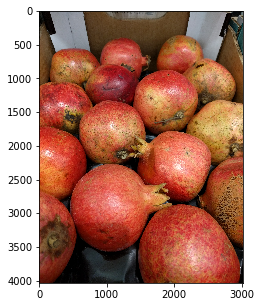

In [27]:
from PIL import Image

file_name = "pomegranate.jpg" 
img = Image.open("./fruits-360/test-multiple_fruits/"+ file_name)
original_img = np.array(img, dtype=np.uint8)
plt.imshow(original_img)

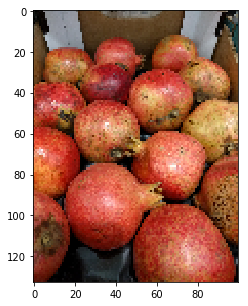

In [28]:
# scale down to some acceptable size 
# then crop 100x100 patch from that image

if img.size[0] > img.size[1]:
    scale = 100 / img.size[1]
    new_h = int(img.size[1]*scale)
    new_w = int(img.size[0]*scale)
    new_size = (new_w, new_h)
else:
    scale = 100 / img.size[0]
    new_h = int(img.size[1]*scale)
    new_w = int(img.size[0]*scale)
    new_size = (new_w, new_h)
    
resized = img.resize(new_size)
resized_img = np.array(resized, dtype=np.uint8)
plt.imshow(resized_img)

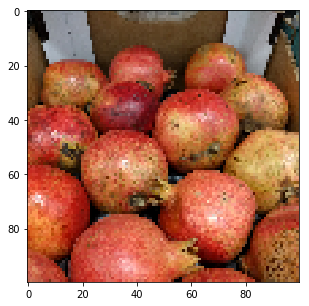

In [29]:
left = 0
right = left + 100
up = 0
down = up + 100

cropped = resized.crop((left, up, right, down))
cropped_img = np.array(cropped, dtype=np.uint8)
plt.imshow(cropped_img)

cropped_img = cropped_img / 255

In [30]:
X = np.reshape(cropped_img, newshape=(1, cropped_img.shape[0], cropped_img.shape[1], cropped_img.shape[2]))

prediction_multi = model.predict(x=X)

print("Main prediction : ",train_categories[np.argmax(prediction_multi)])
acc_sort_index = np.argsort(prediction_multi)

top_pred = acc_sort_index[:, -6:]

print("1st Prediction: ", train_categories[top_pred[0][-1]])
print("2nd Prediction: ", train_categories[top_pred[0][-2]])
print("3rd Prediction: ", train_categories[top_pred[0][-3]])
print("4th Prediction: ", train_categories[top_pred[0][-4]])
print("5th Prediction: ", train_categories[top_pred[0][-5]])
print("6th Prediction: ", train_categories[top_pred[0][-6]])

Main prediction :  Pineapple Mini
1st Prediction:  Pineapple Mini
2nd Prediction:  Pitahaya Red
3rd Prediction:  Kaki
4th Prediction:  Cactus fruit
5th Prediction:  Tangelo
6th Prediction:  Strawberry


## Because we have been provided with some real world test data, we have used the same to see the performance of our Model. As you can see the performance of the model is really poor due to following facts.

1. The network has been trained on the images having clear background (white clear background). In real world, the objects to be identified doesn't have the clear background.
2. Also, there are times when there will be multiple fruits in a single image and that happen in real world often. But the network has been trained to identify the 100x100x3 image as a single fruit. When we scale down the real world image to 100x100x3 dims then the shape and size of fruits in the image changes and that leads to our point no. 3. 
3. Moreover, there will be change in shape and size of the Fruit depend upon the camera angle while capturing image in real world instead of fixed sized images provided from the training set.


**So, as you can see these are some serious challenges people in the domain of computer vision face. But these can be resolved by training the network with more real world dataset rather than synthetic dataset. Because the Neural Networks learns what you feed them. If you feed them some synthetic data then they will definately outperform in the synthetic data but will fail miserably in real world data.**